# **K Means Clustering on Human Activity Recognition Dataset**

**Importing necessary libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

**Loading the dataset**

In [46]:
path = "UCI HAR Dataset/train/X_train.txt"  # Full path to the file
X_train = pd.read_csv(path, sep="\s+", header=None)

print(X_train.shape)
print(X_train.head())

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18951/757617065.py:2: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv(path, sep="\s+", header=None)


(7352, 561)
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559     

In [47]:
path = "UCI HAR Dataset/test/X_test.txt"
X_test = pd.read_csv(path, sep="\s+", header=None)

print(X_test.shape)
print(X_test.head())

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18951/4279886887.py:2: SyntaxWarning: invalid escape sequence '\s'
  X_test = pd.read_csv(path, sep="\s+", header=None)


(2947, 561)
        0         1         2         3         4         5         6    \
0  0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1  0.286027 -0.013163 -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2  0.275485 -0.026050 -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3  0.270298 -0.032614 -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4  0.274833 -0.027848 -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   

        7         8         9    ...       551       552       553       554  \
0 -0.925249 -0.674302 -0.894088  ...  0.071645 -0.330370 -0.705974  0.006462   
1 -0.968401 -0.945823 -0.894088  ... -0.401189 -0.121845 -0.594944 -0.083495   
2 -0.970735 -0.963483 -0.939260  ...  0.062891 -0.190422 -0.640736 -0.034956   
3 -0.974471 -0.968897 -0.938610  ...  0.116695 -0.344418 -0.736124 -0.017067   
4 -0.965953 -0.977346 -0.938610  ... -0.121711 -0.534685 -0.846595 -0.002223   

        555       556       557       558       559     

**Handling Missing Values**

In [48]:
for col in X_train.columns:
    if X_train[col].isna().any():
        print(f"Column {col} has null values")

for col in X_test.columns:
    if X_test[col].isna().any():
        print(f"Column {col} has null values")

**Encoding categorical variables**

In [49]:
# Not Applicable as the dataset does not have categorical data

**Feature Scaling**

In [50]:
for col in X_train.columns:
    print(f"Column {col} - min: {X_train[col].min()}, max: {X_train[col].max()}")

# Not required as the features are roughly in the range -1 to +1

Column 0 - min: -1.0, max: 1.0
Column 1 - min: -1.0, max: 1.0
Column 2 - min: -1.0, max: 1.0
Column 3 - min: -1.0, max: 1.0
Column 4 - min: -0.99987292, max: 0.91623796
Column 5 - min: -1.0, max: 1.0
Column 6 - min: -1.0, max: 1.0
Column 7 - min: -1.0, max: 0.96766404
Column 8 - min: -1.0, max: 1.0
Column 9 - min: -1.0, max: 1.0
Column 10 - min: -1.0, max: 1.0
Column 11 - min: -1.0, max: 1.0
Column 12 - min: -1.0, max: 1.0
Column 13 - min: -1.0, max: 1.0
Column 14 - min: -1.0, max: 1.0
Column 15 - min: -1.0, max: 1.0
Column 16 - min: -1.0, max: 1.0
Column 17 - min: -0.9999986, max: 1.0
Column 18 - min: -1.0, max: 1.0
Column 19 - min: -1.0, max: 1.0
Column 20 - min: -1.0, max: 1.0
Column 21 - min: -1.0, max: 1.0
Column 22 - min: -1.0, max: 0.91966171
Column 23 - min: -1.0, max: 1.0
Column 24 - min: -1.0, max: 1.0
Column 25 - min: -0.92589735, max: 1.0
Column 26 - min: -0.9630993, max: 0.97844881
Column 27 - min: -1.0, max: 1.0
Column 28 - min: -0.82205333, max: 1.0
Column 29 - min: -1.0

**Exploratory Data Analysis**

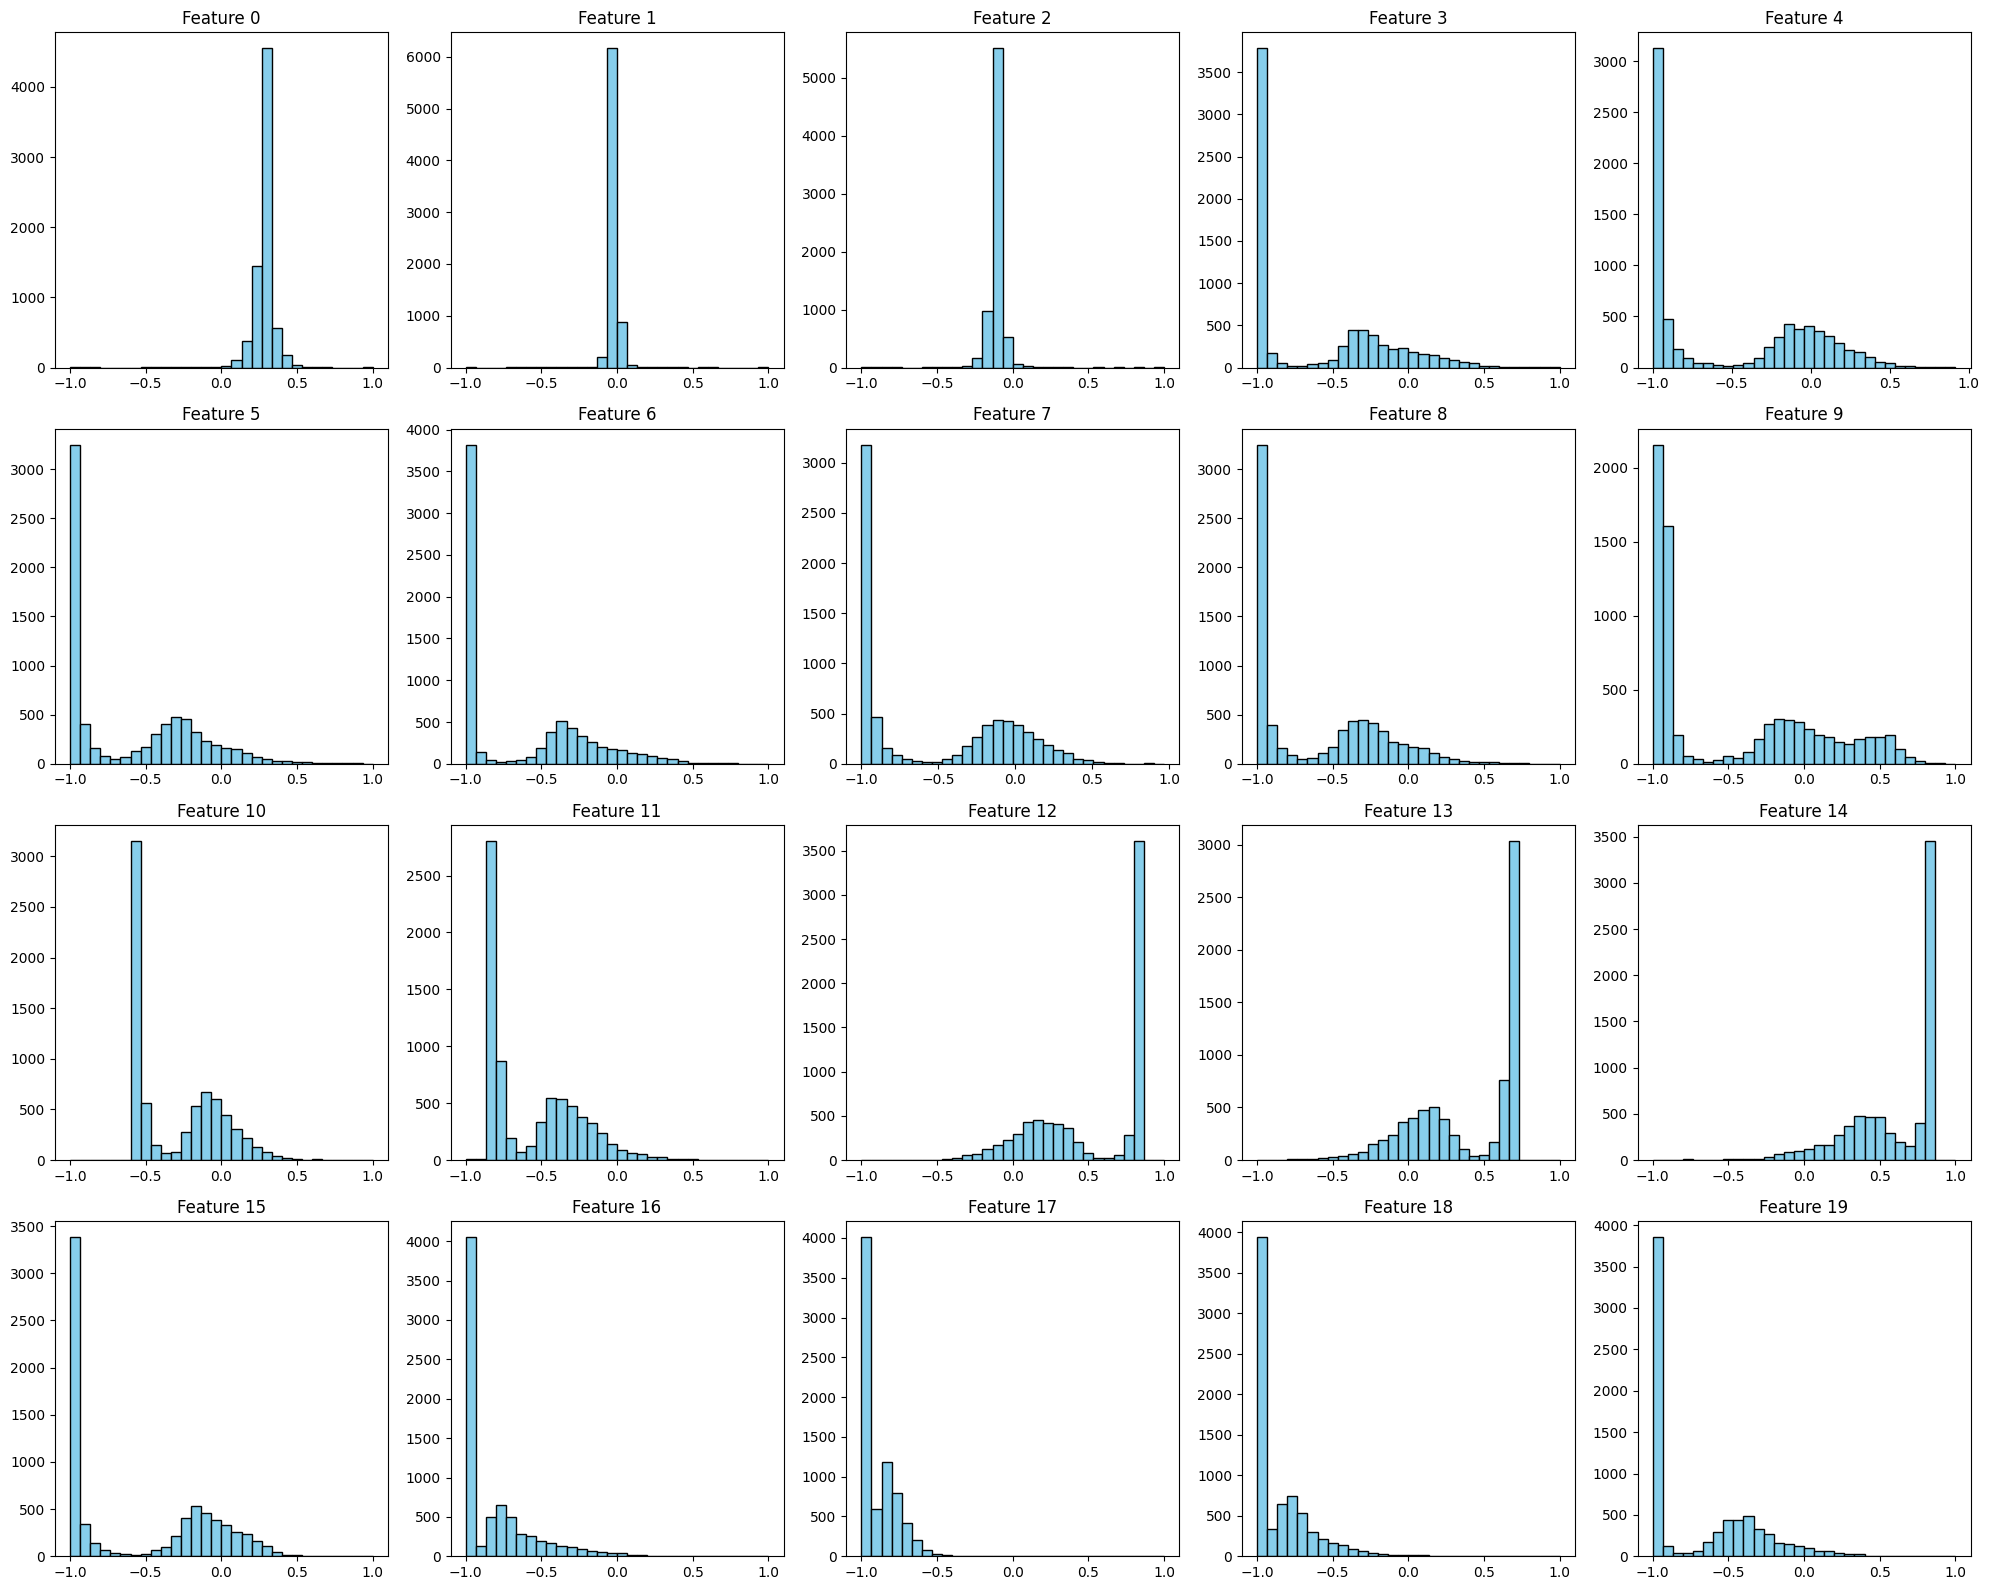

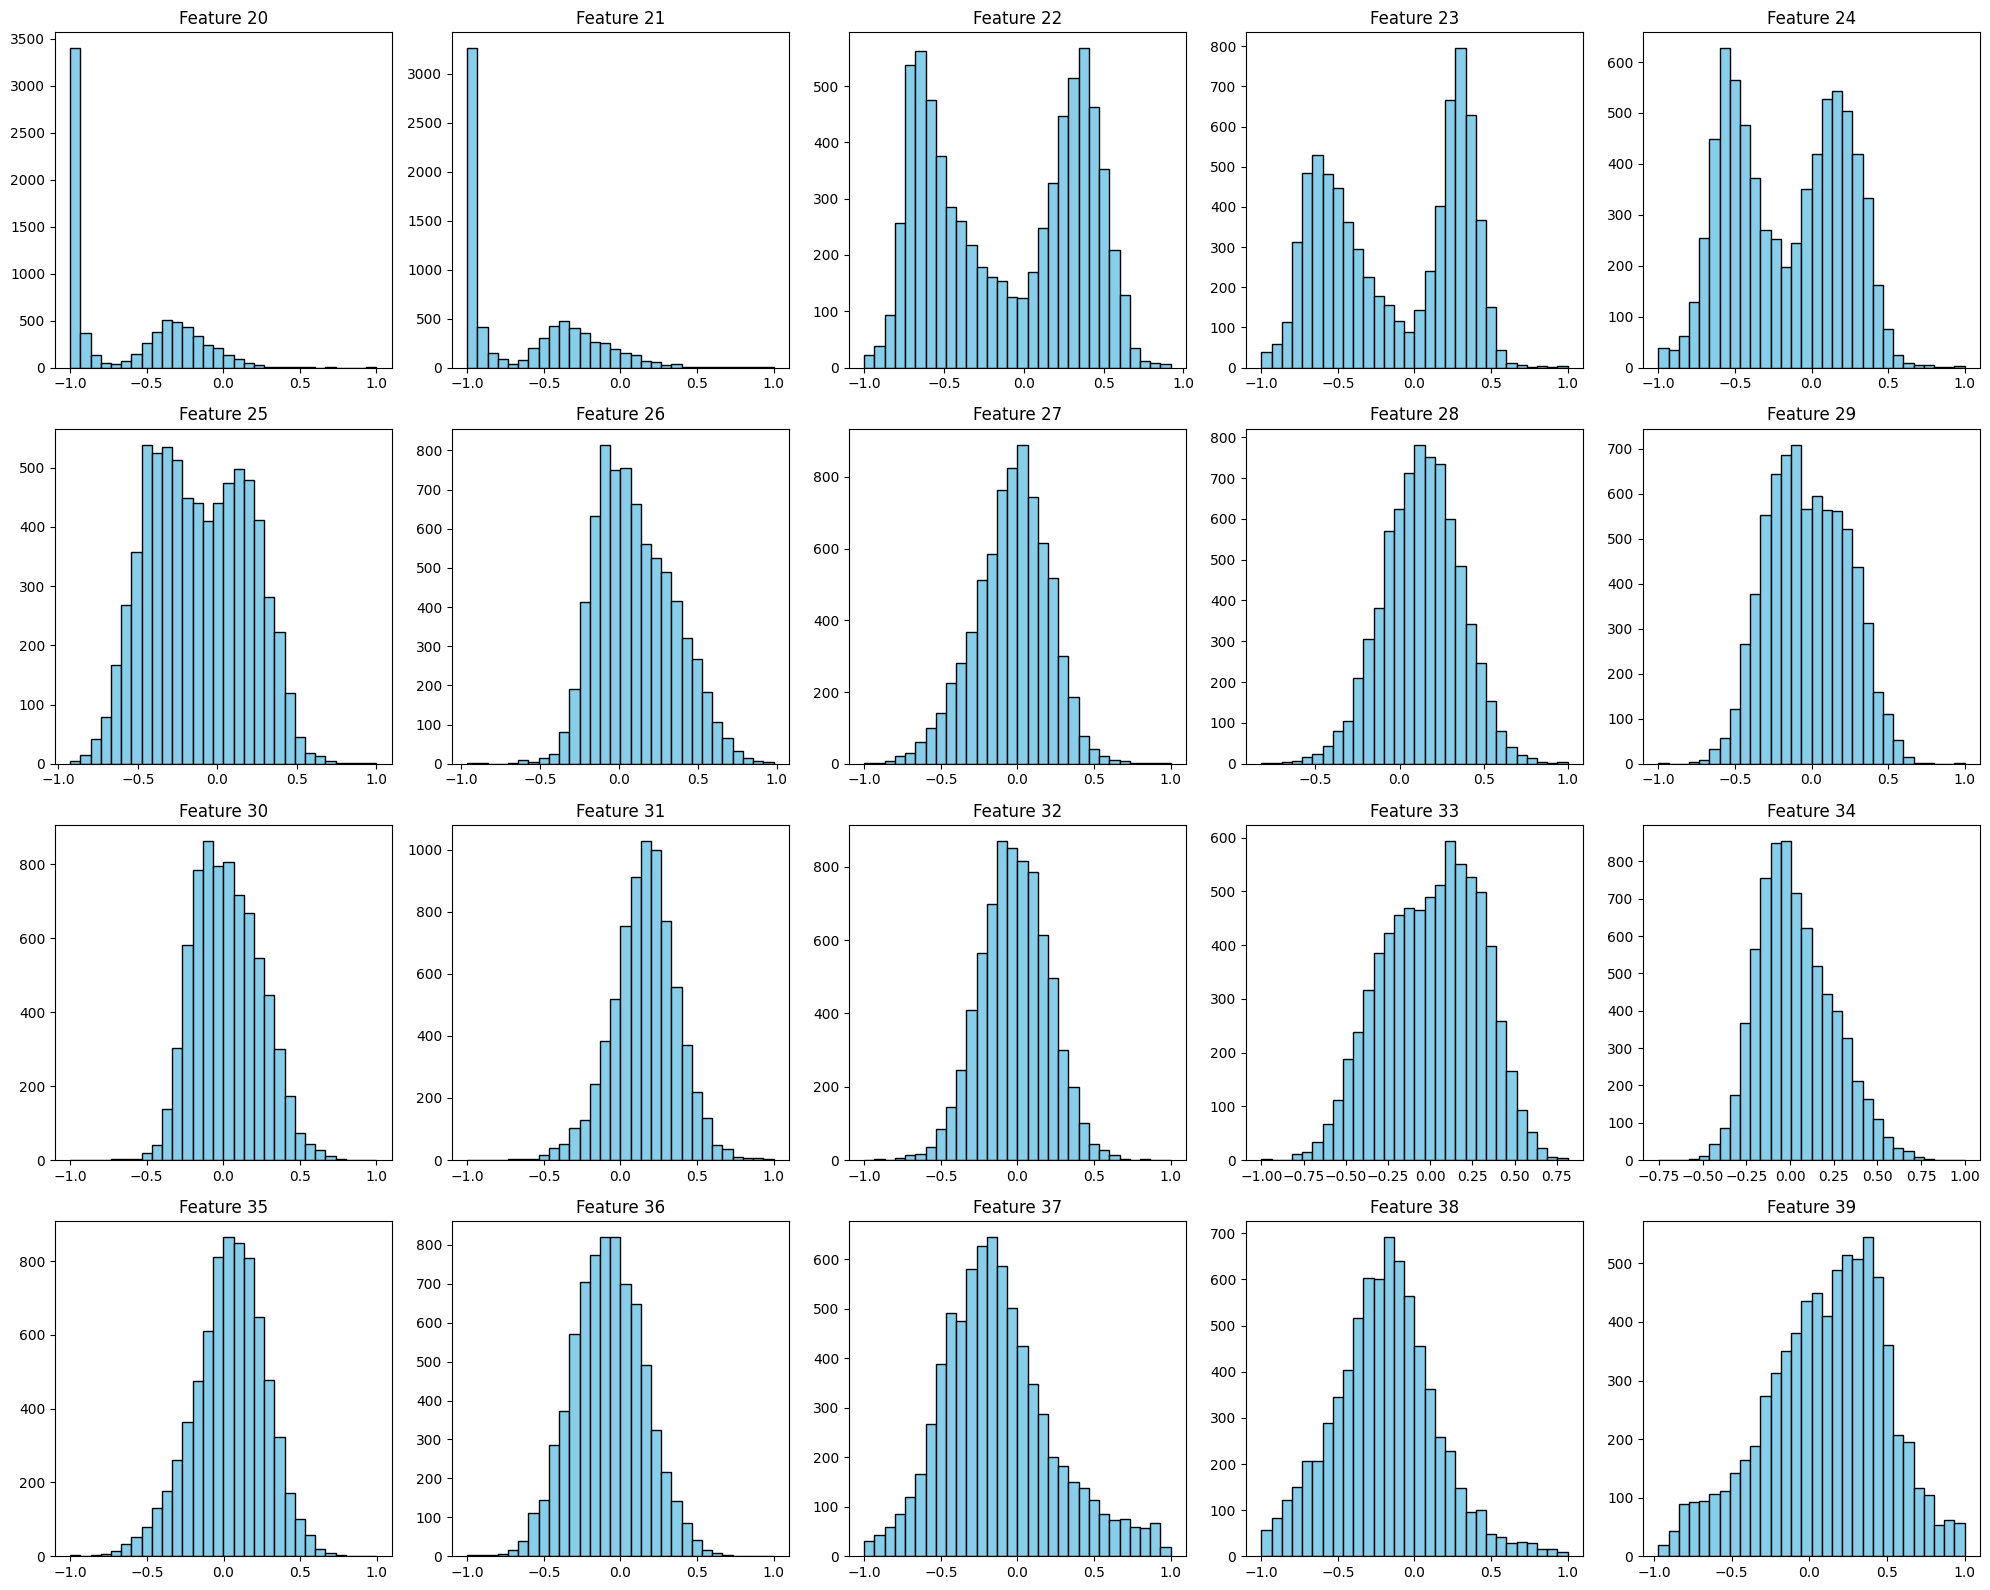

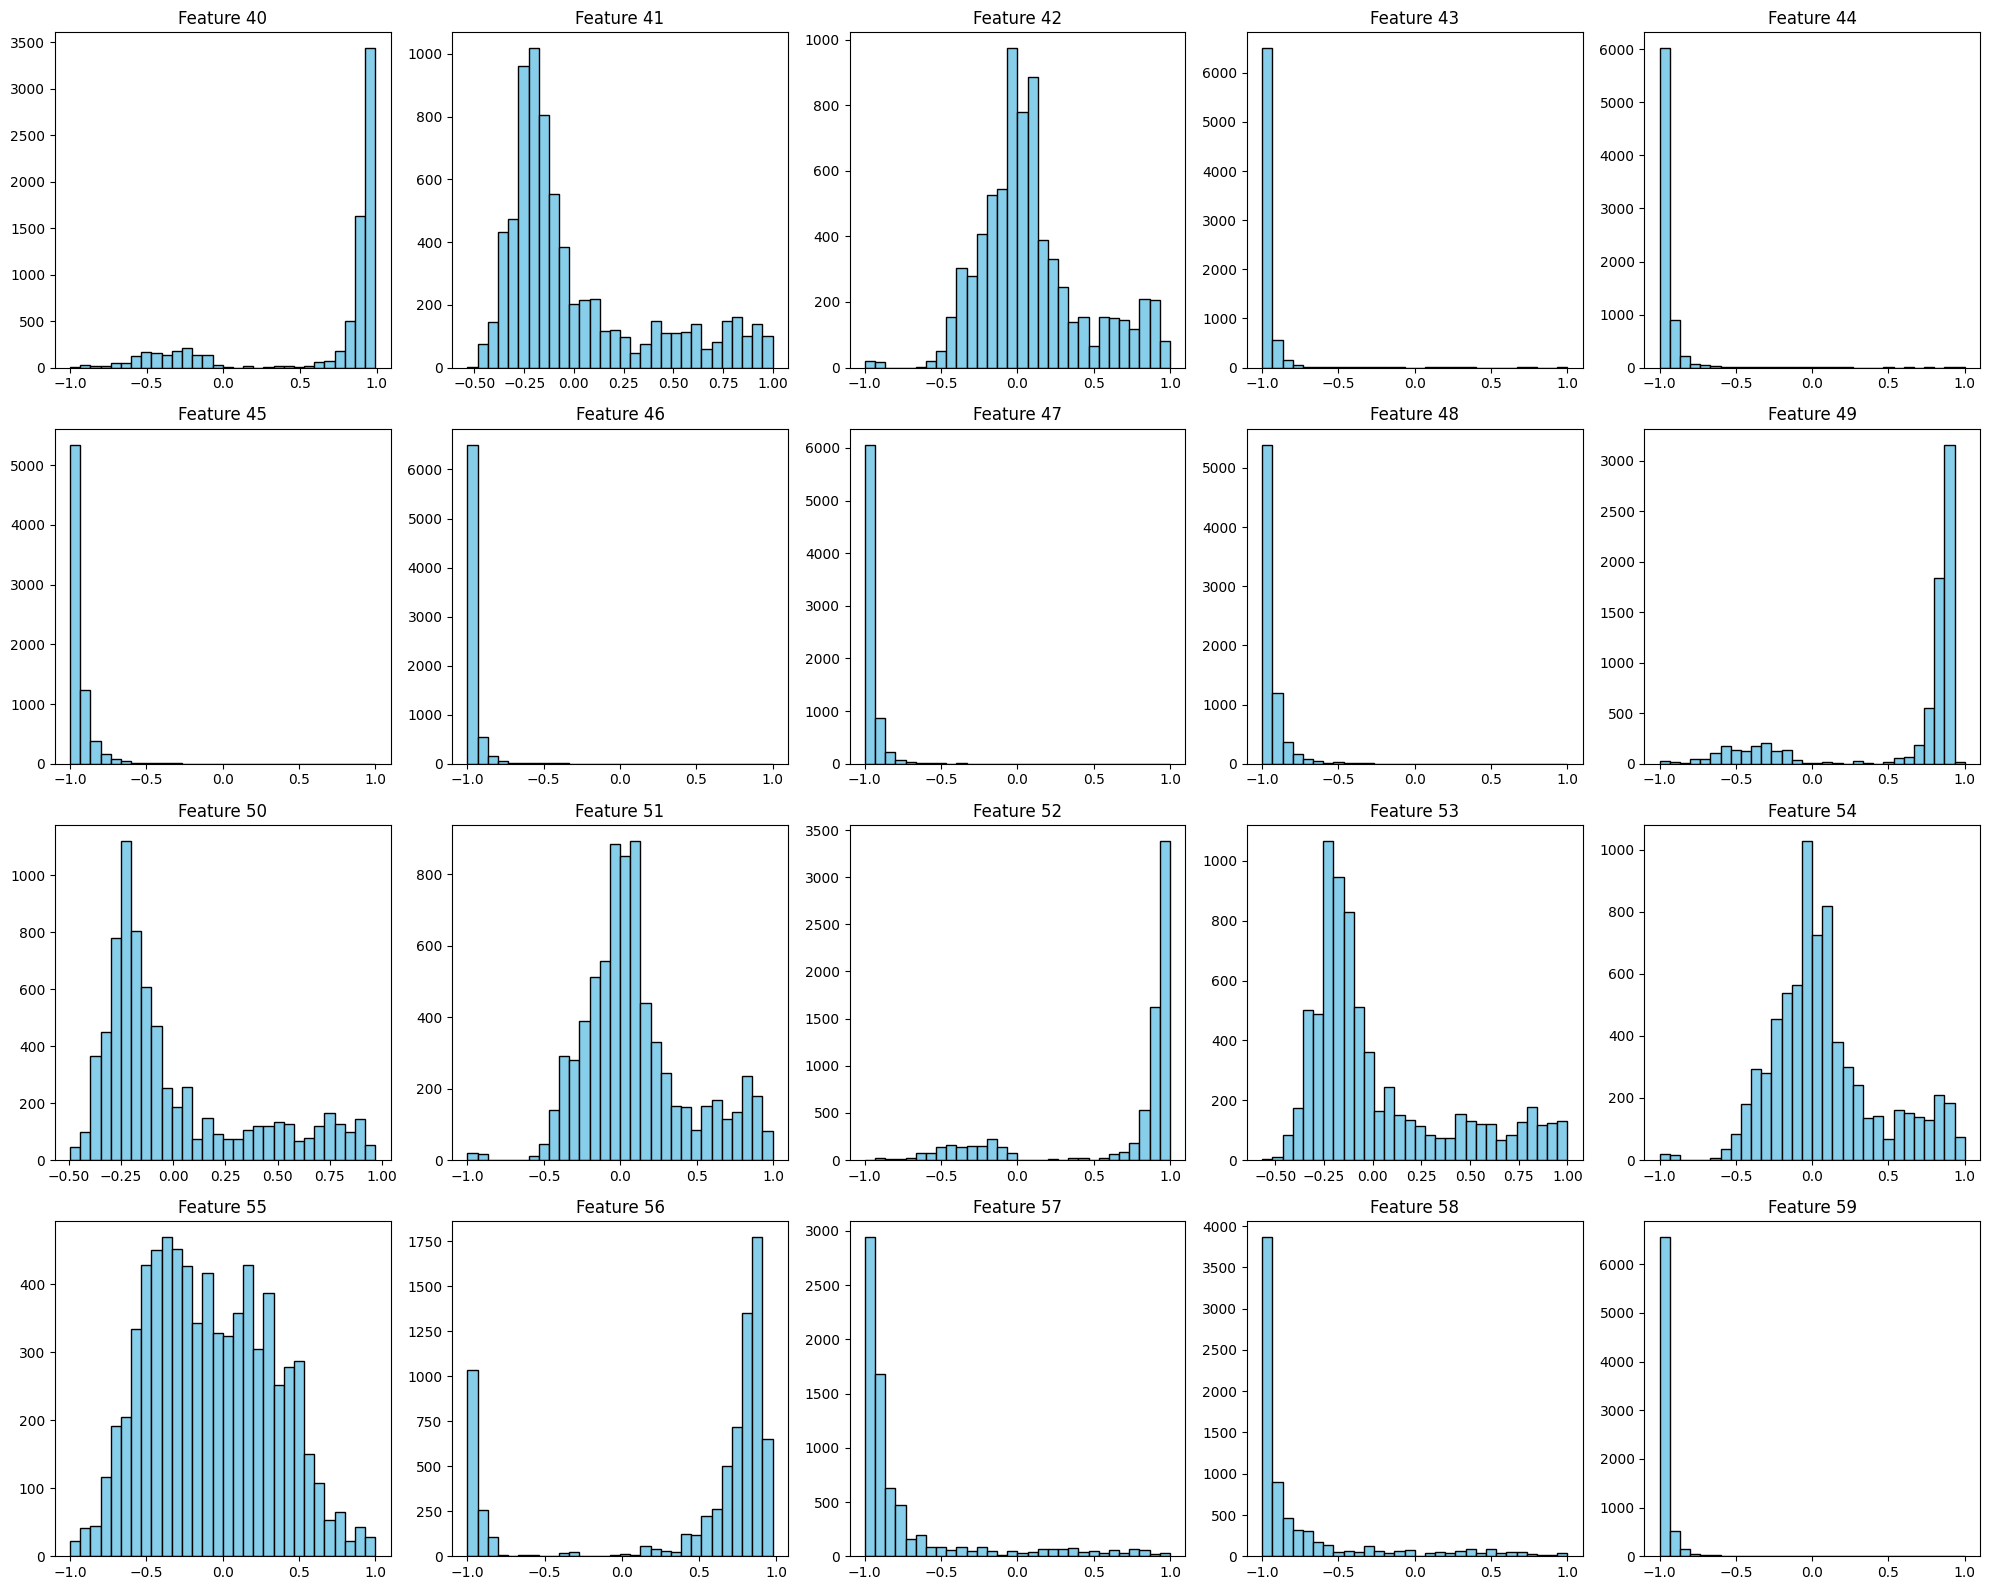

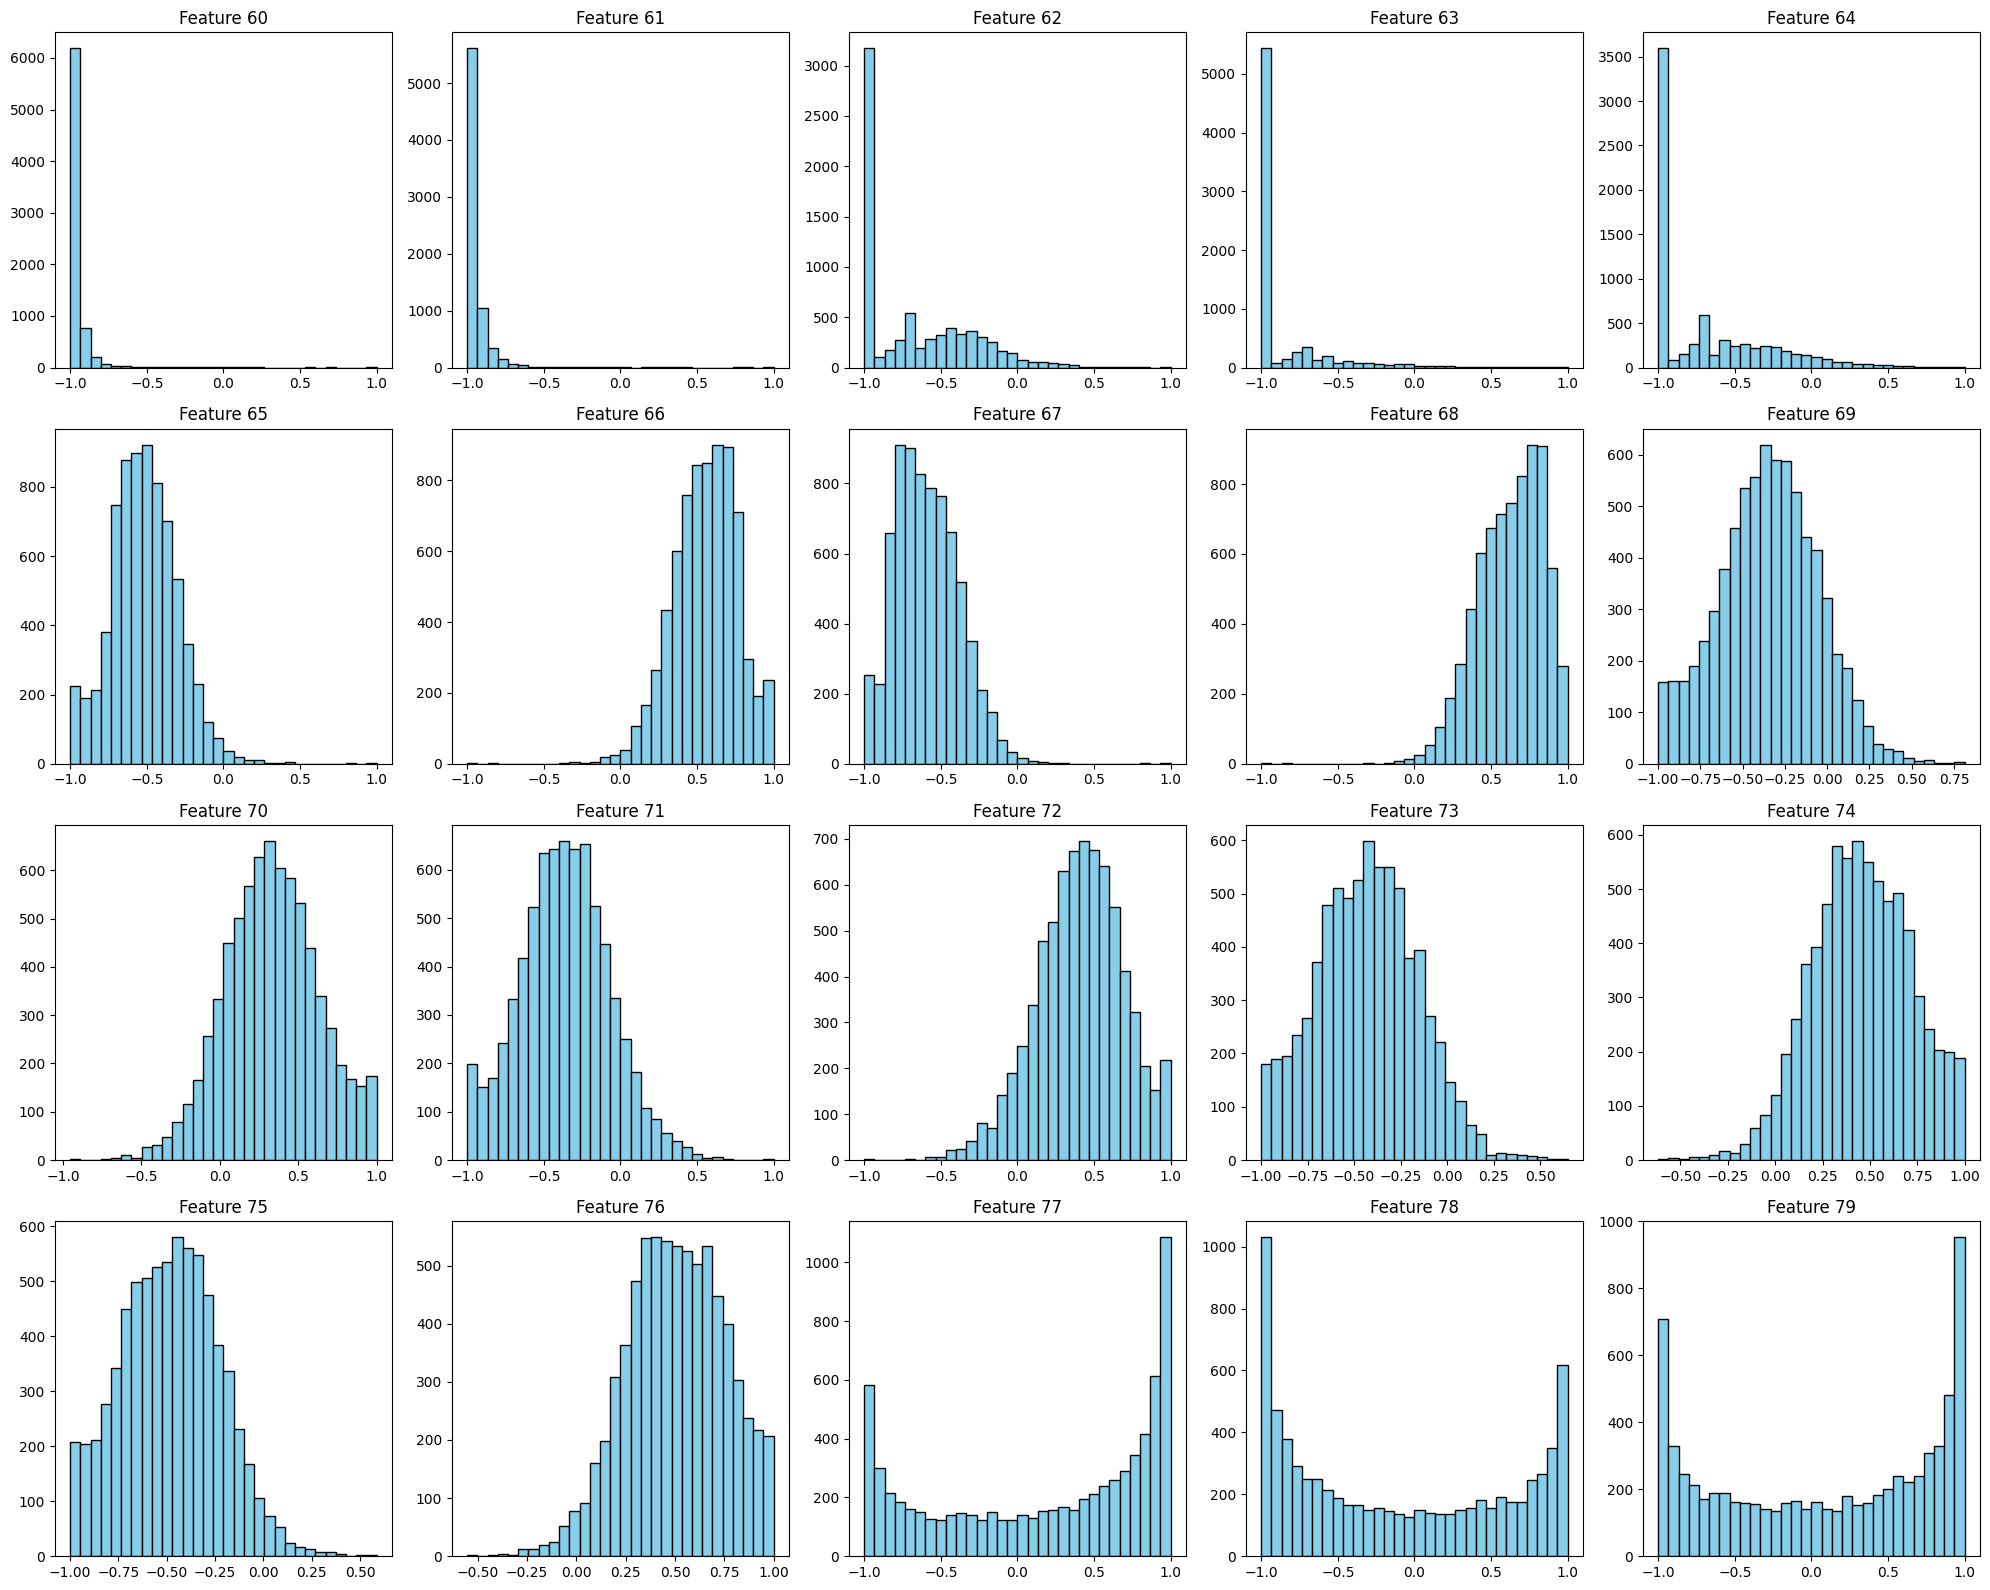

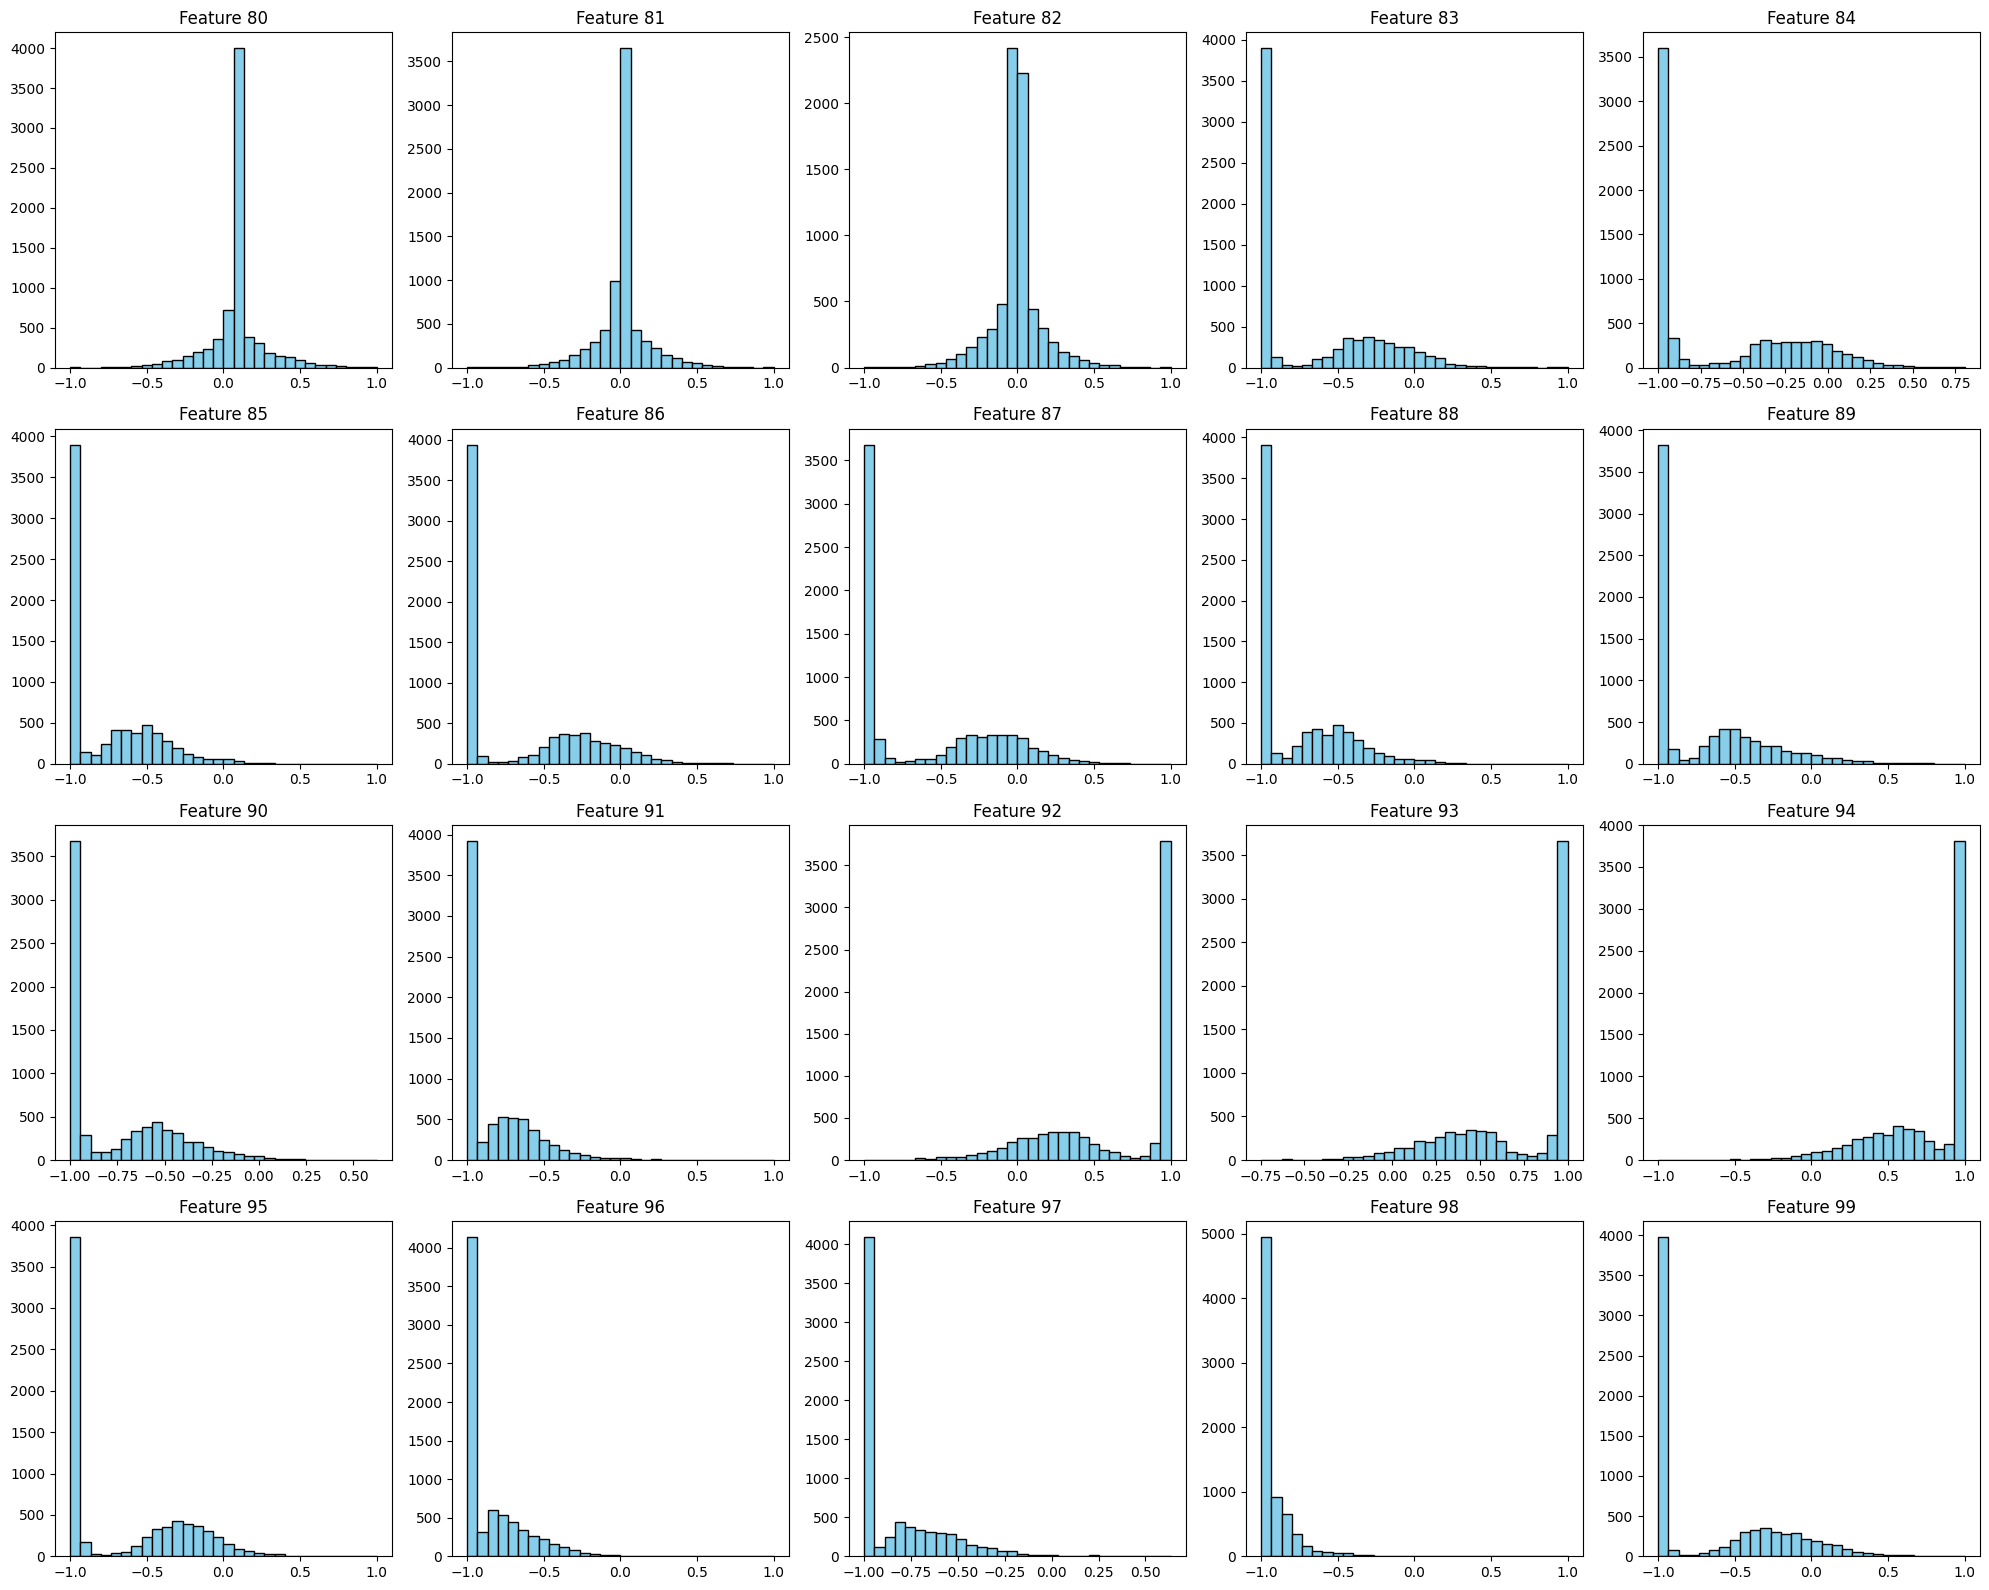

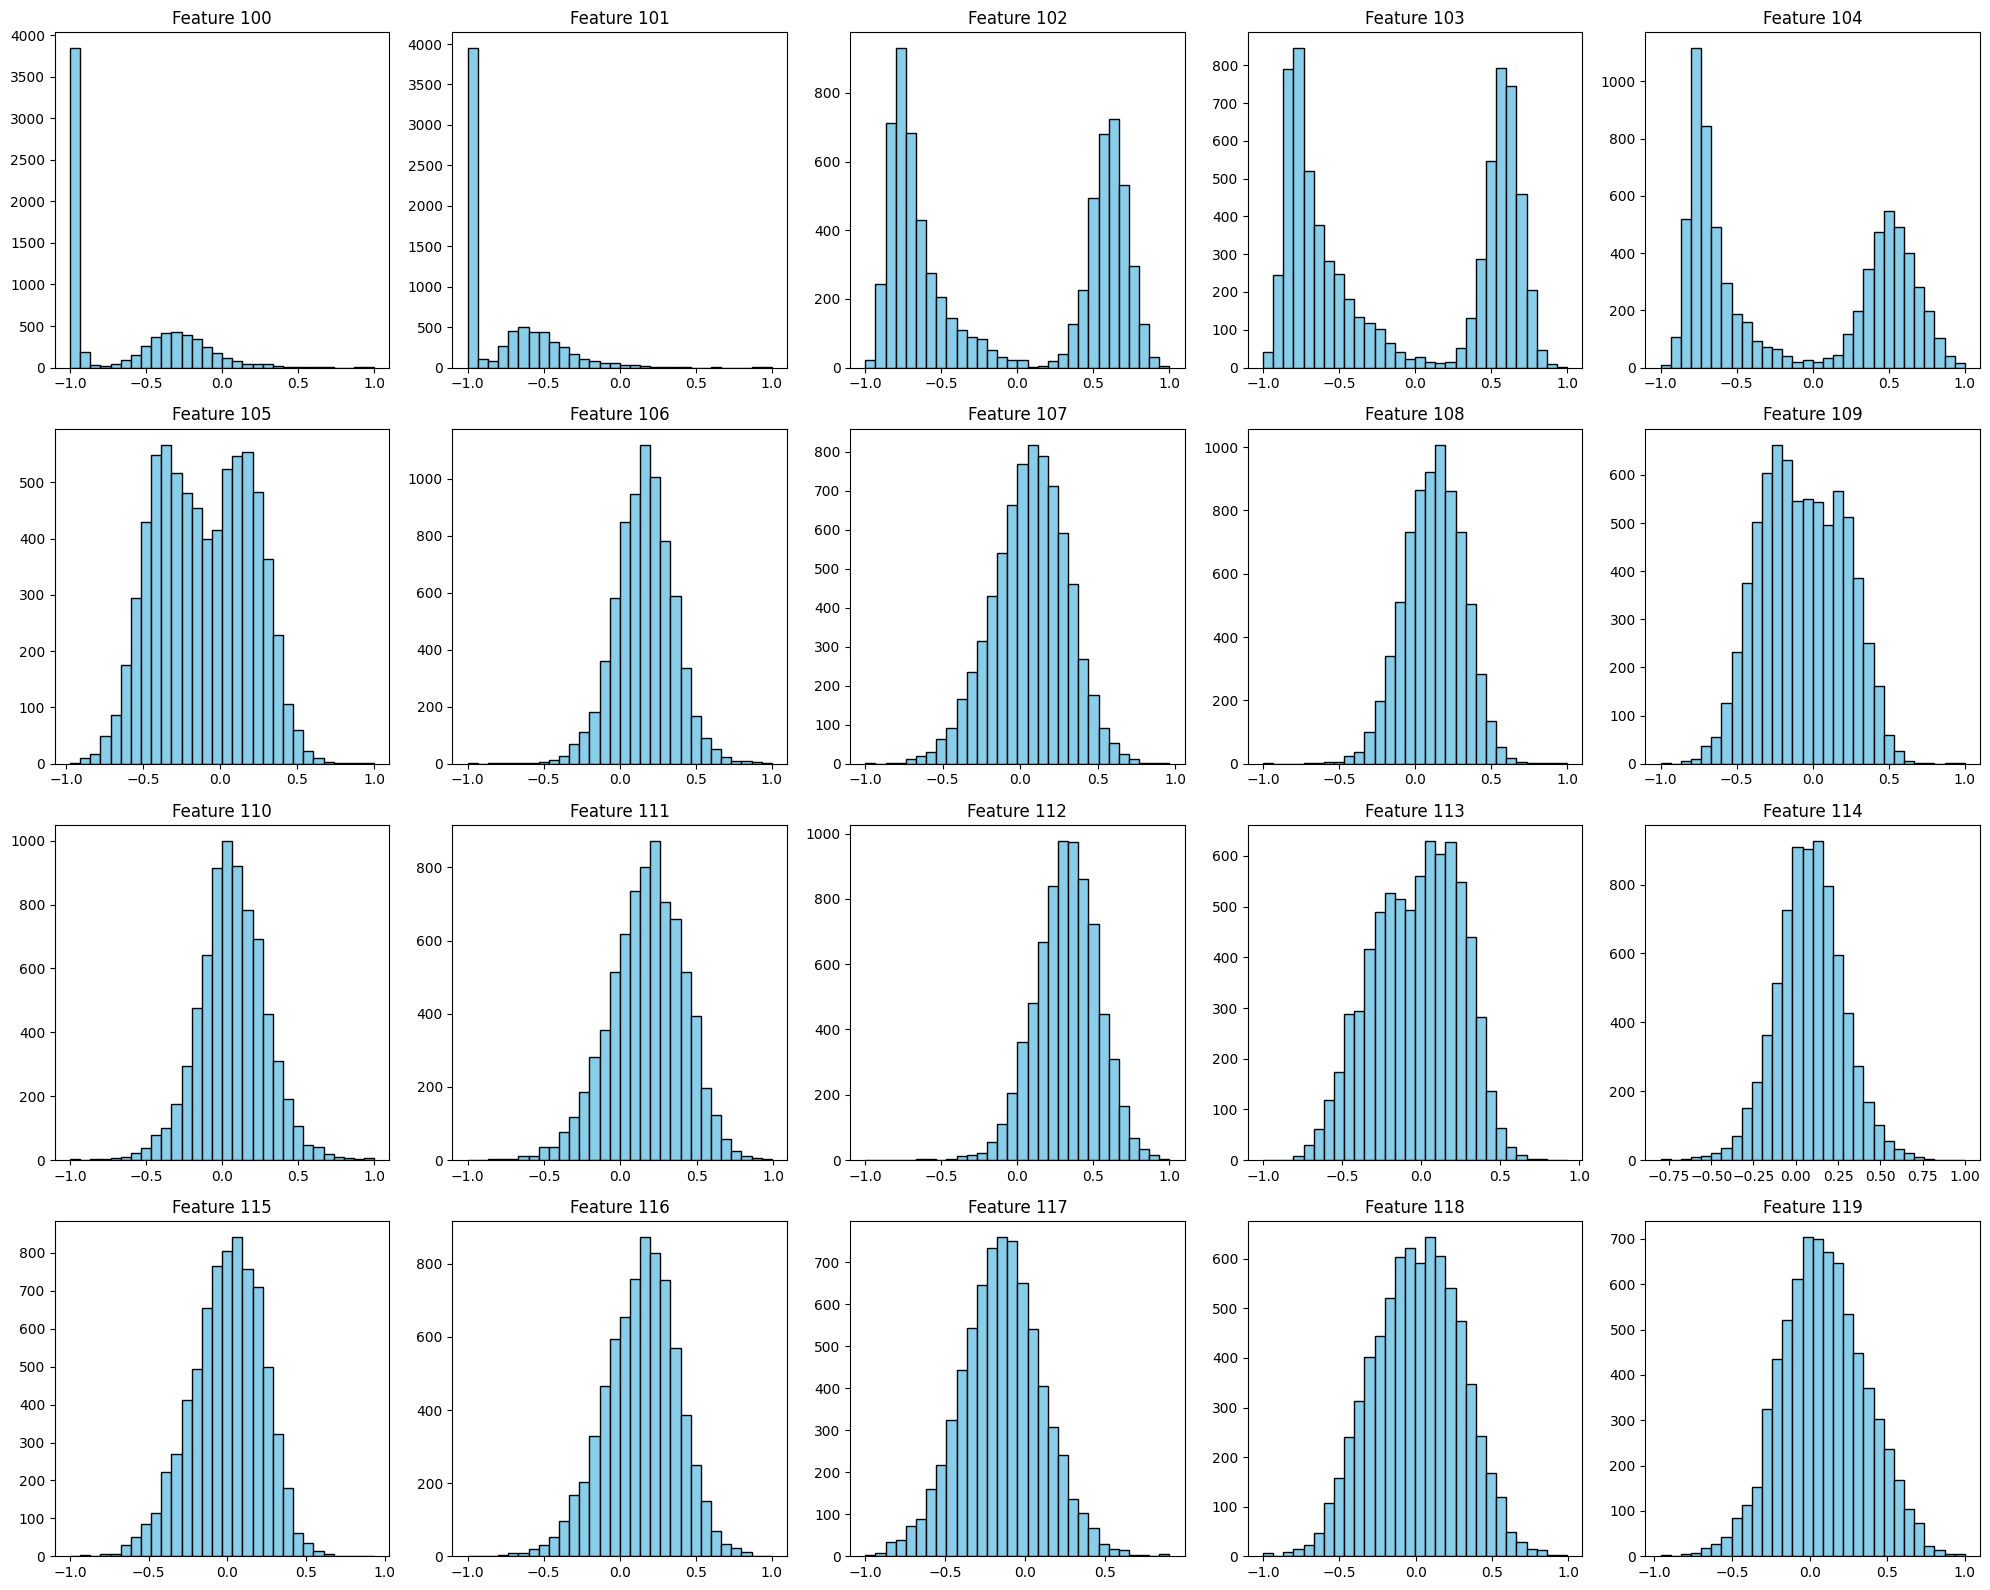

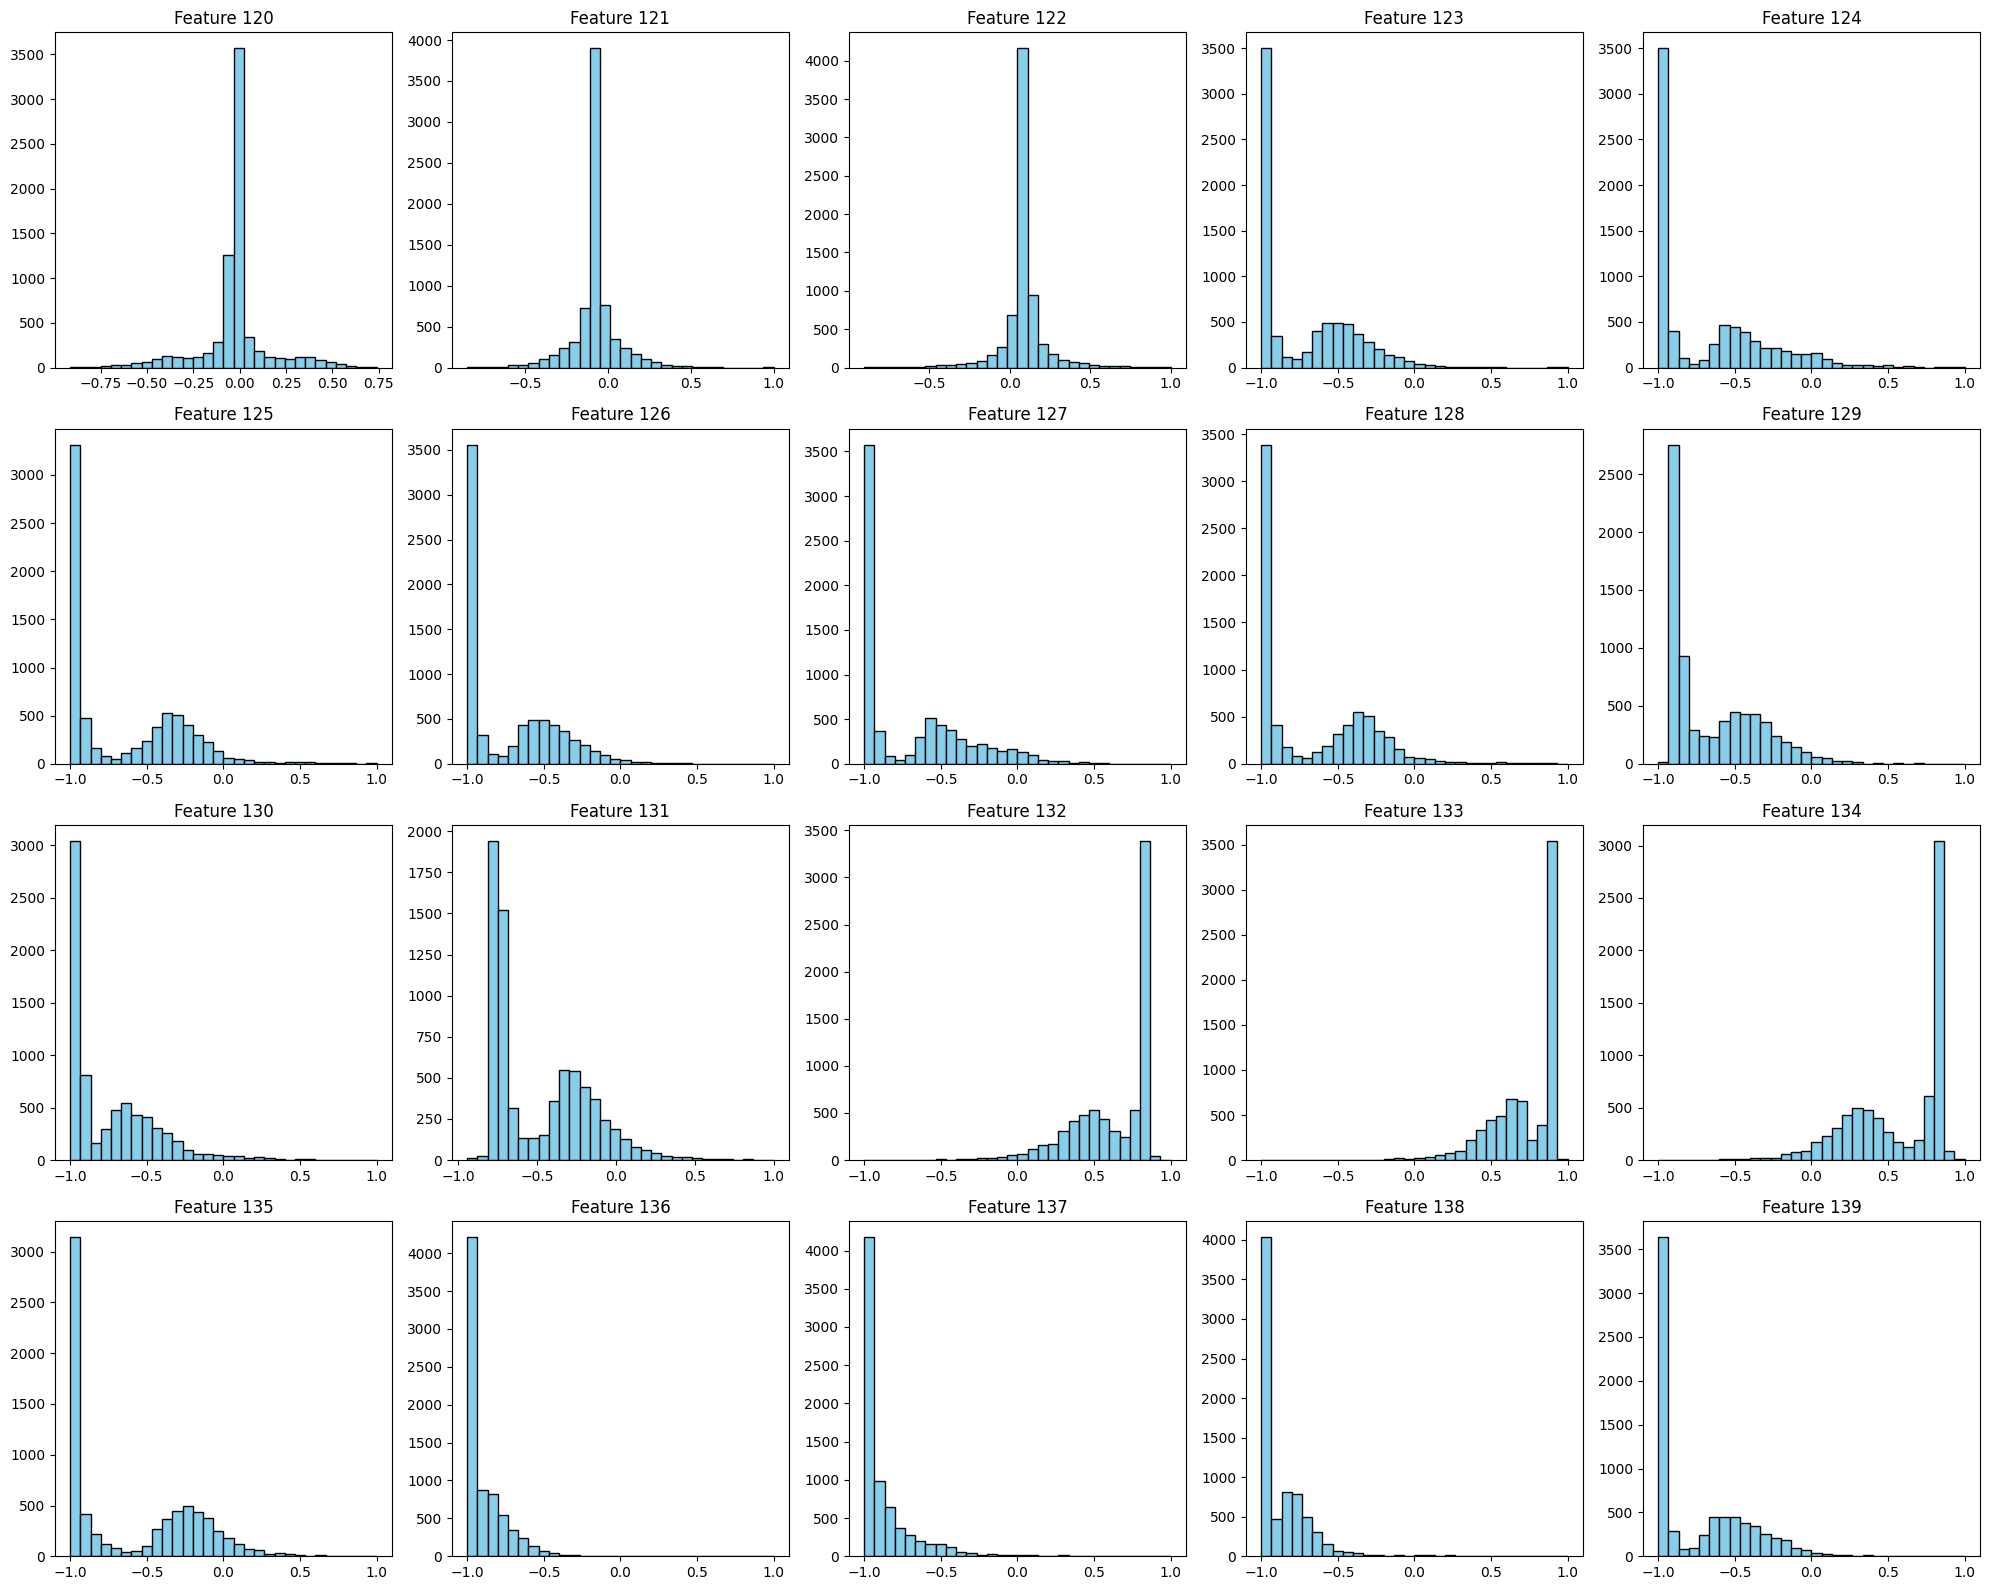

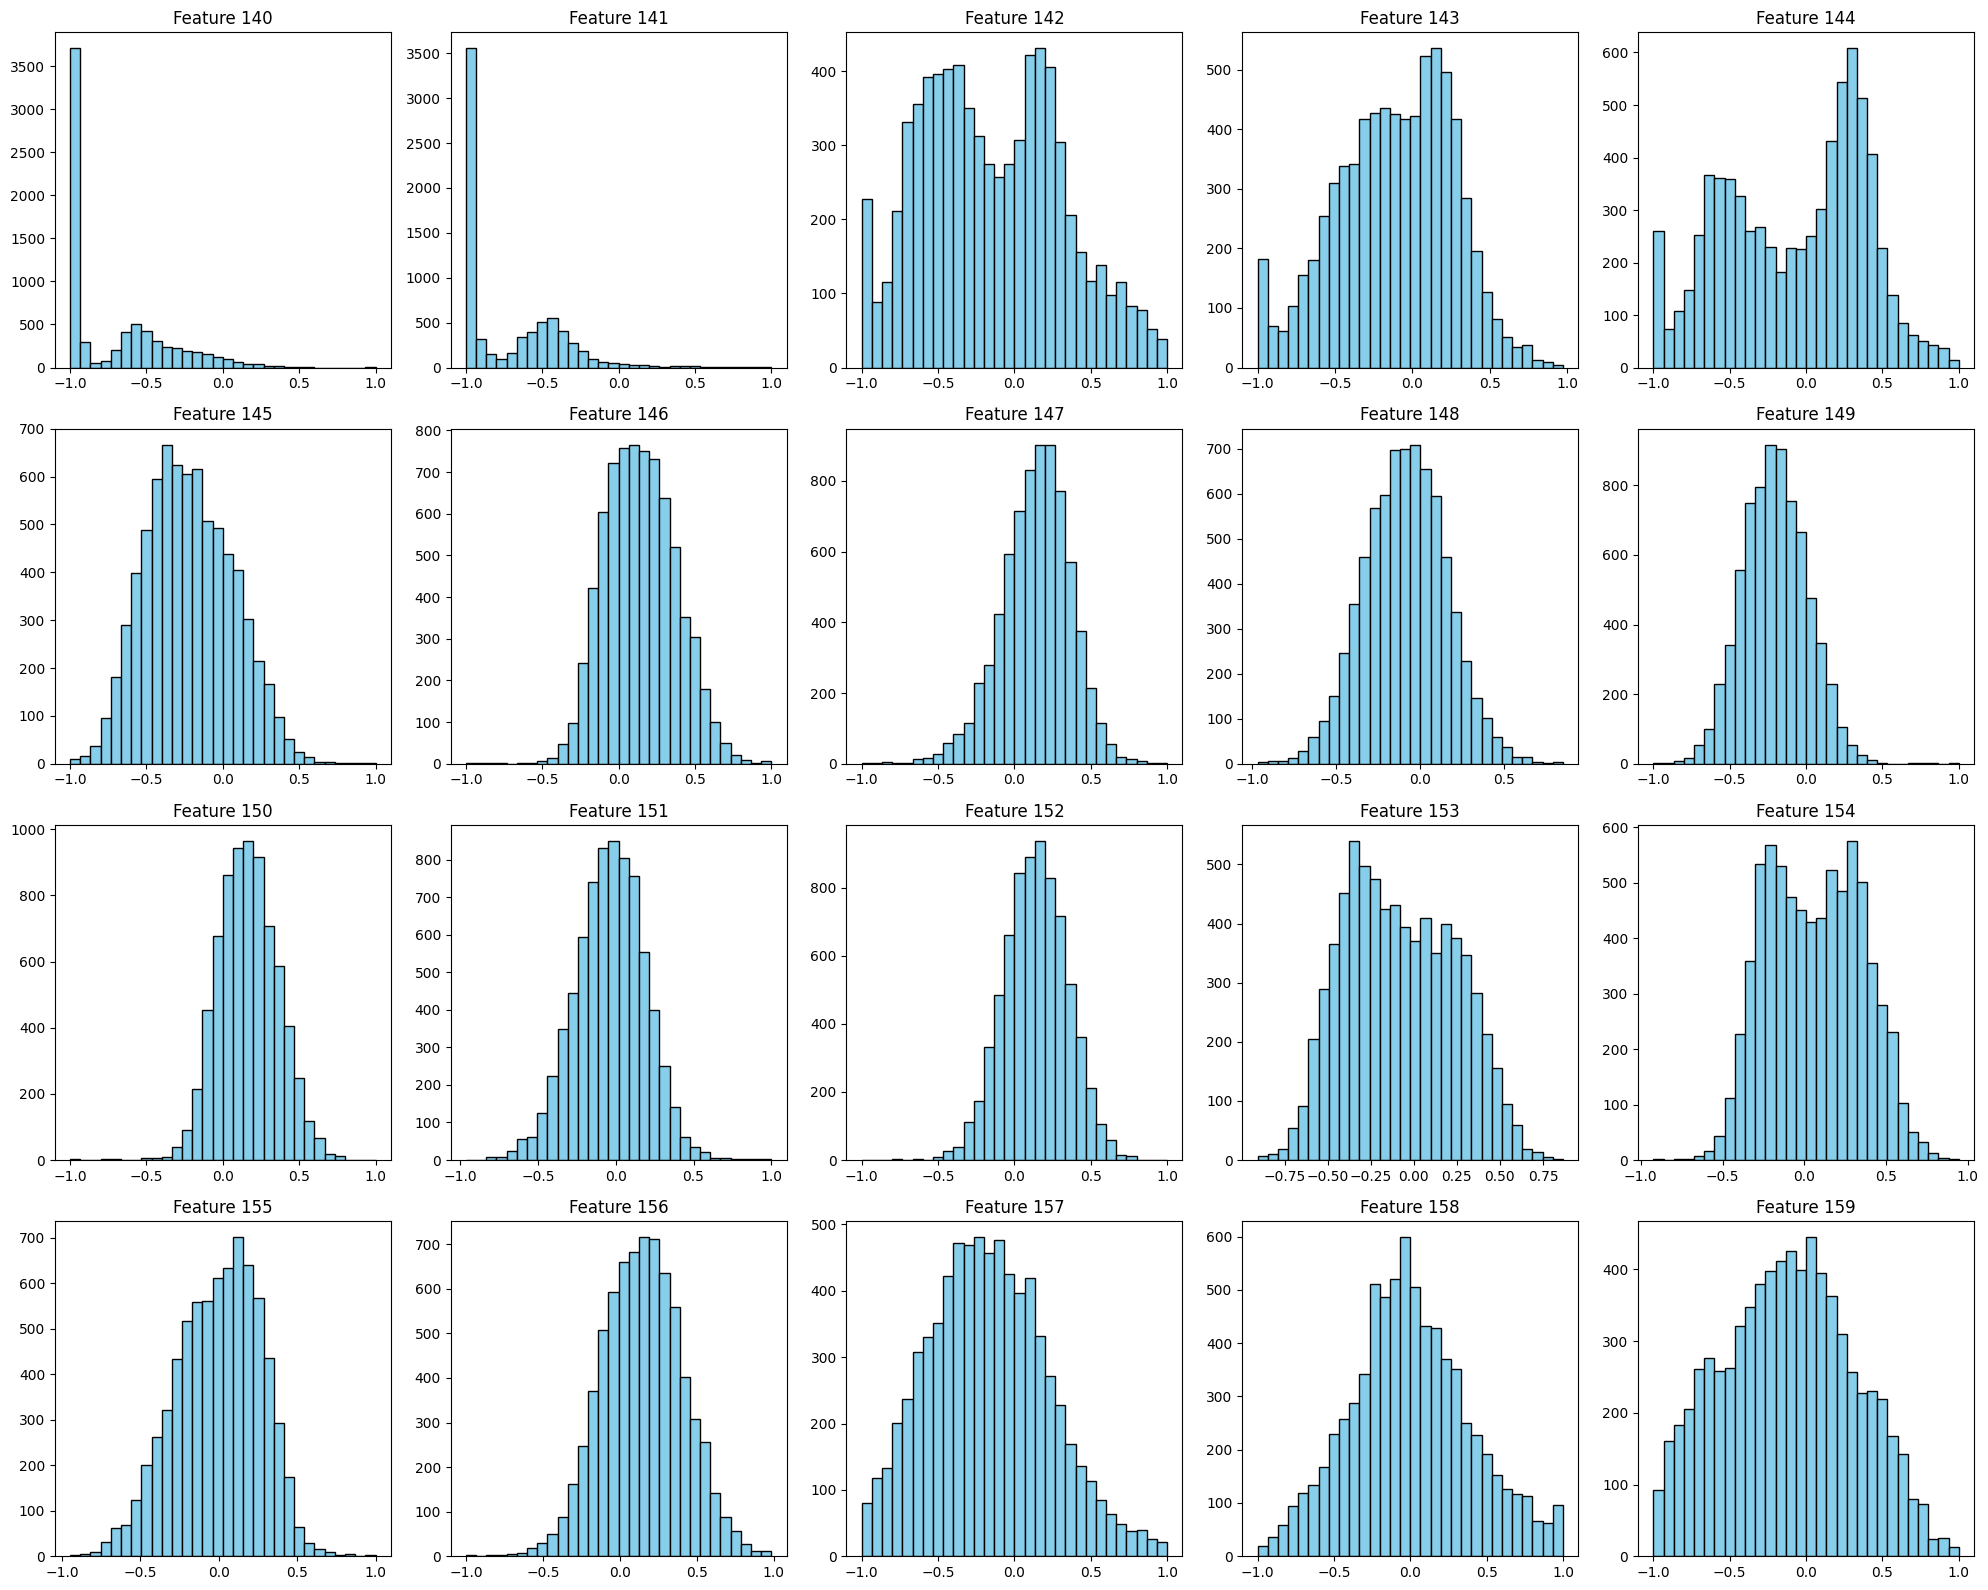

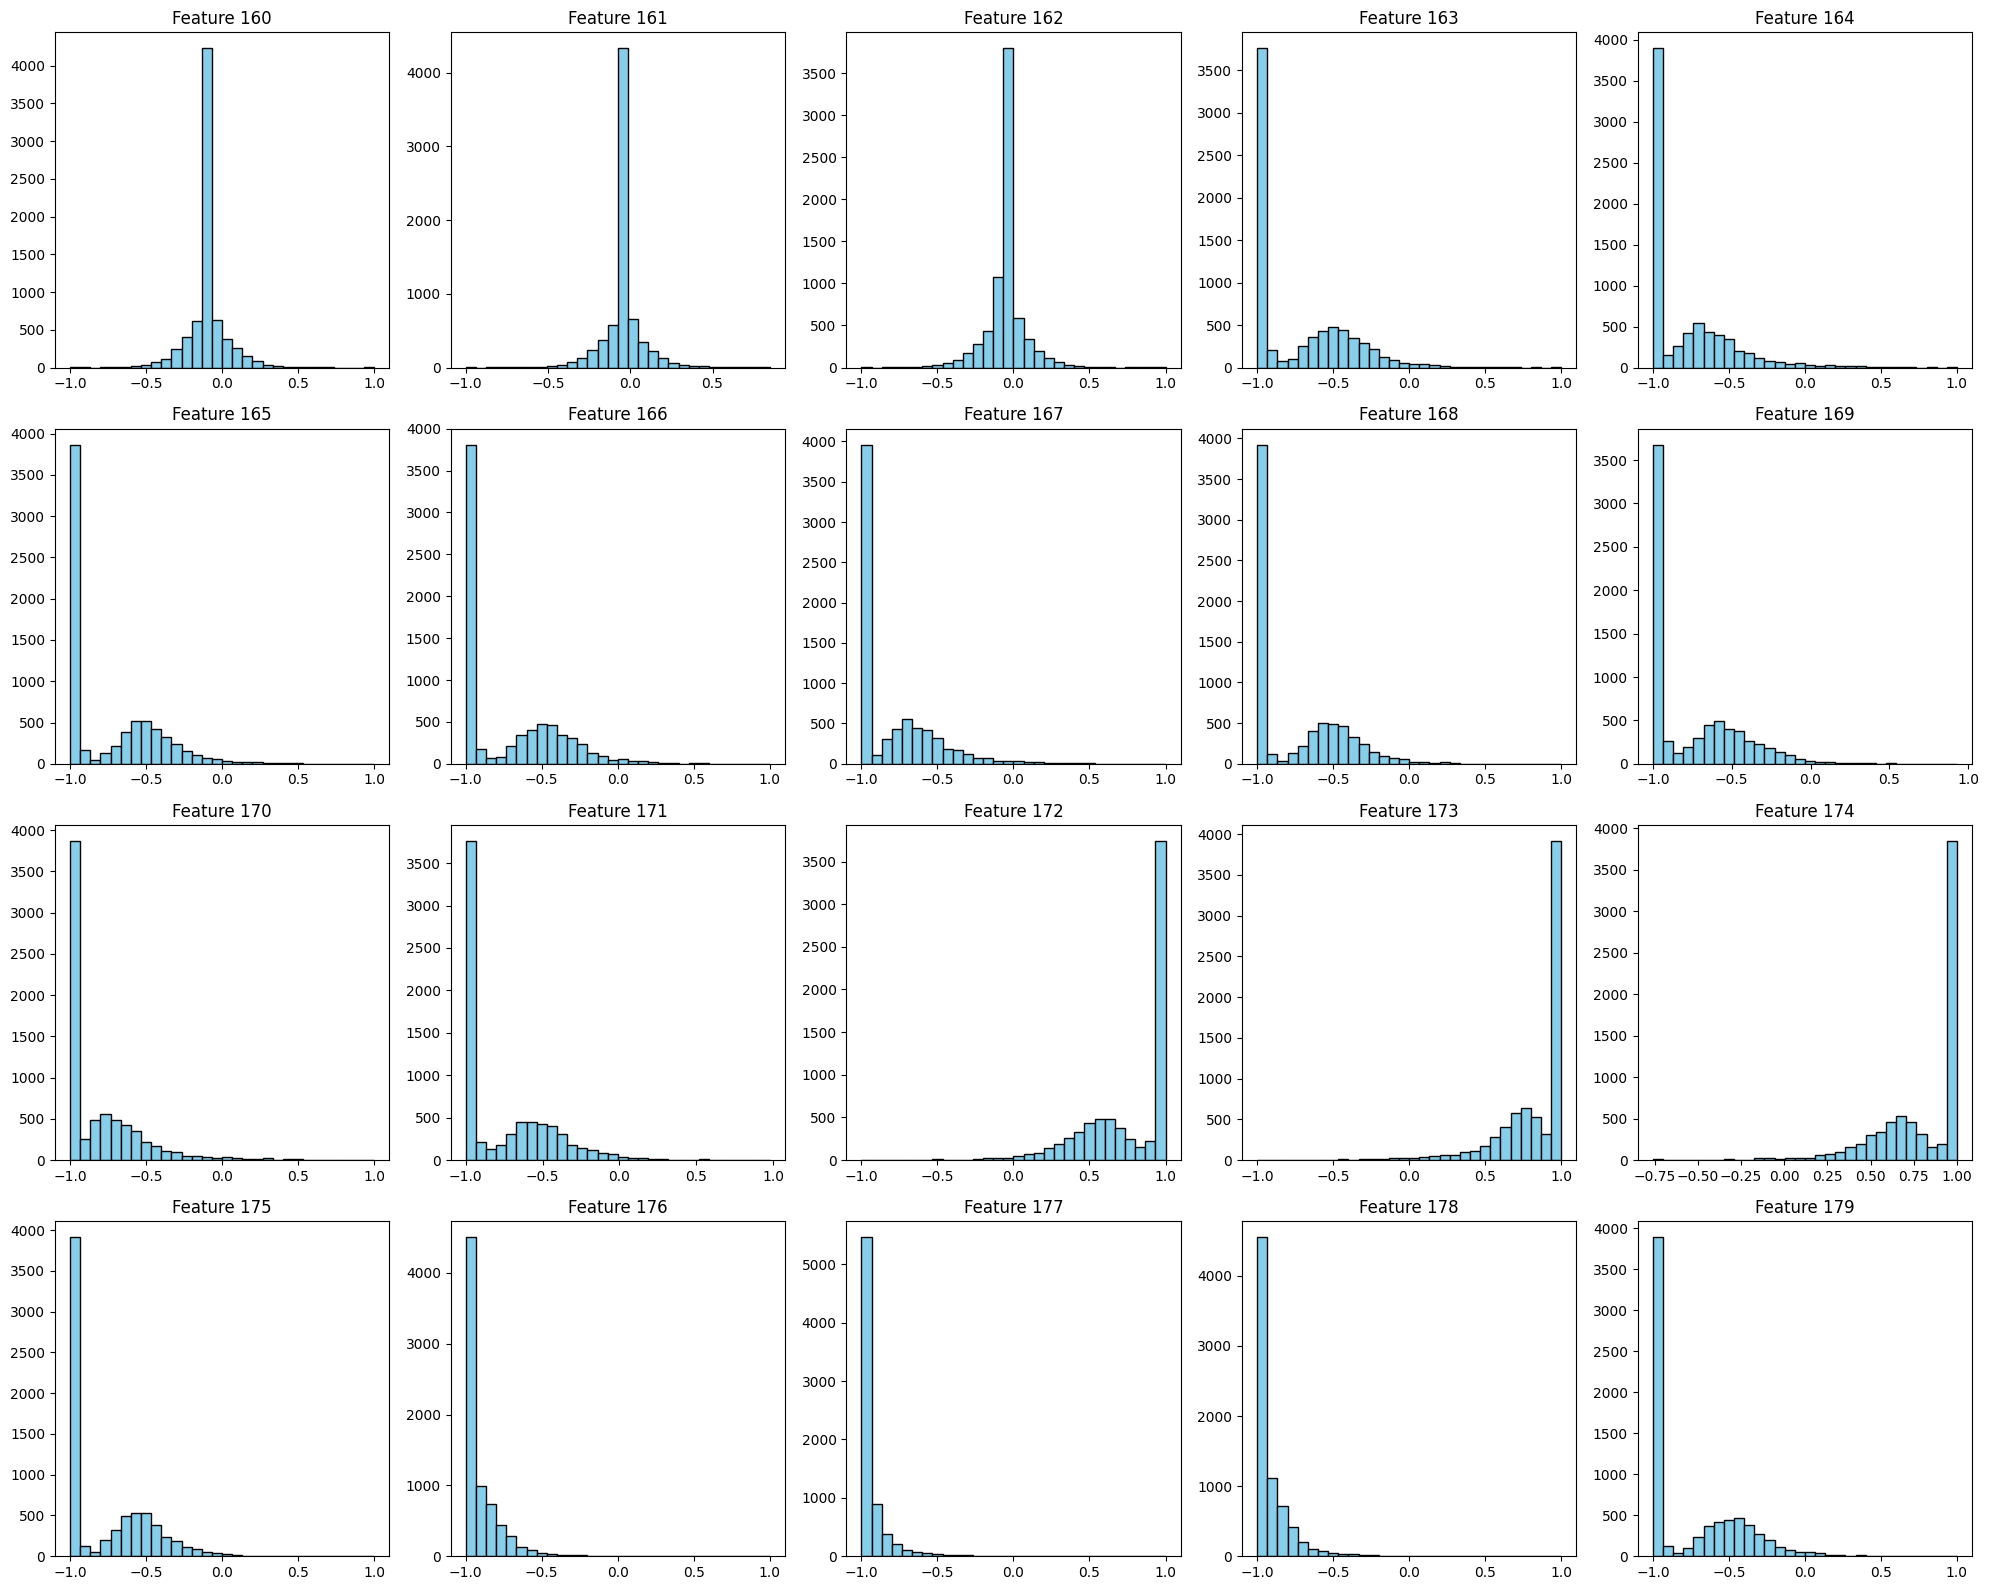

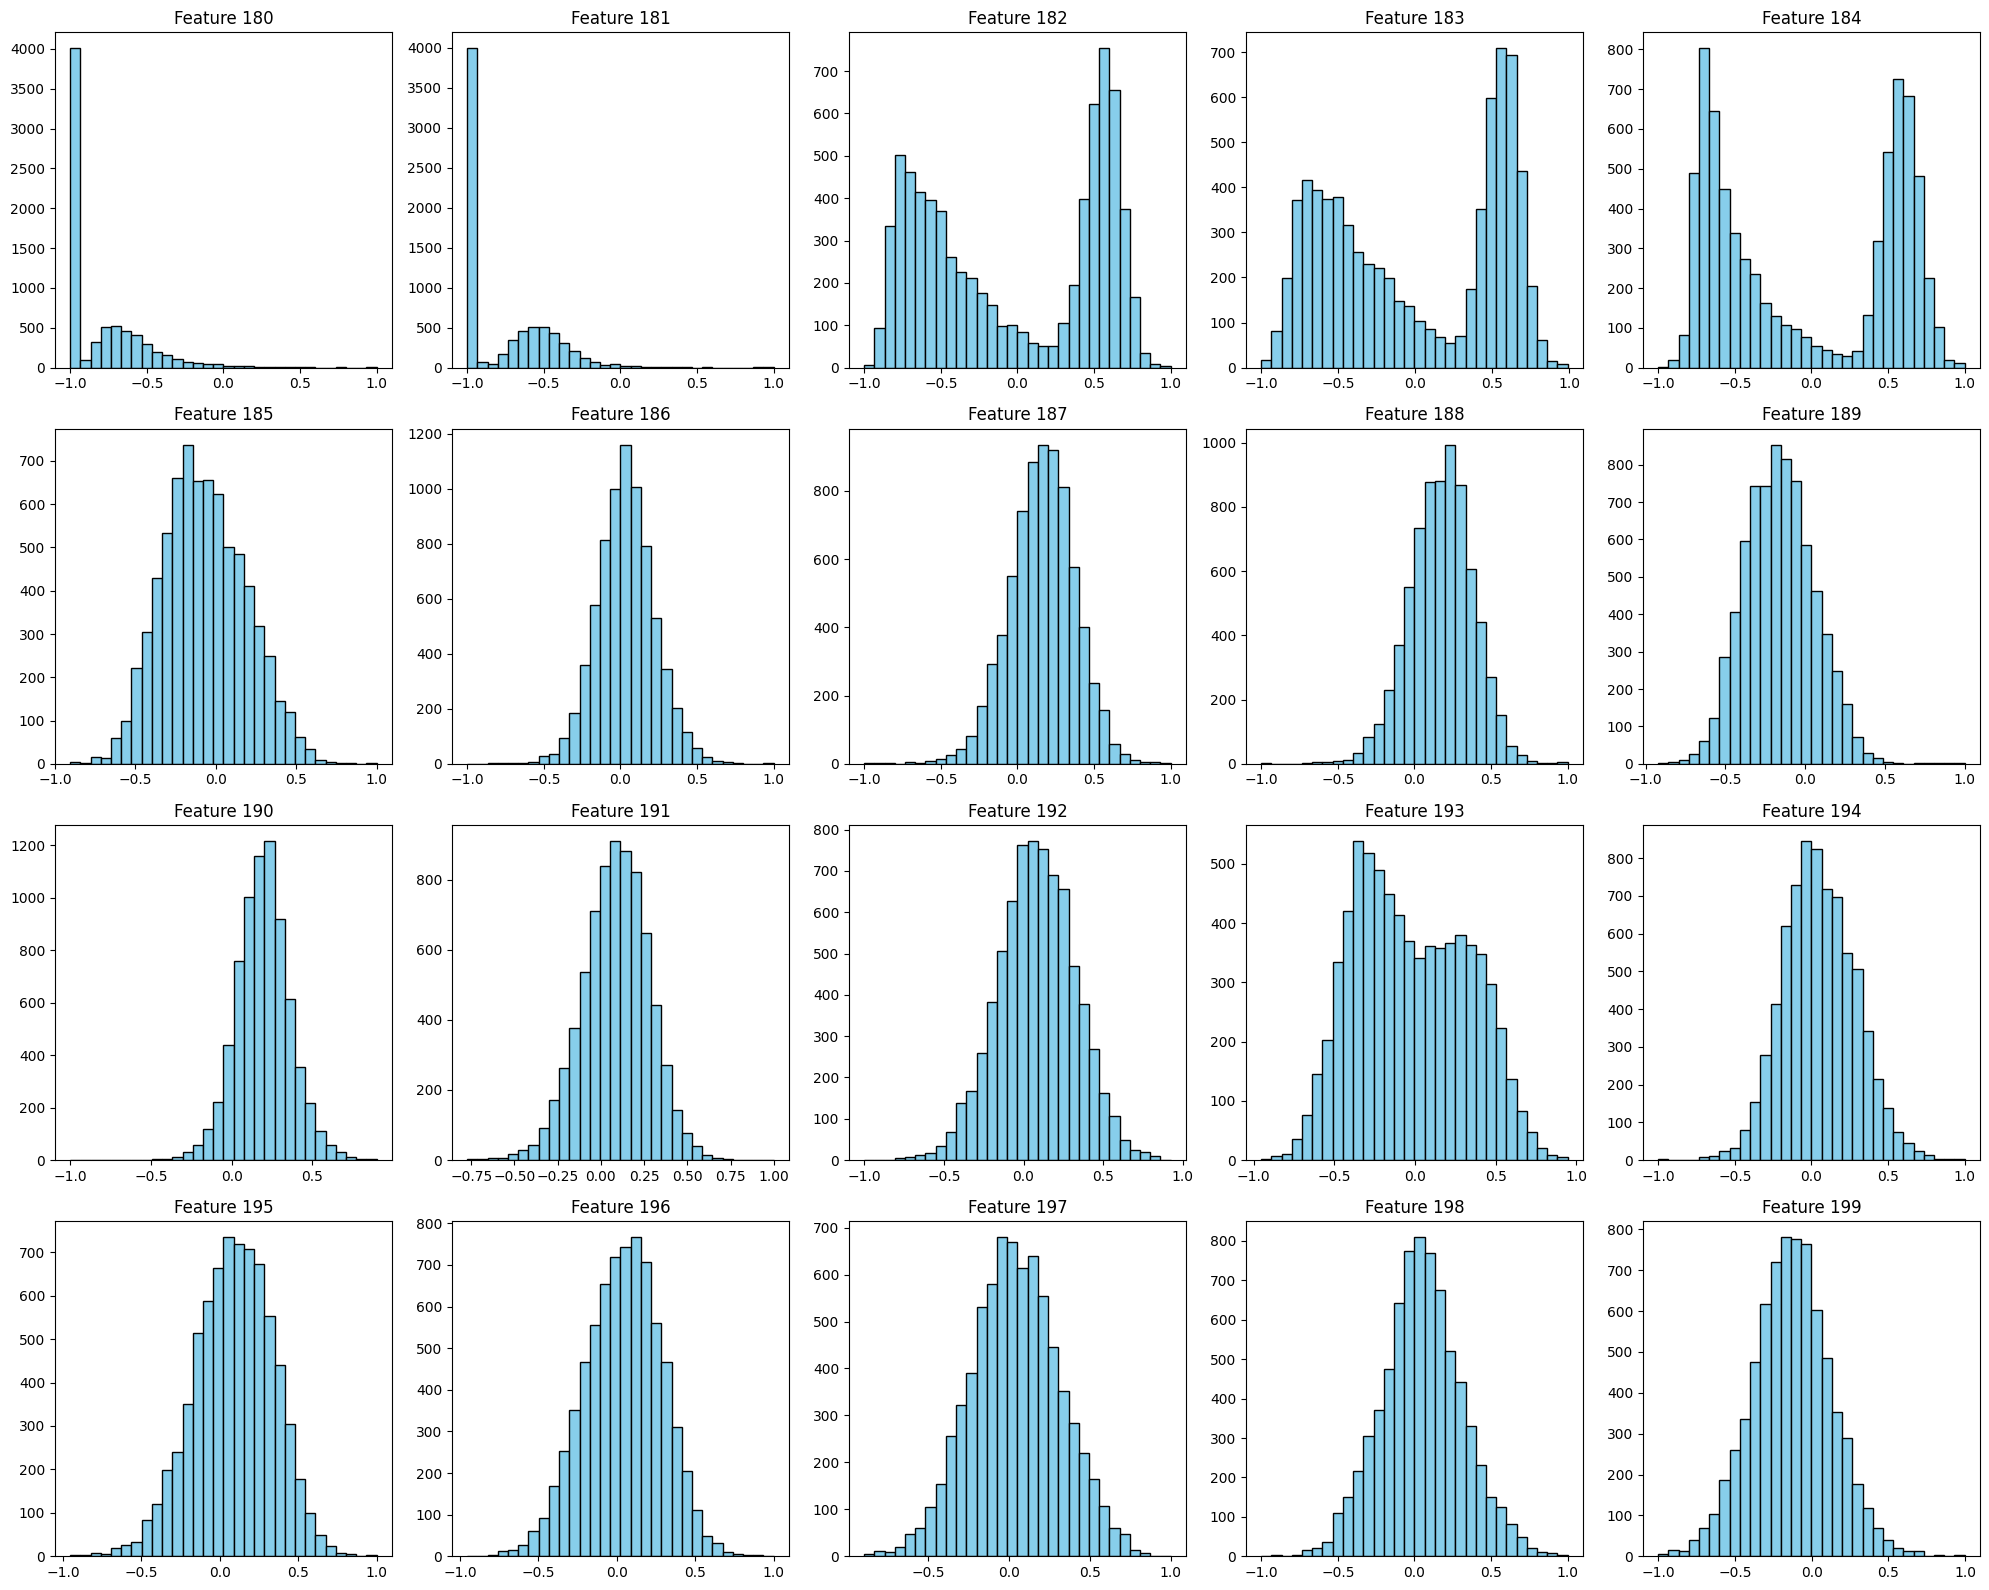

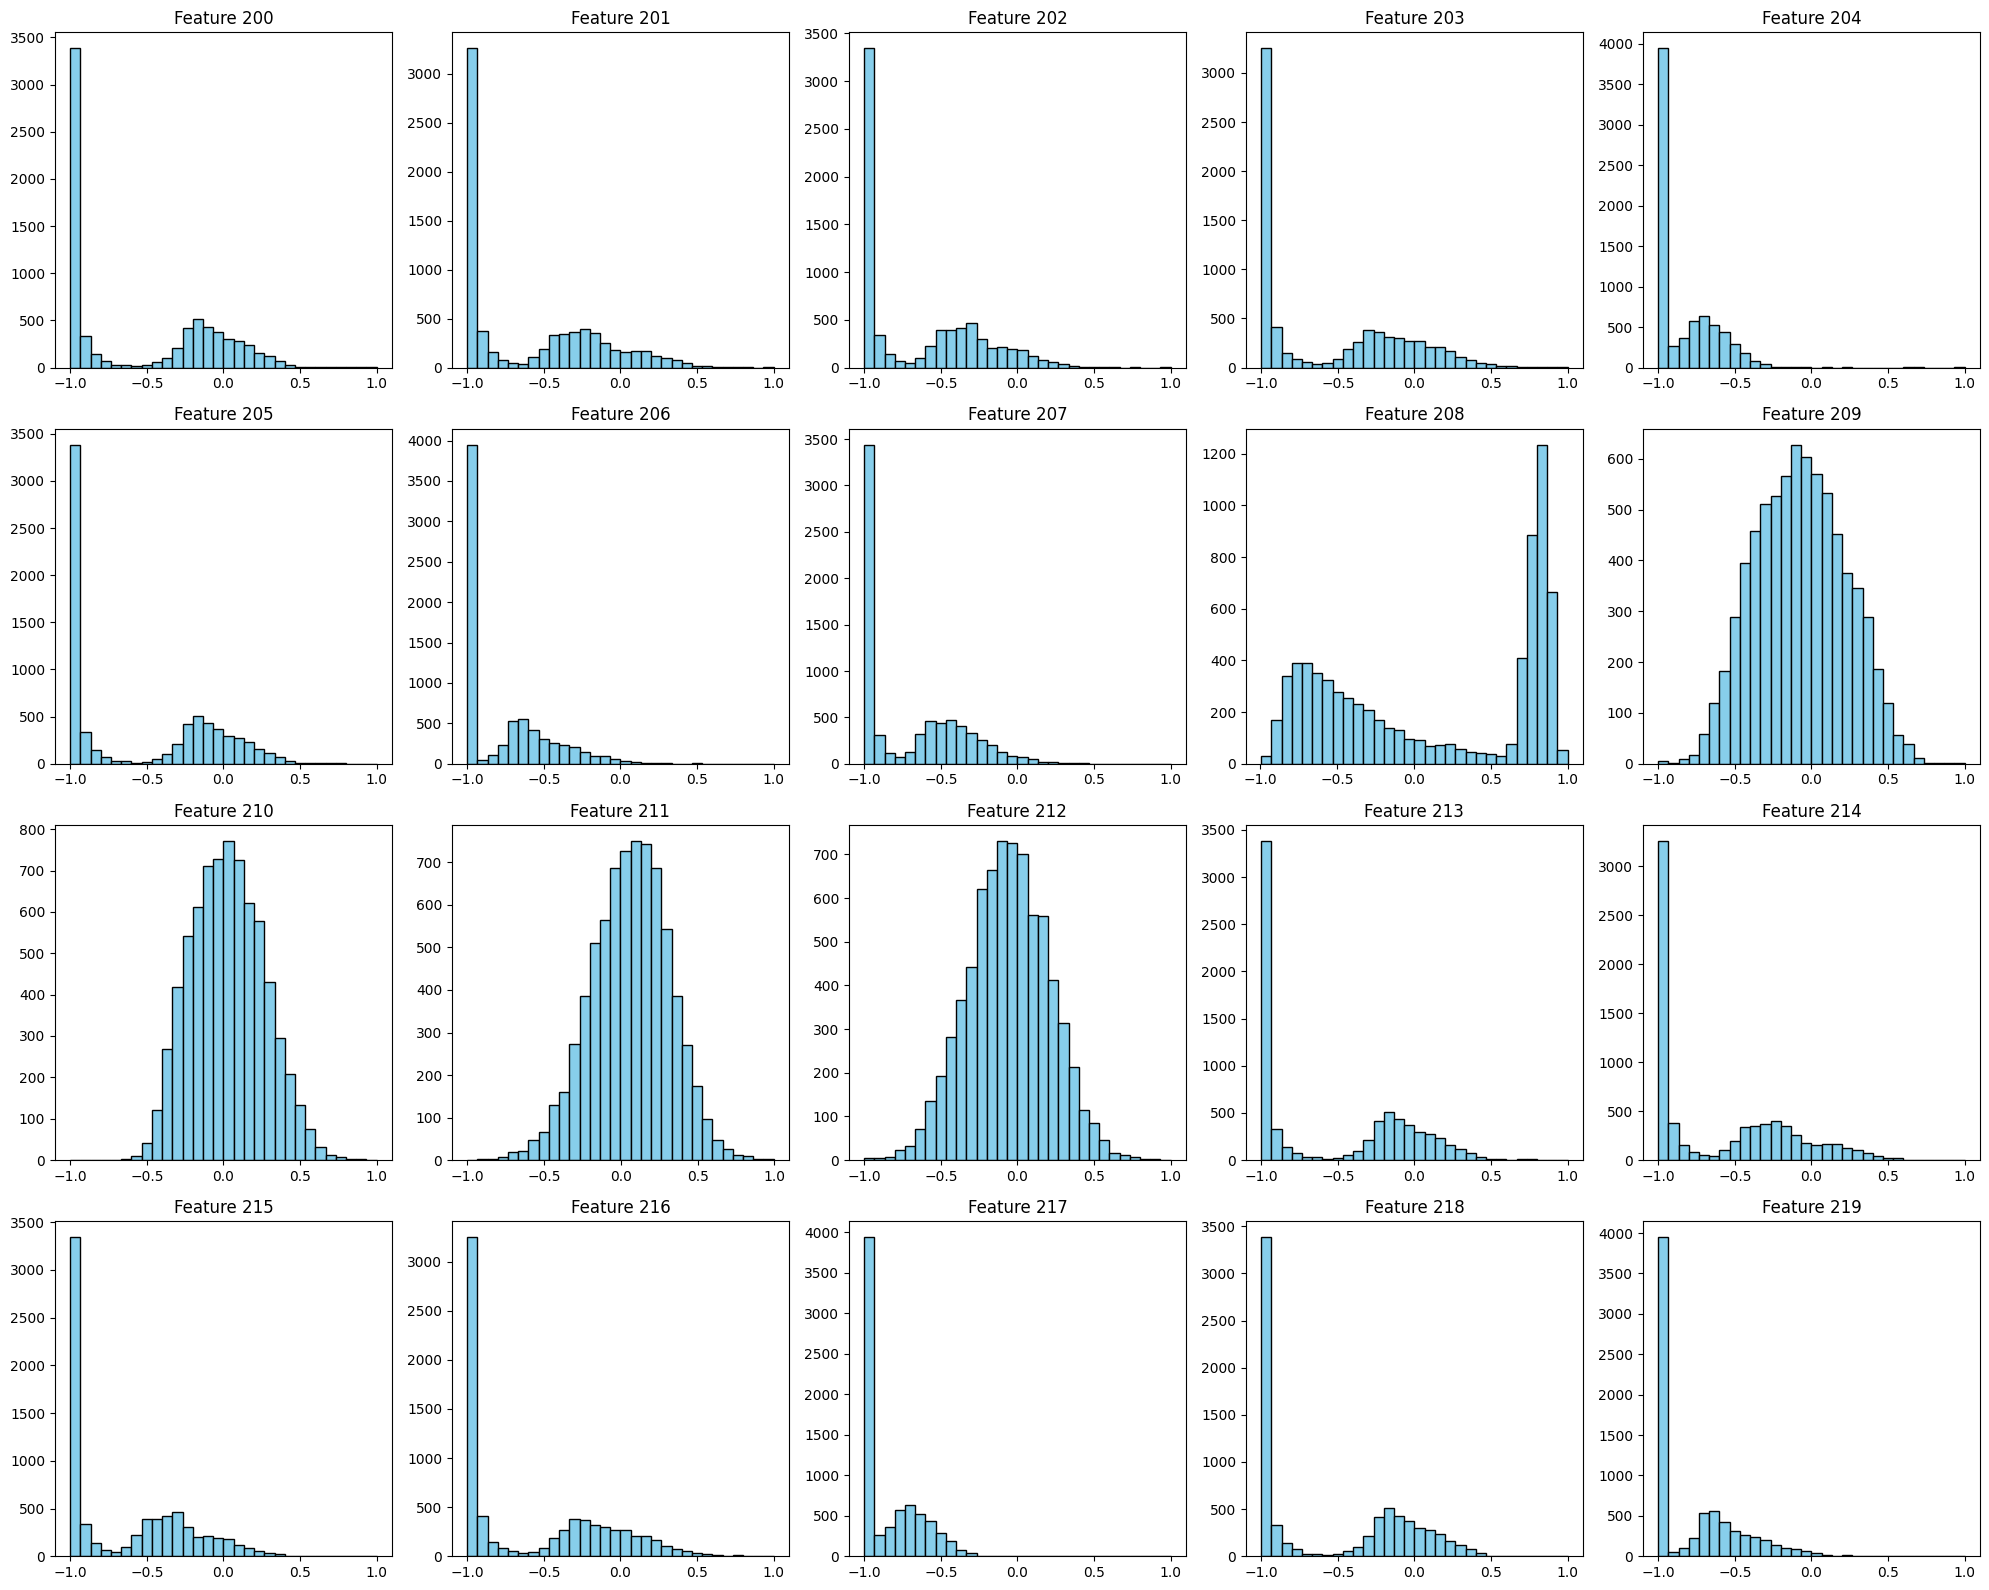

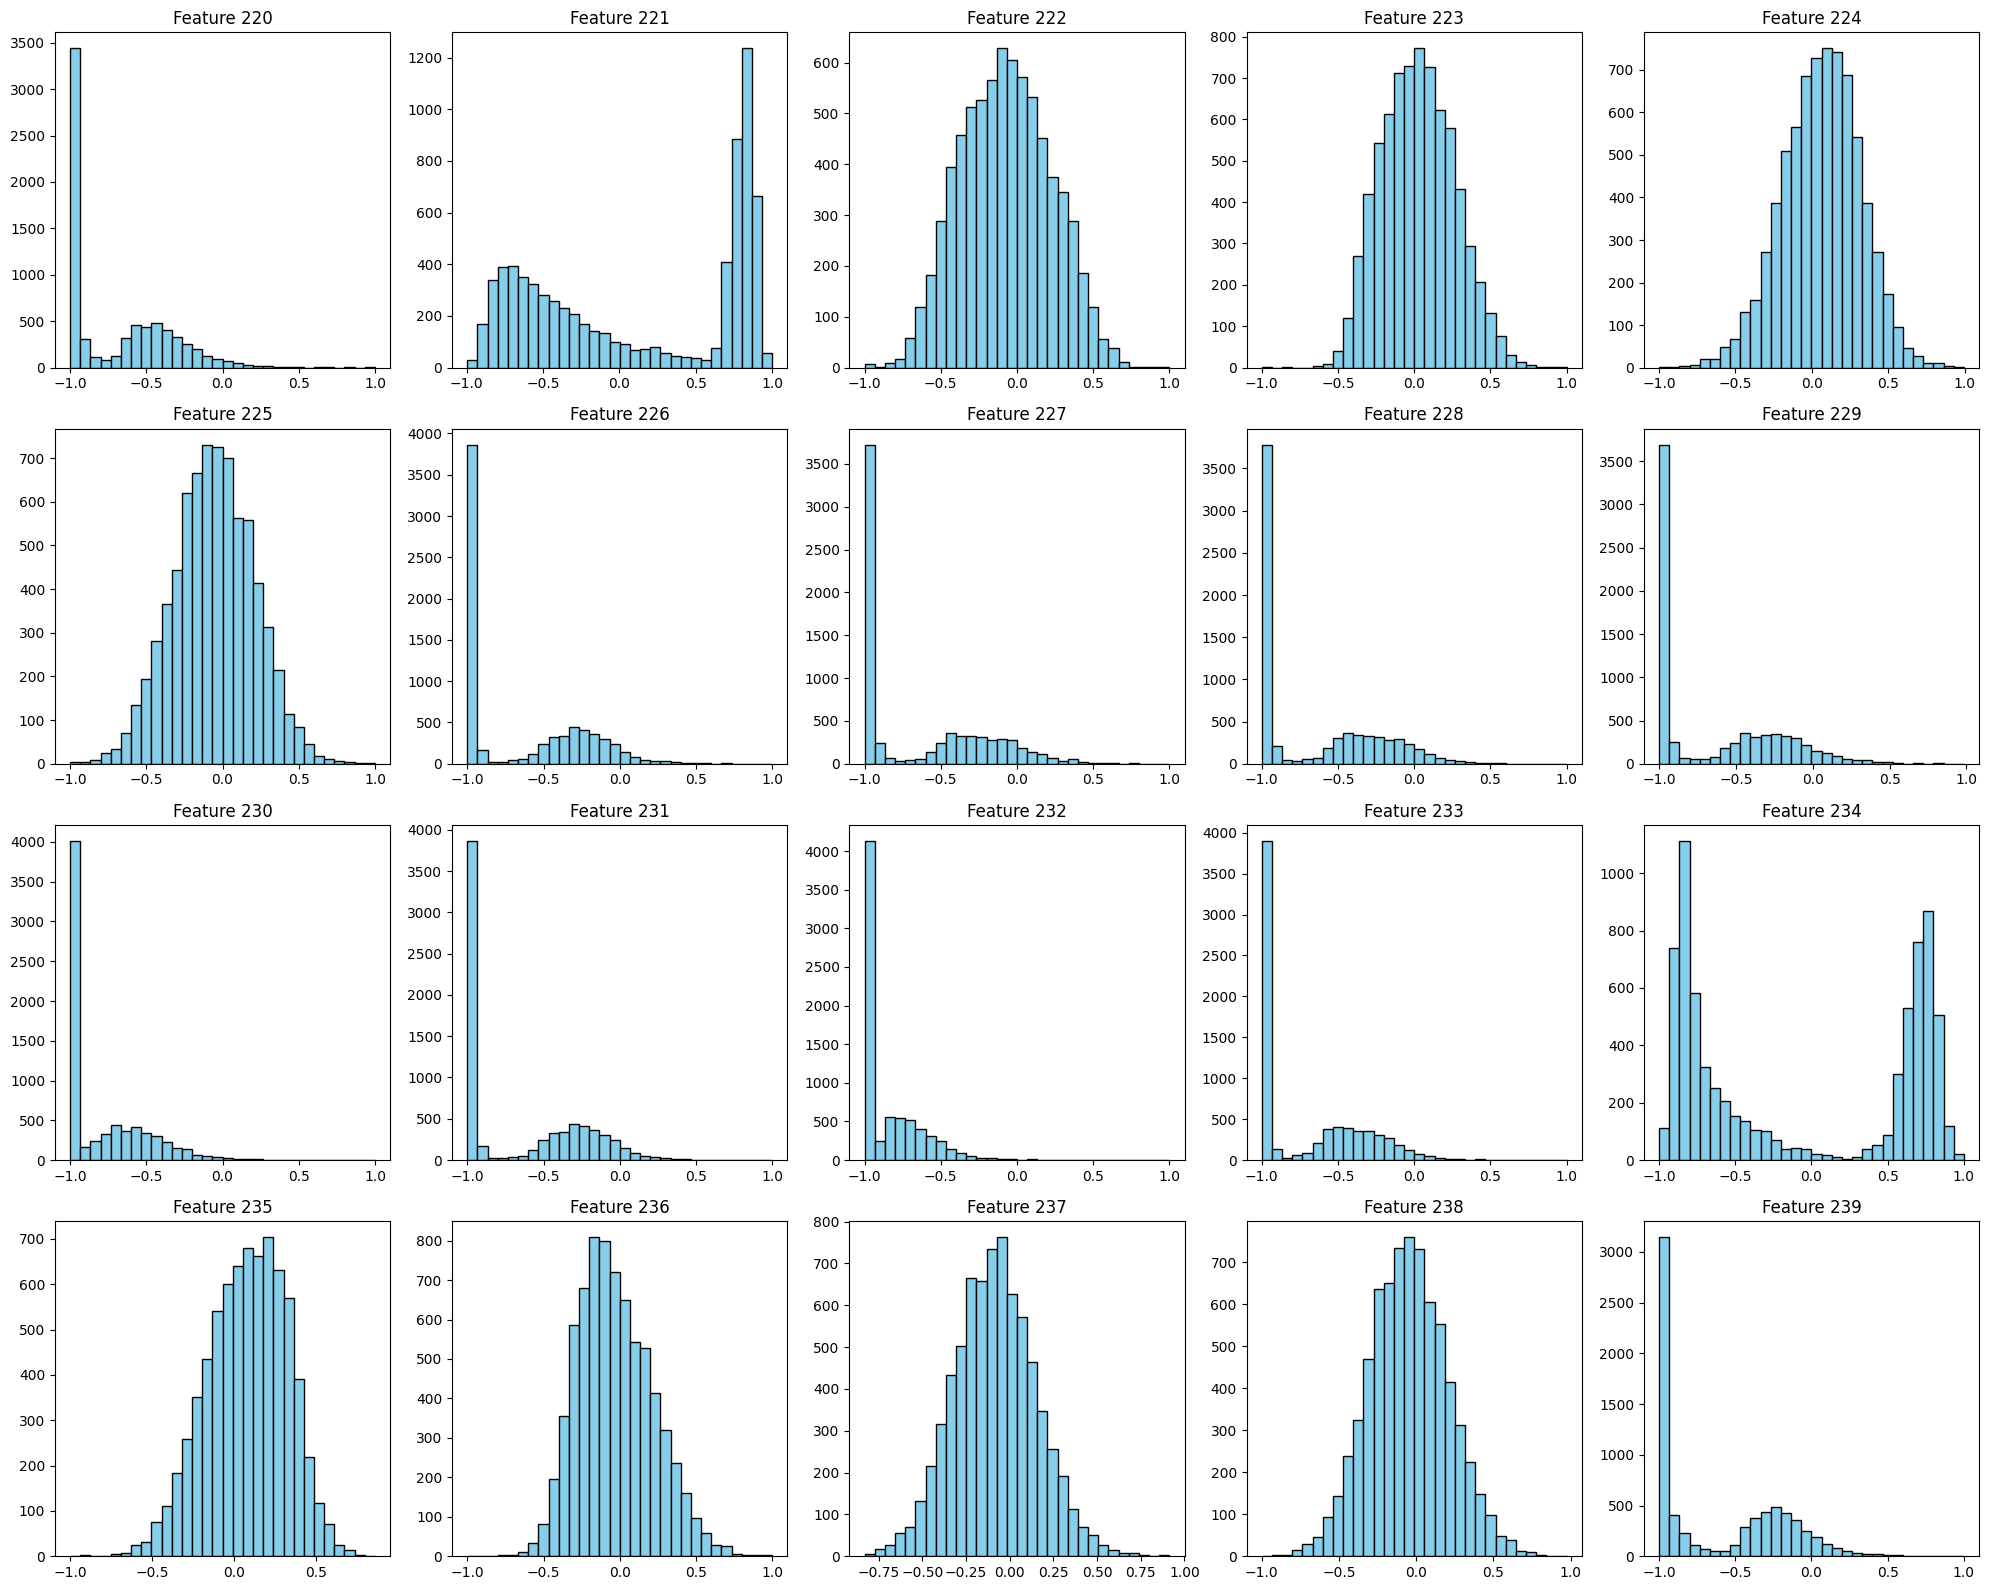

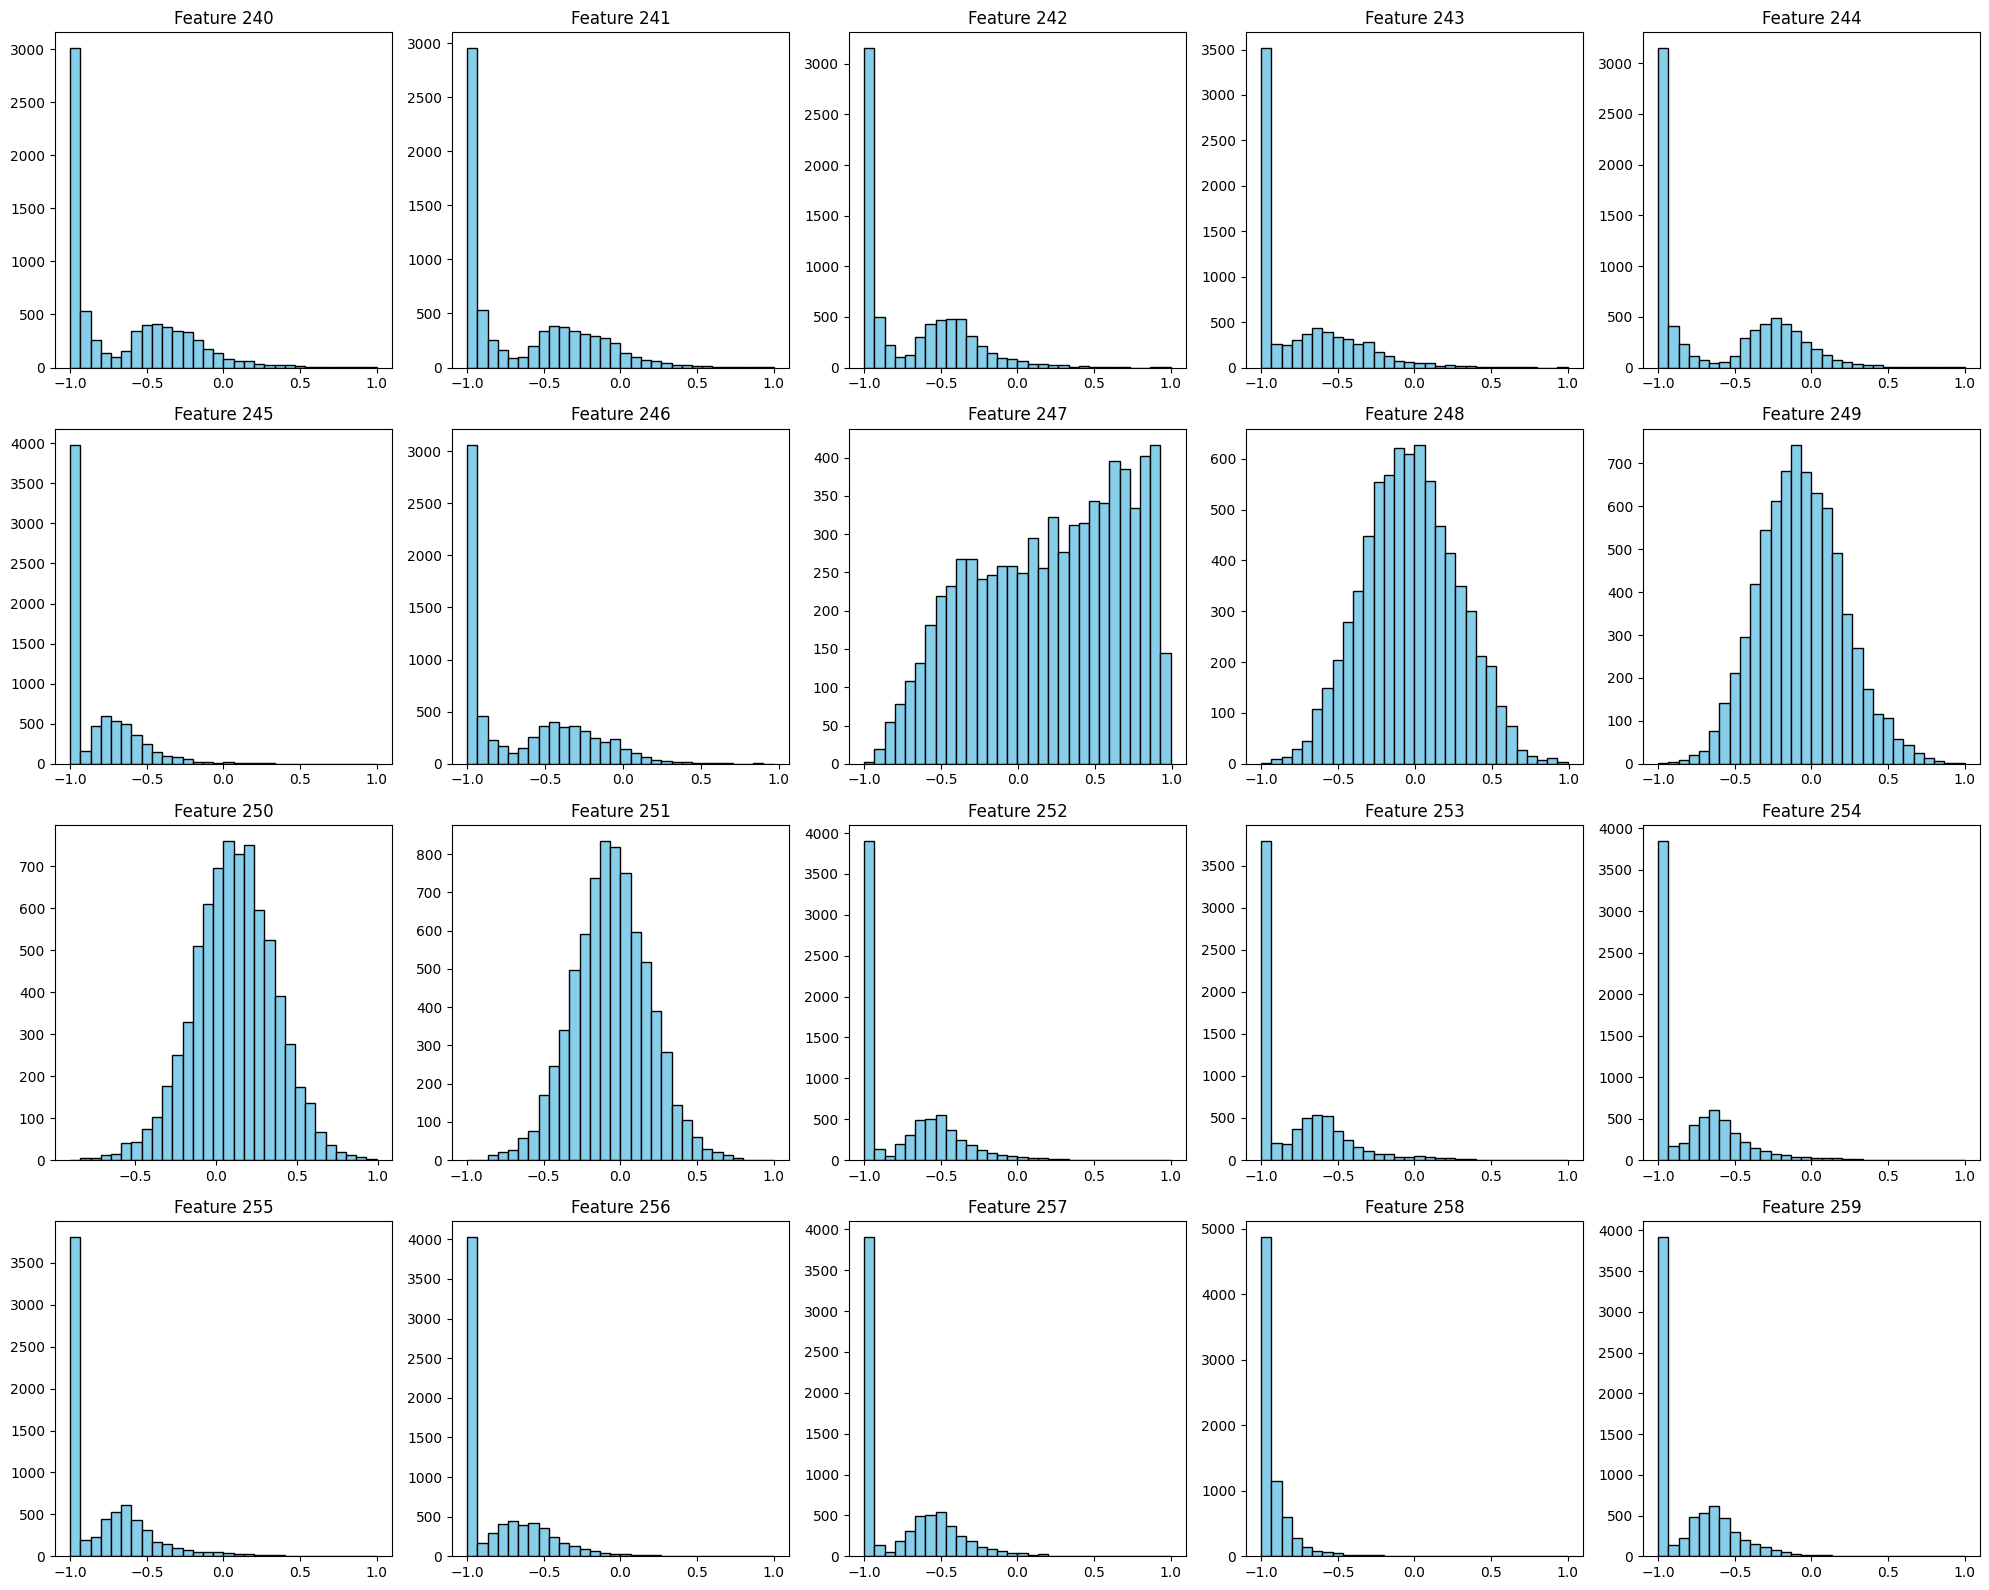

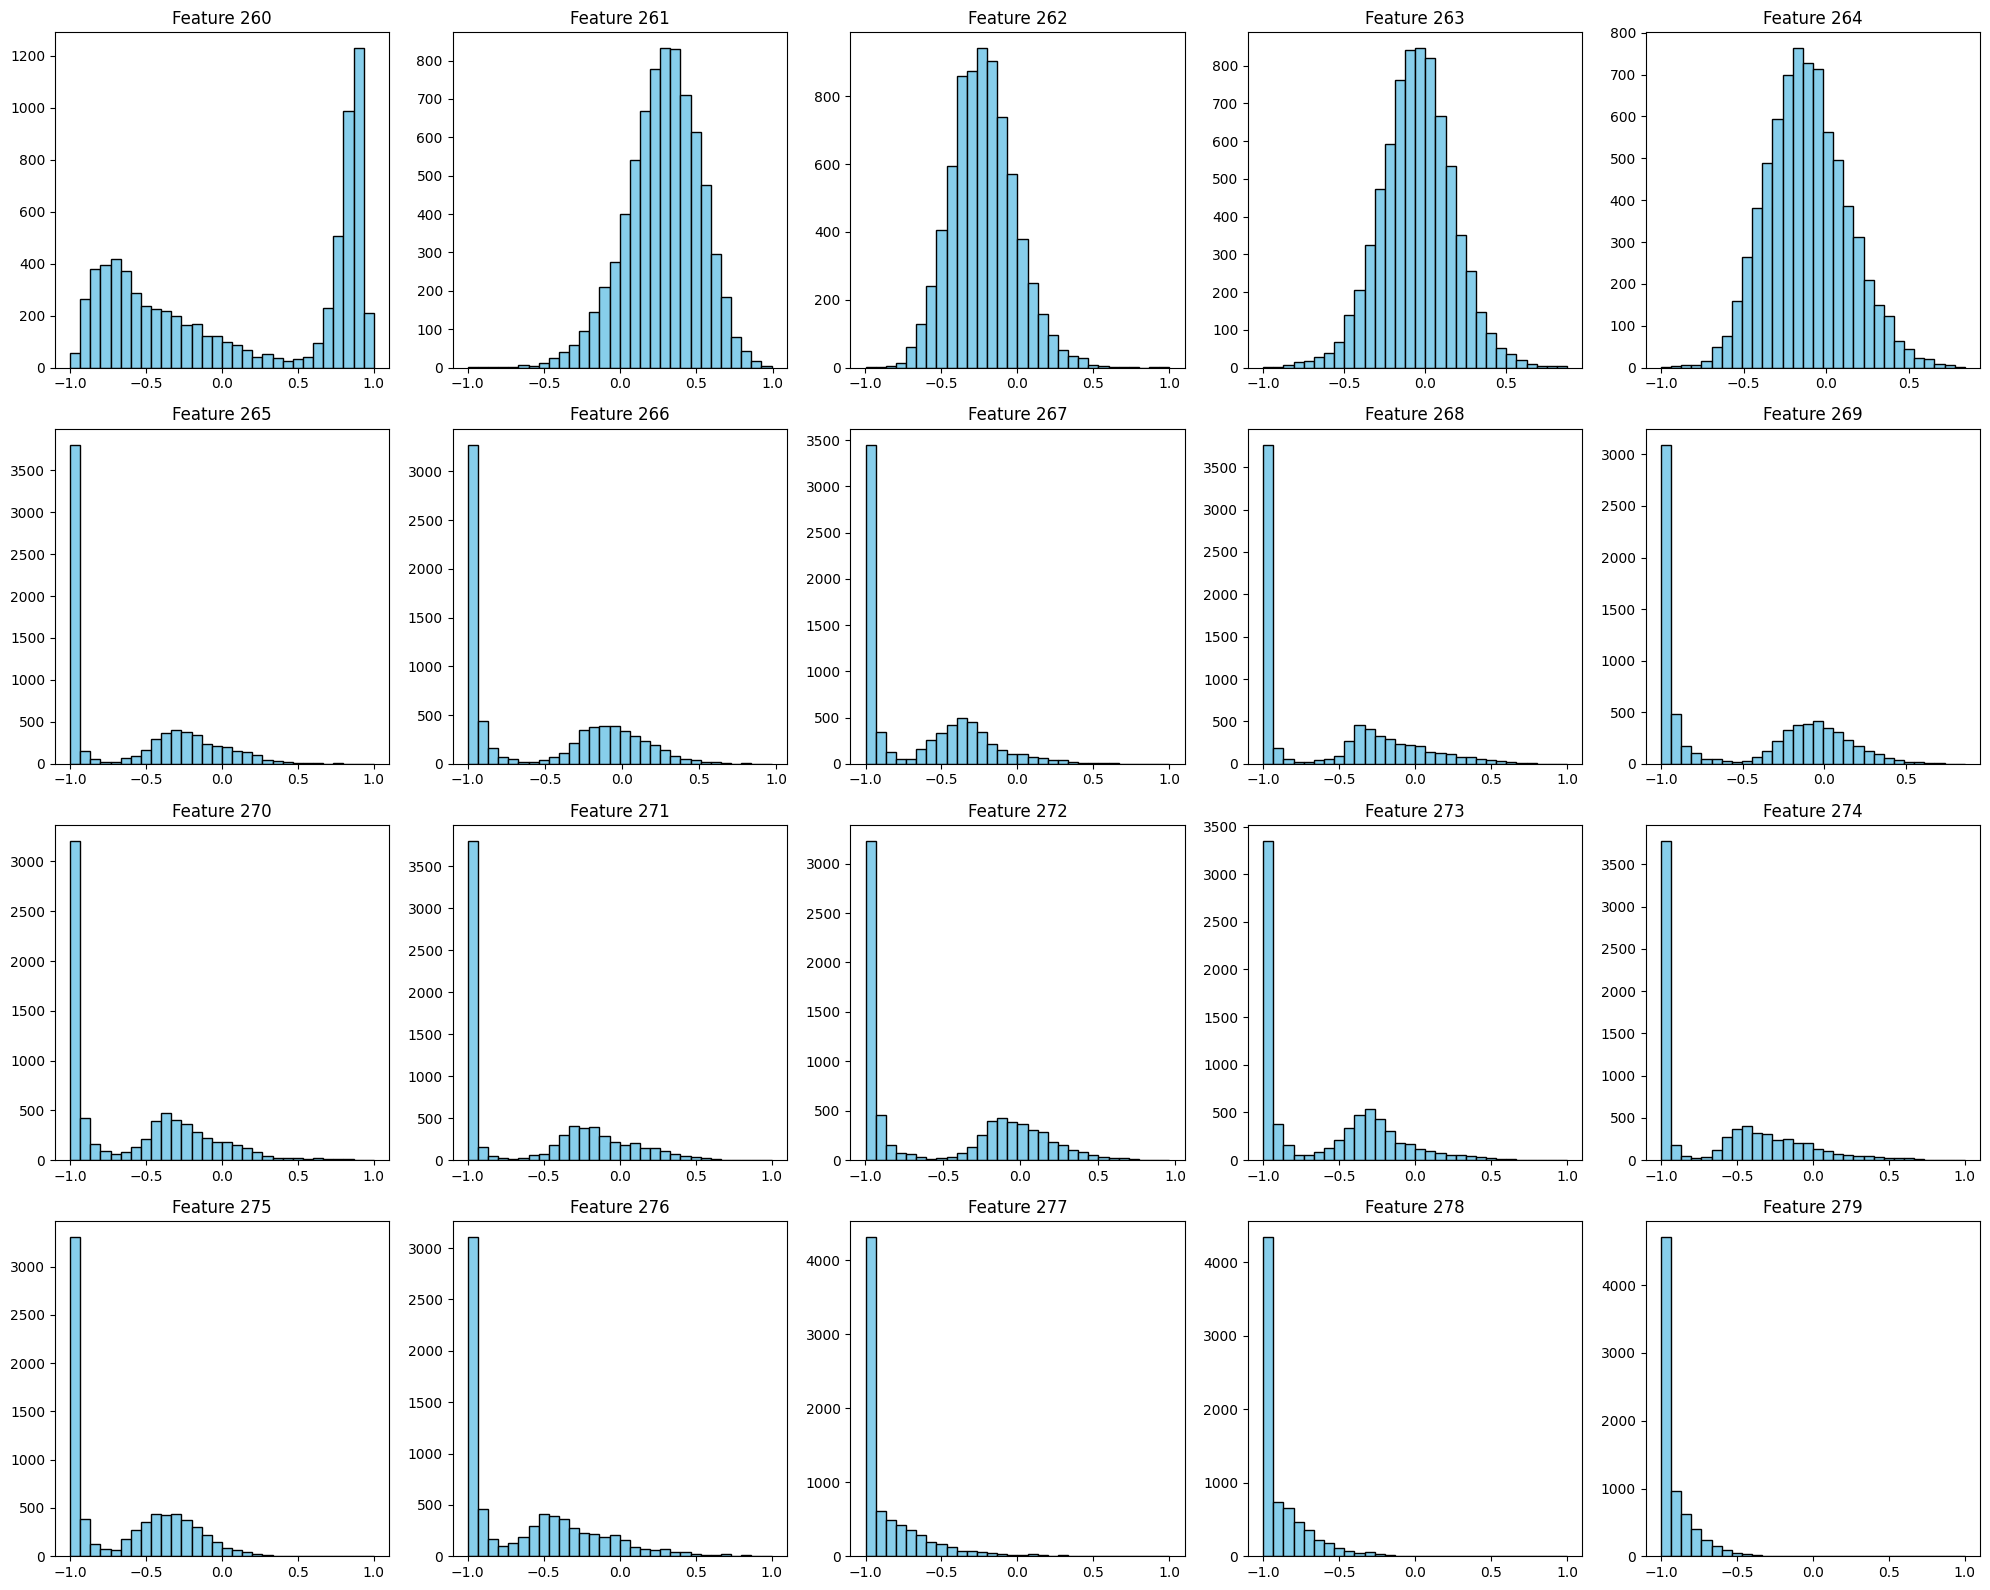

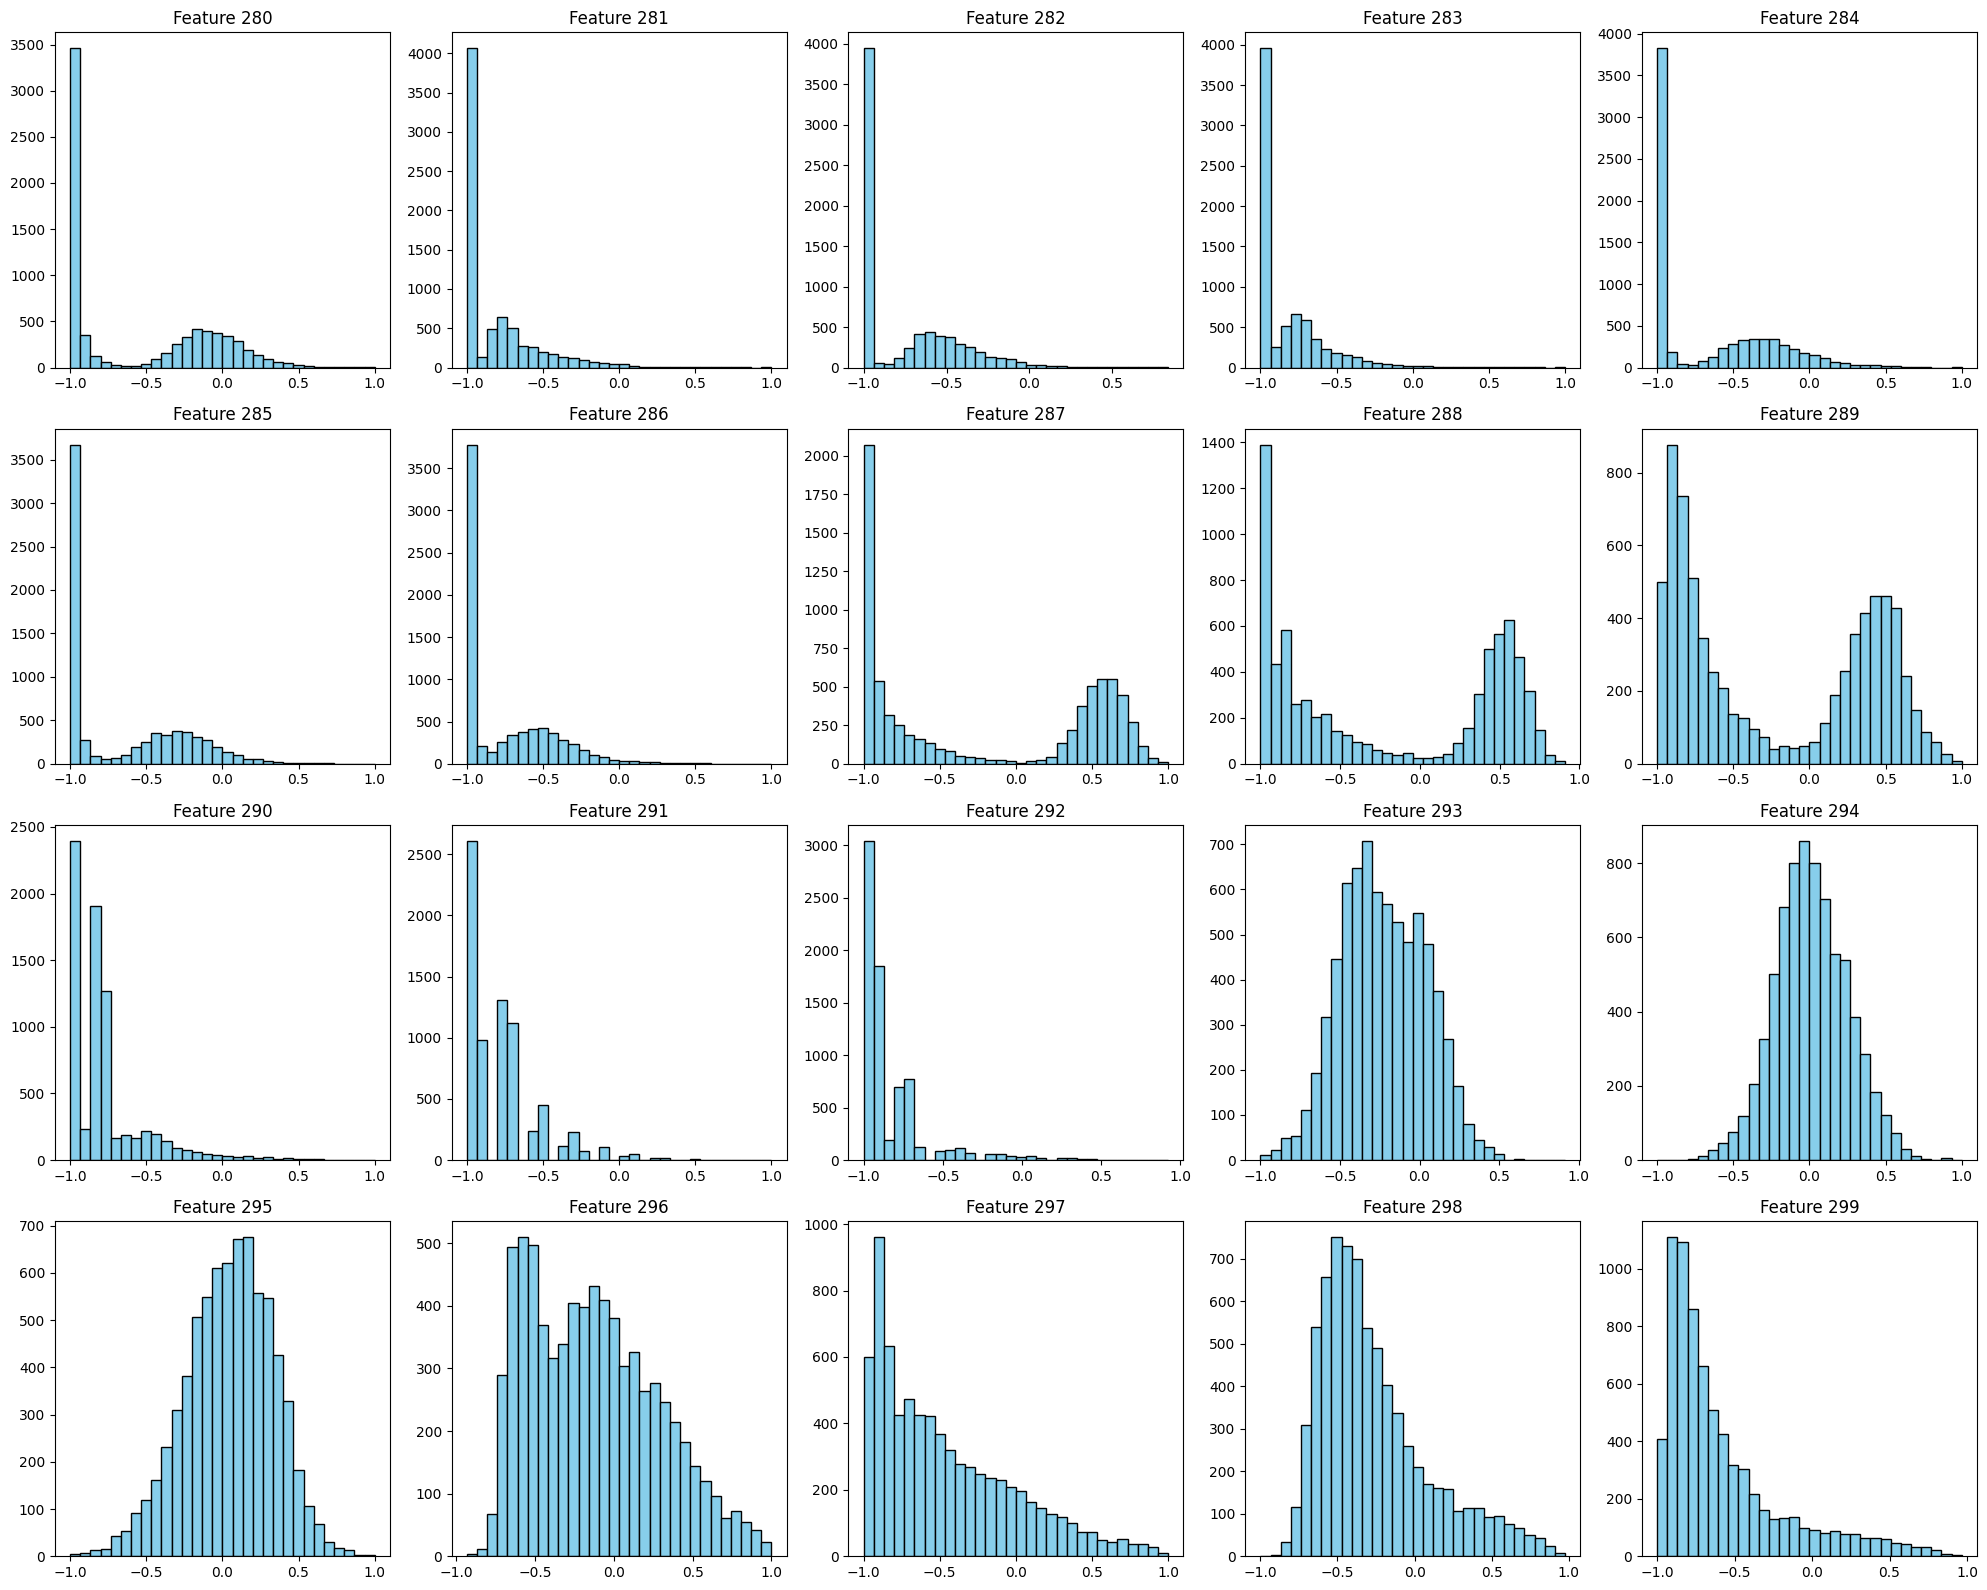

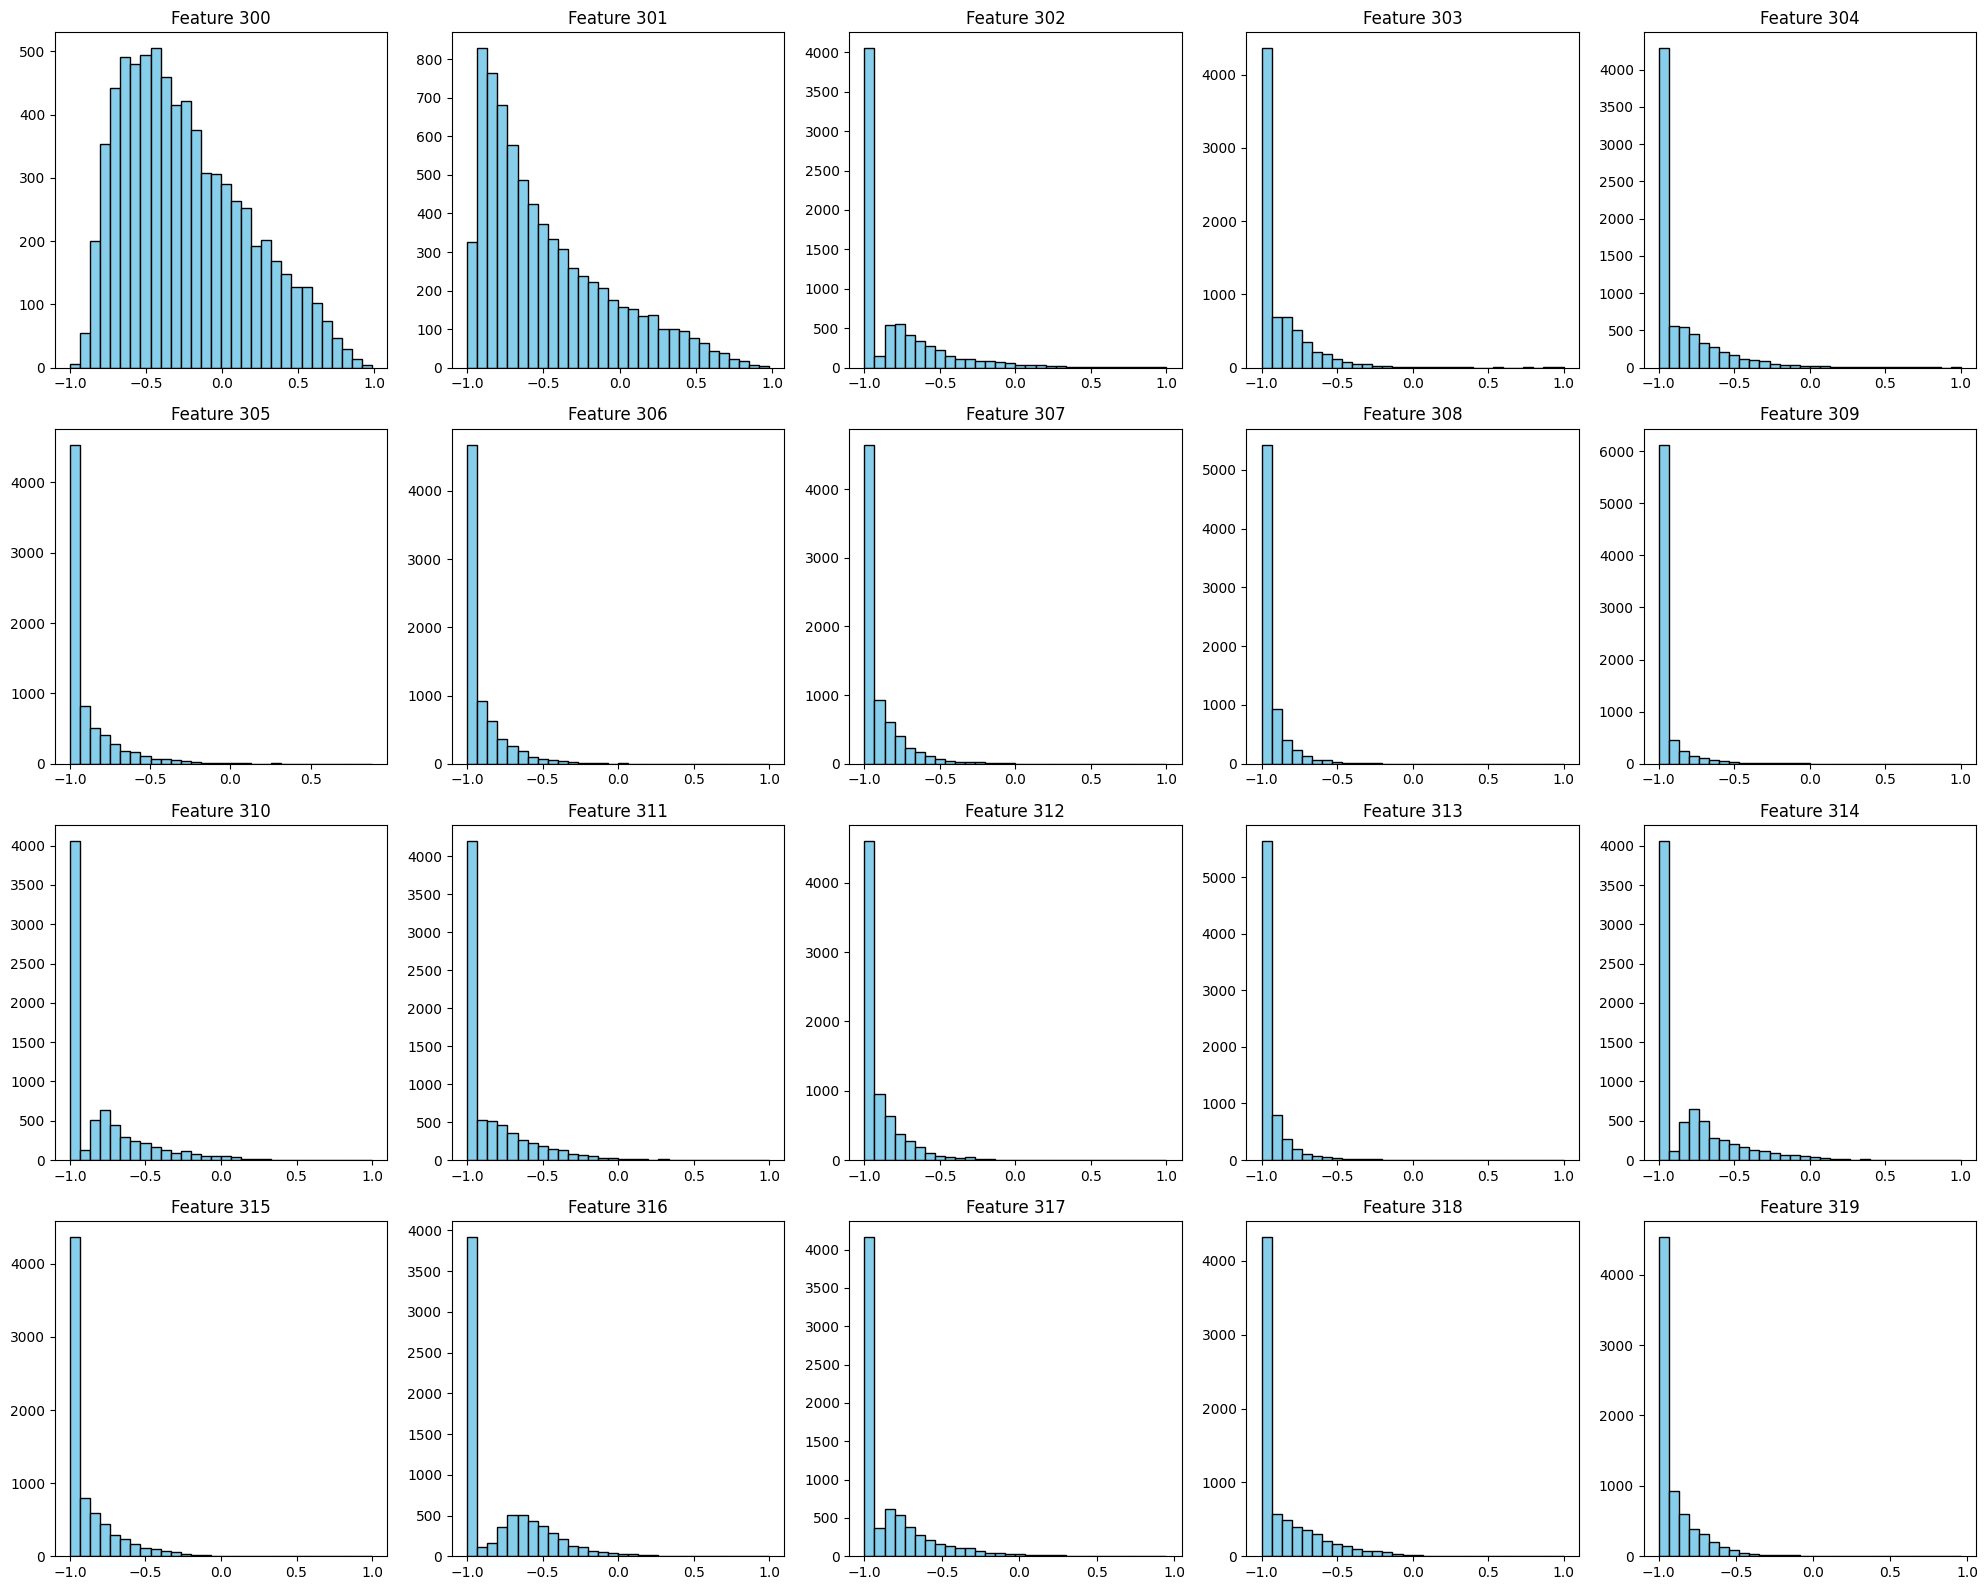

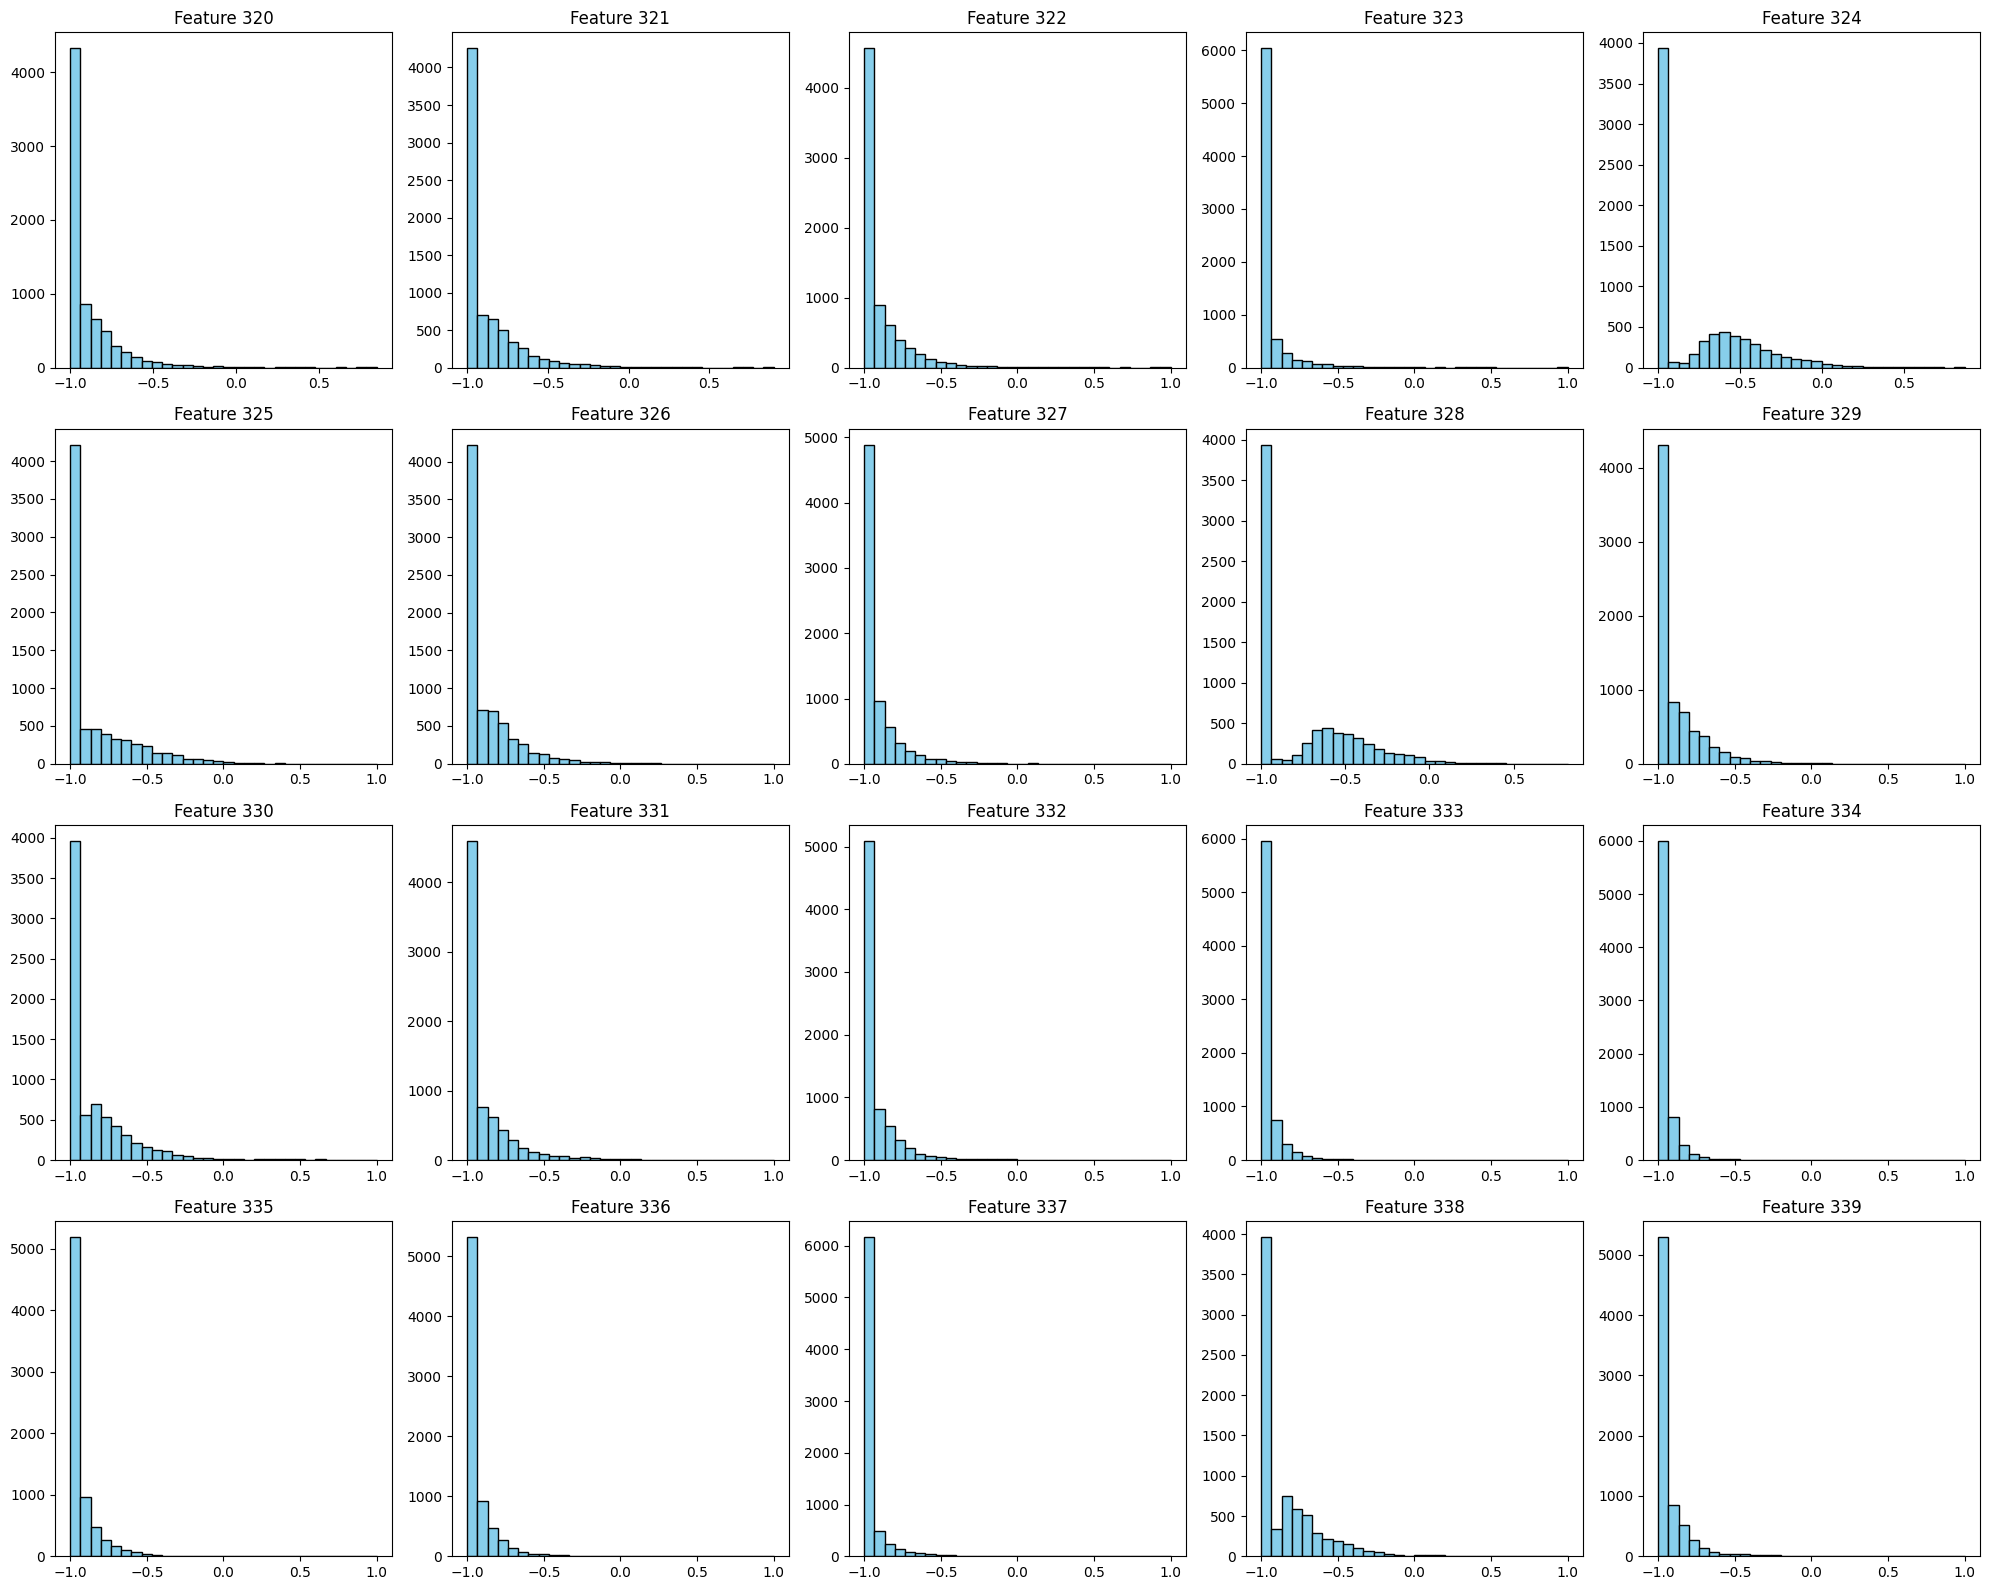

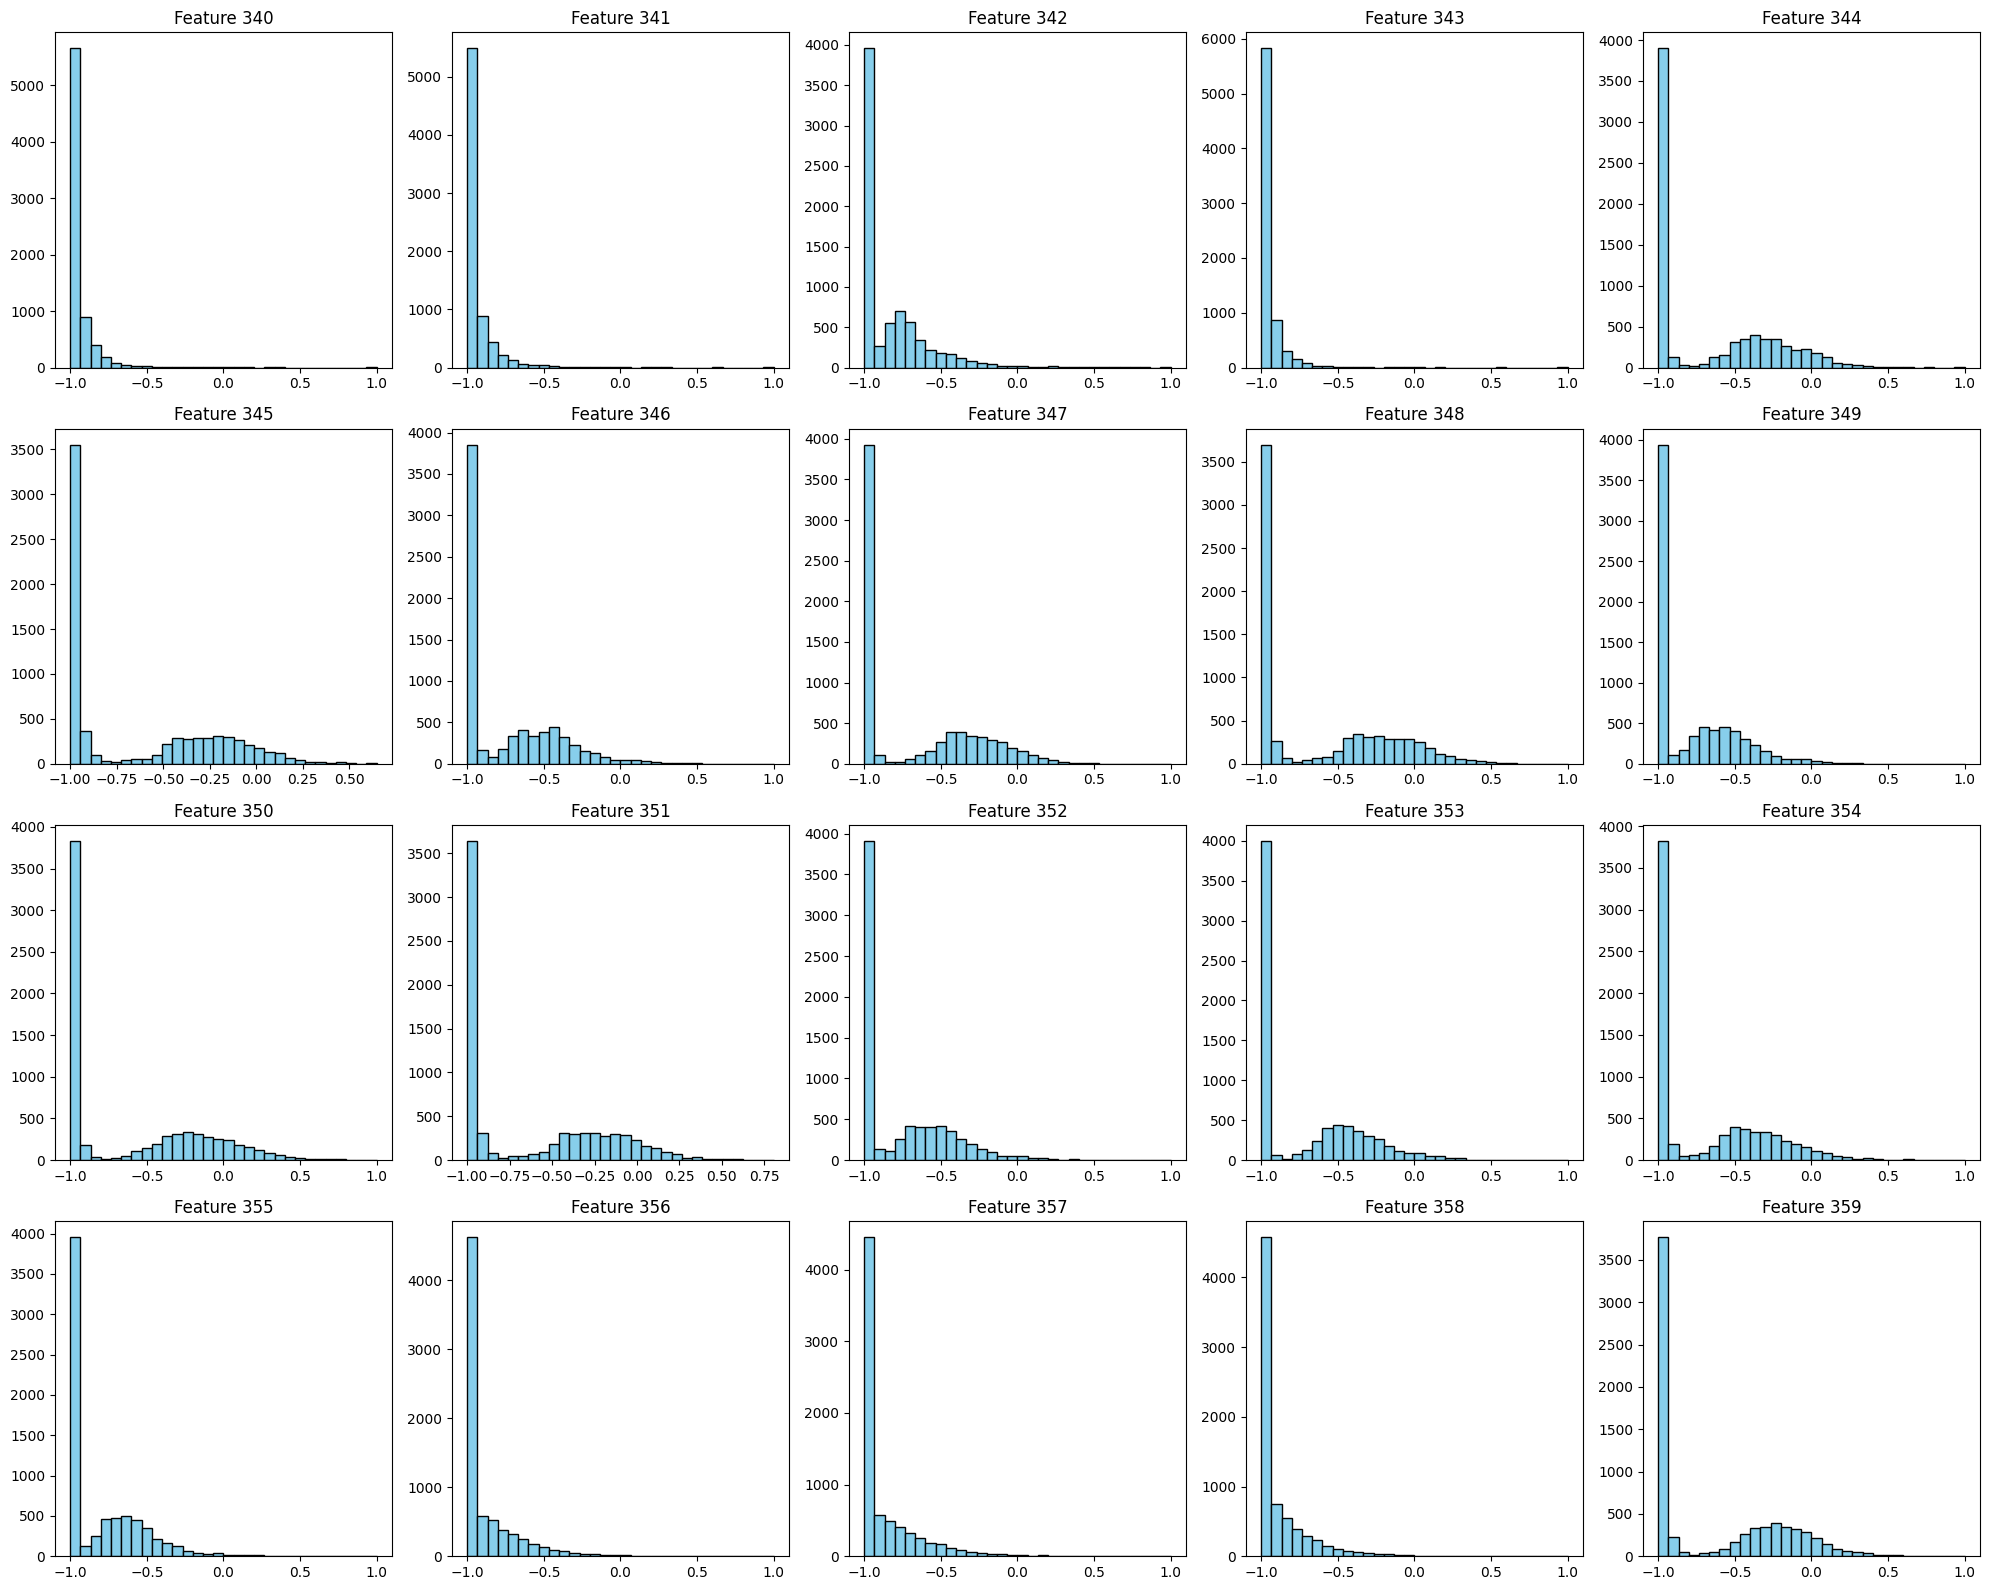

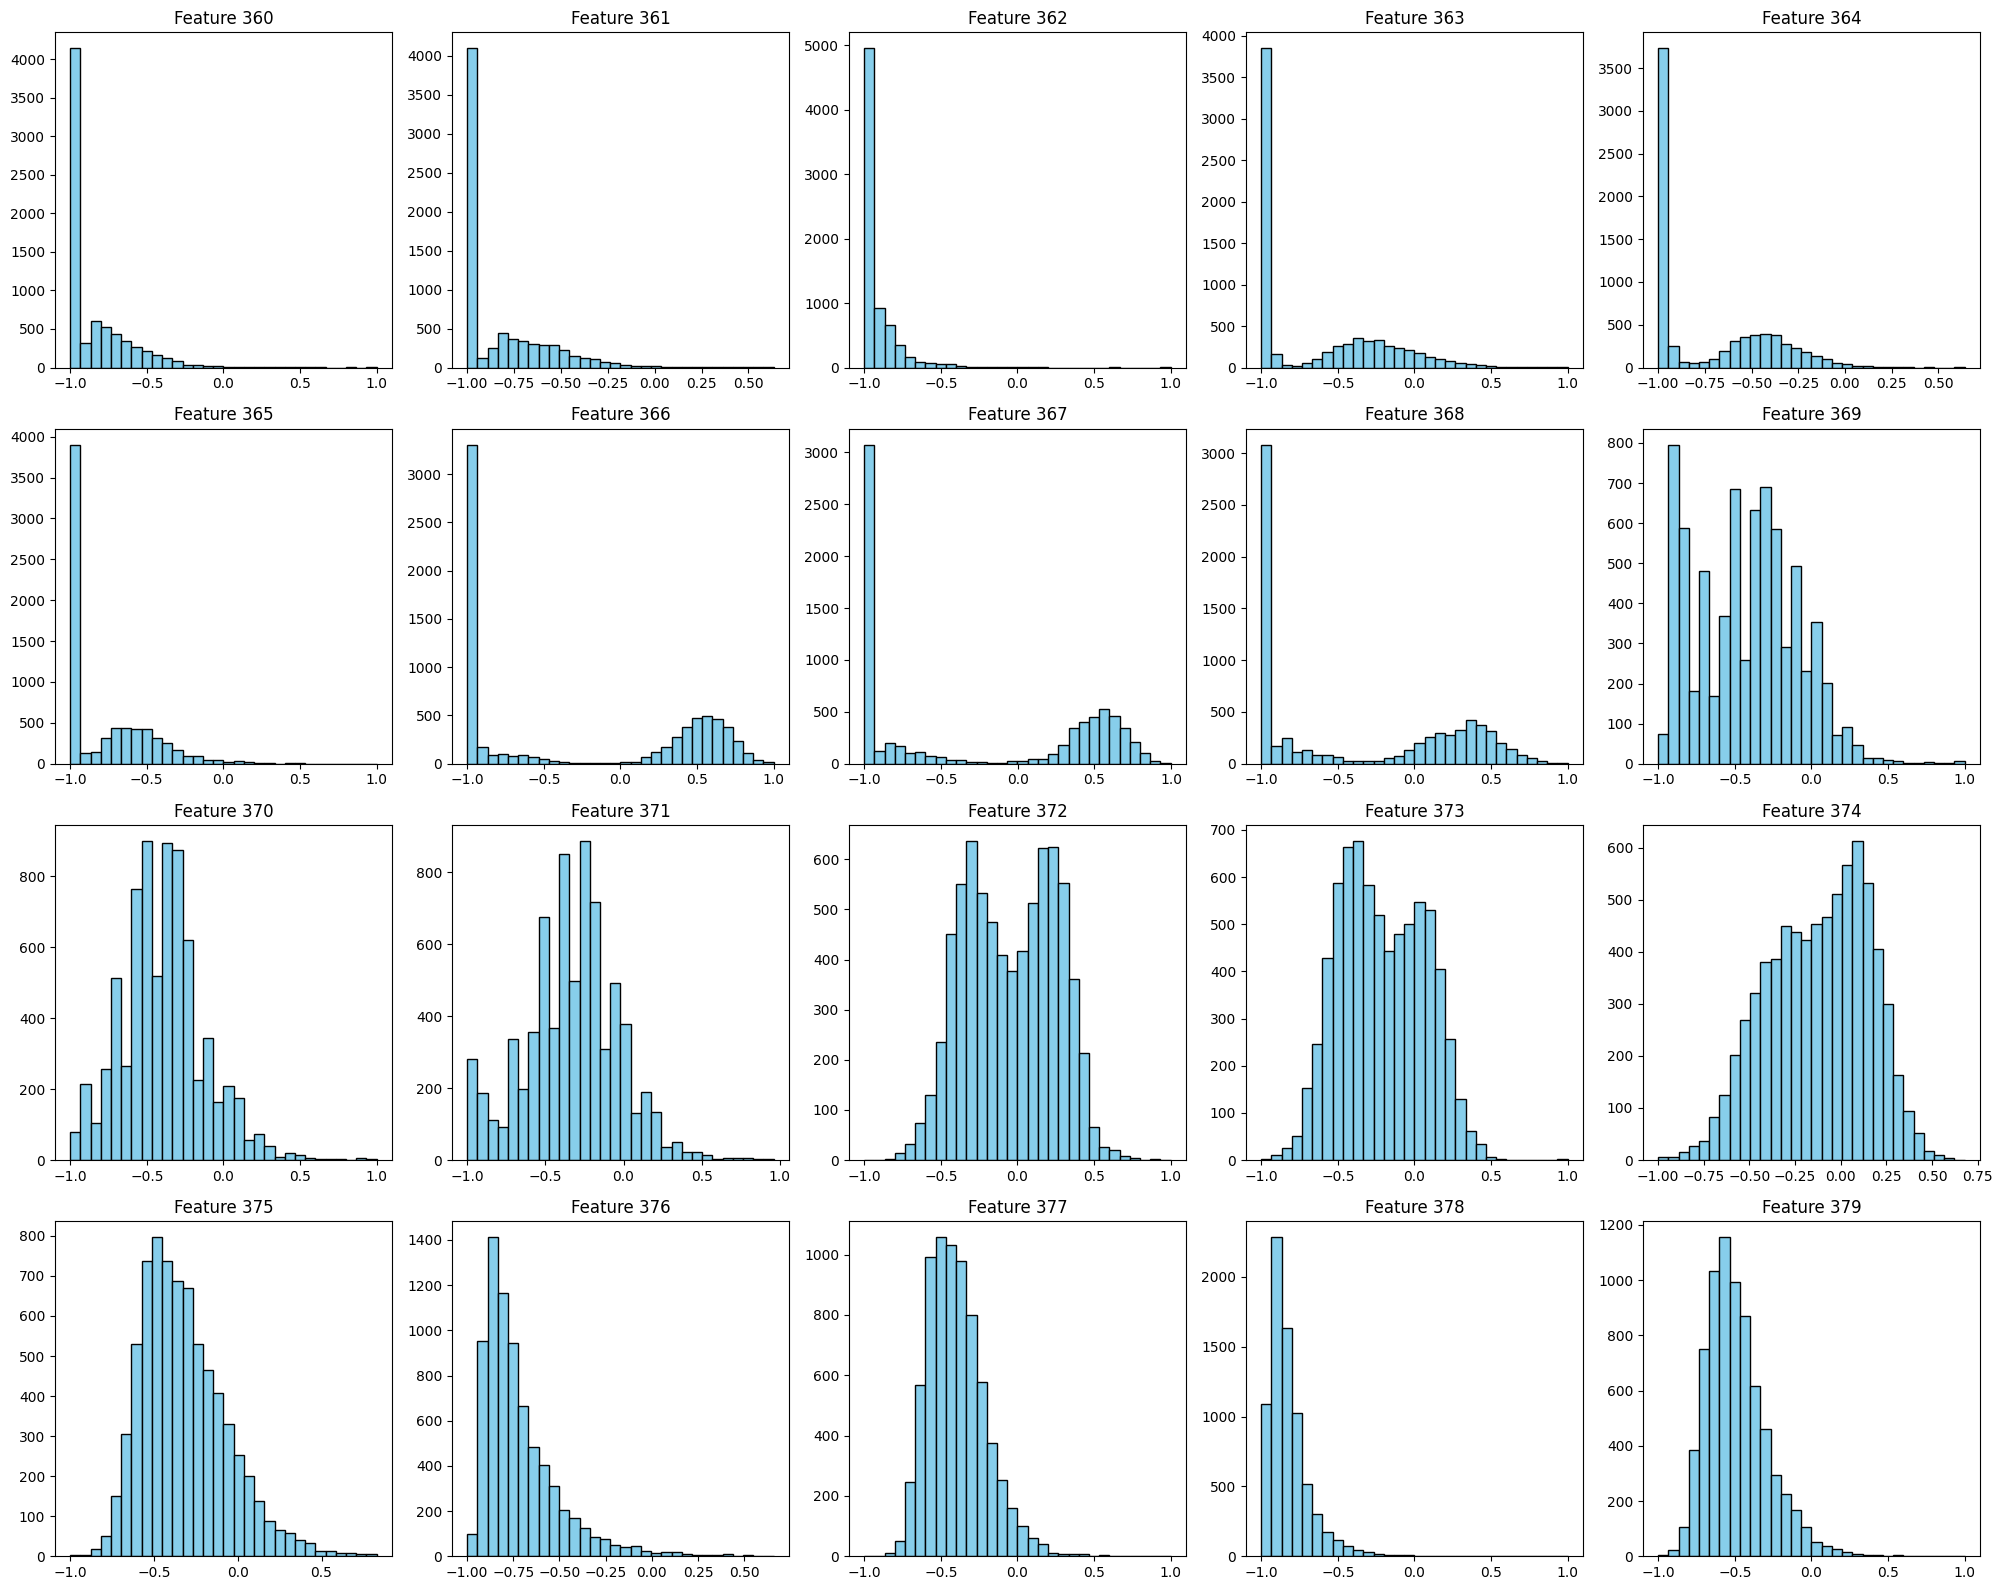

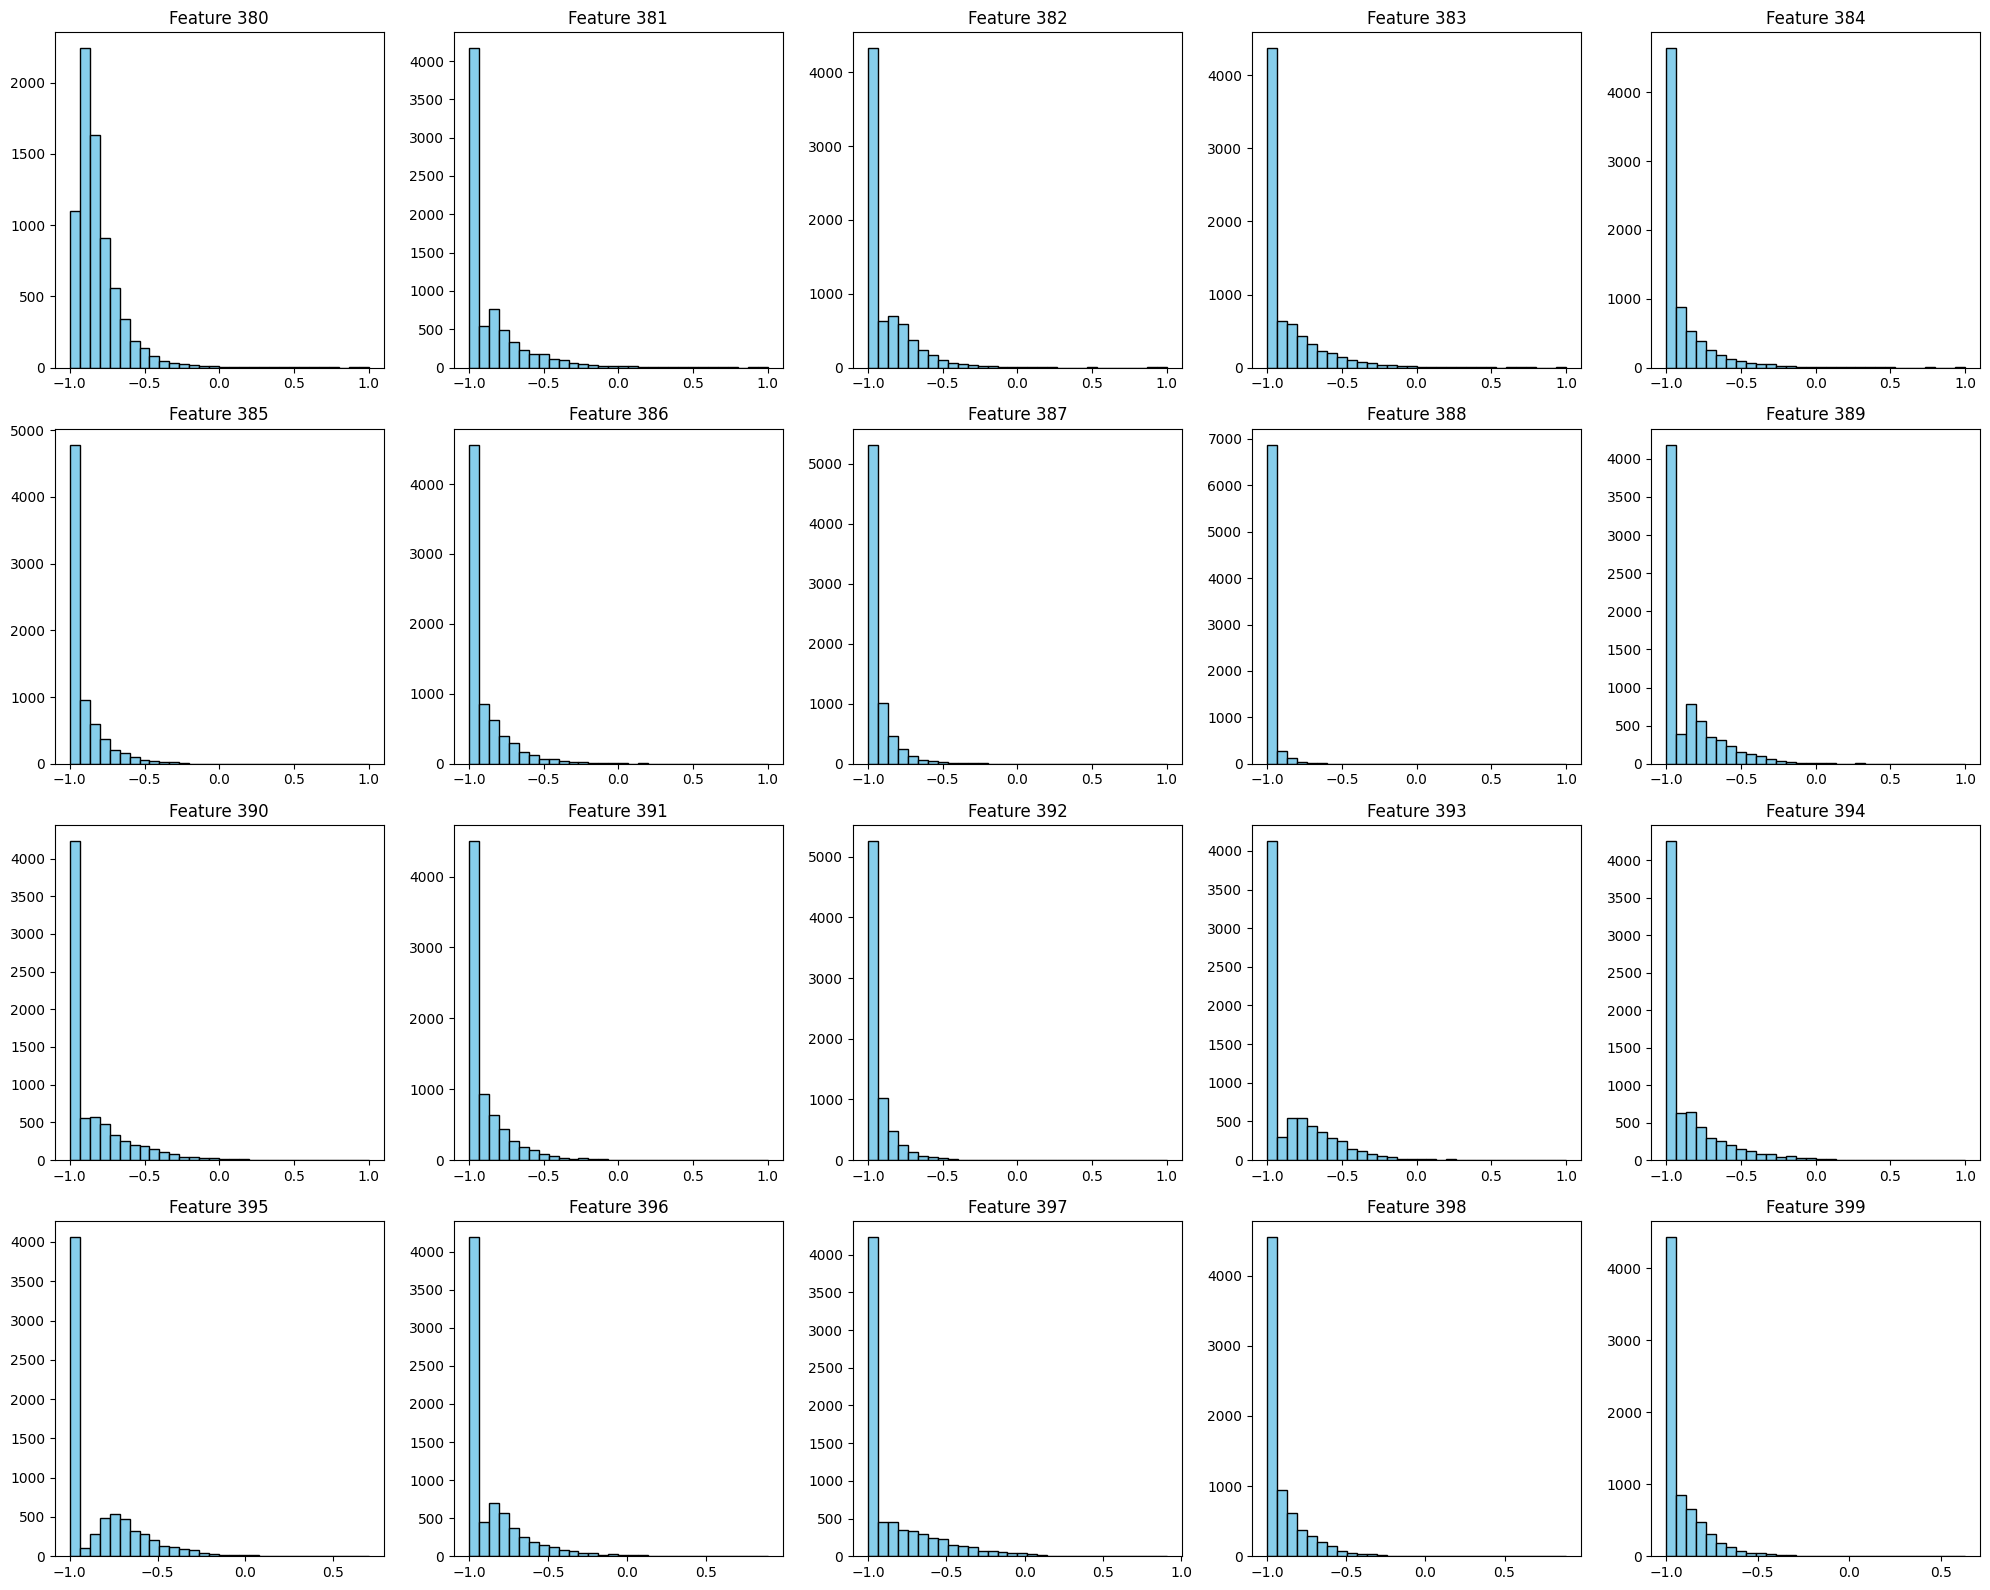

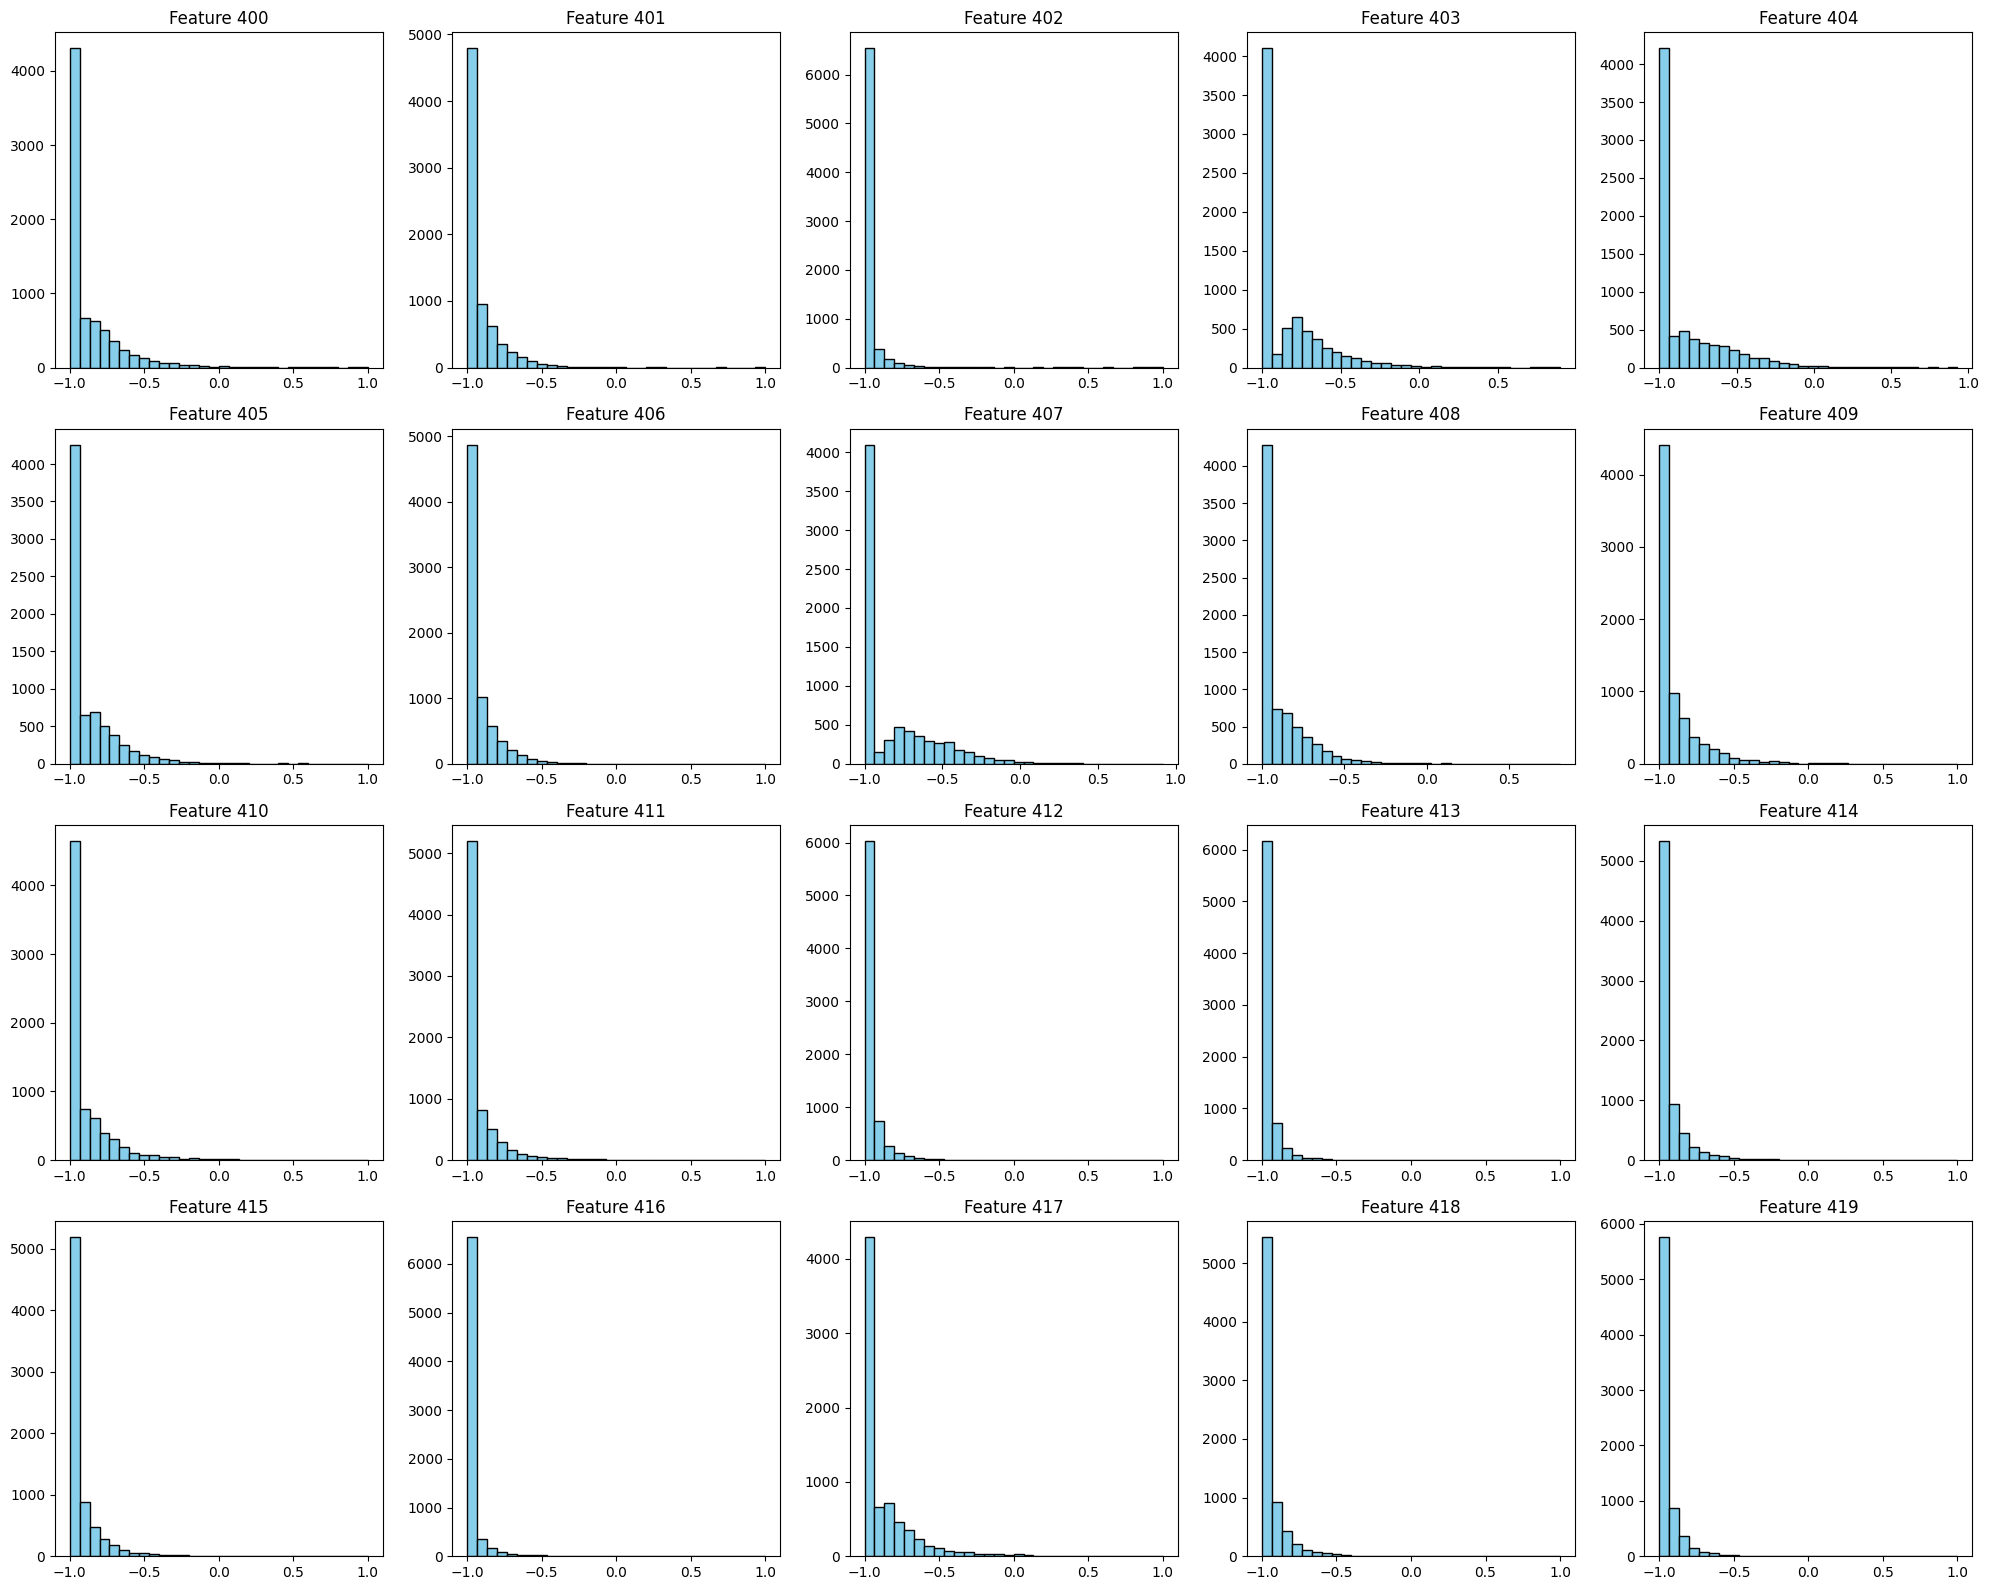

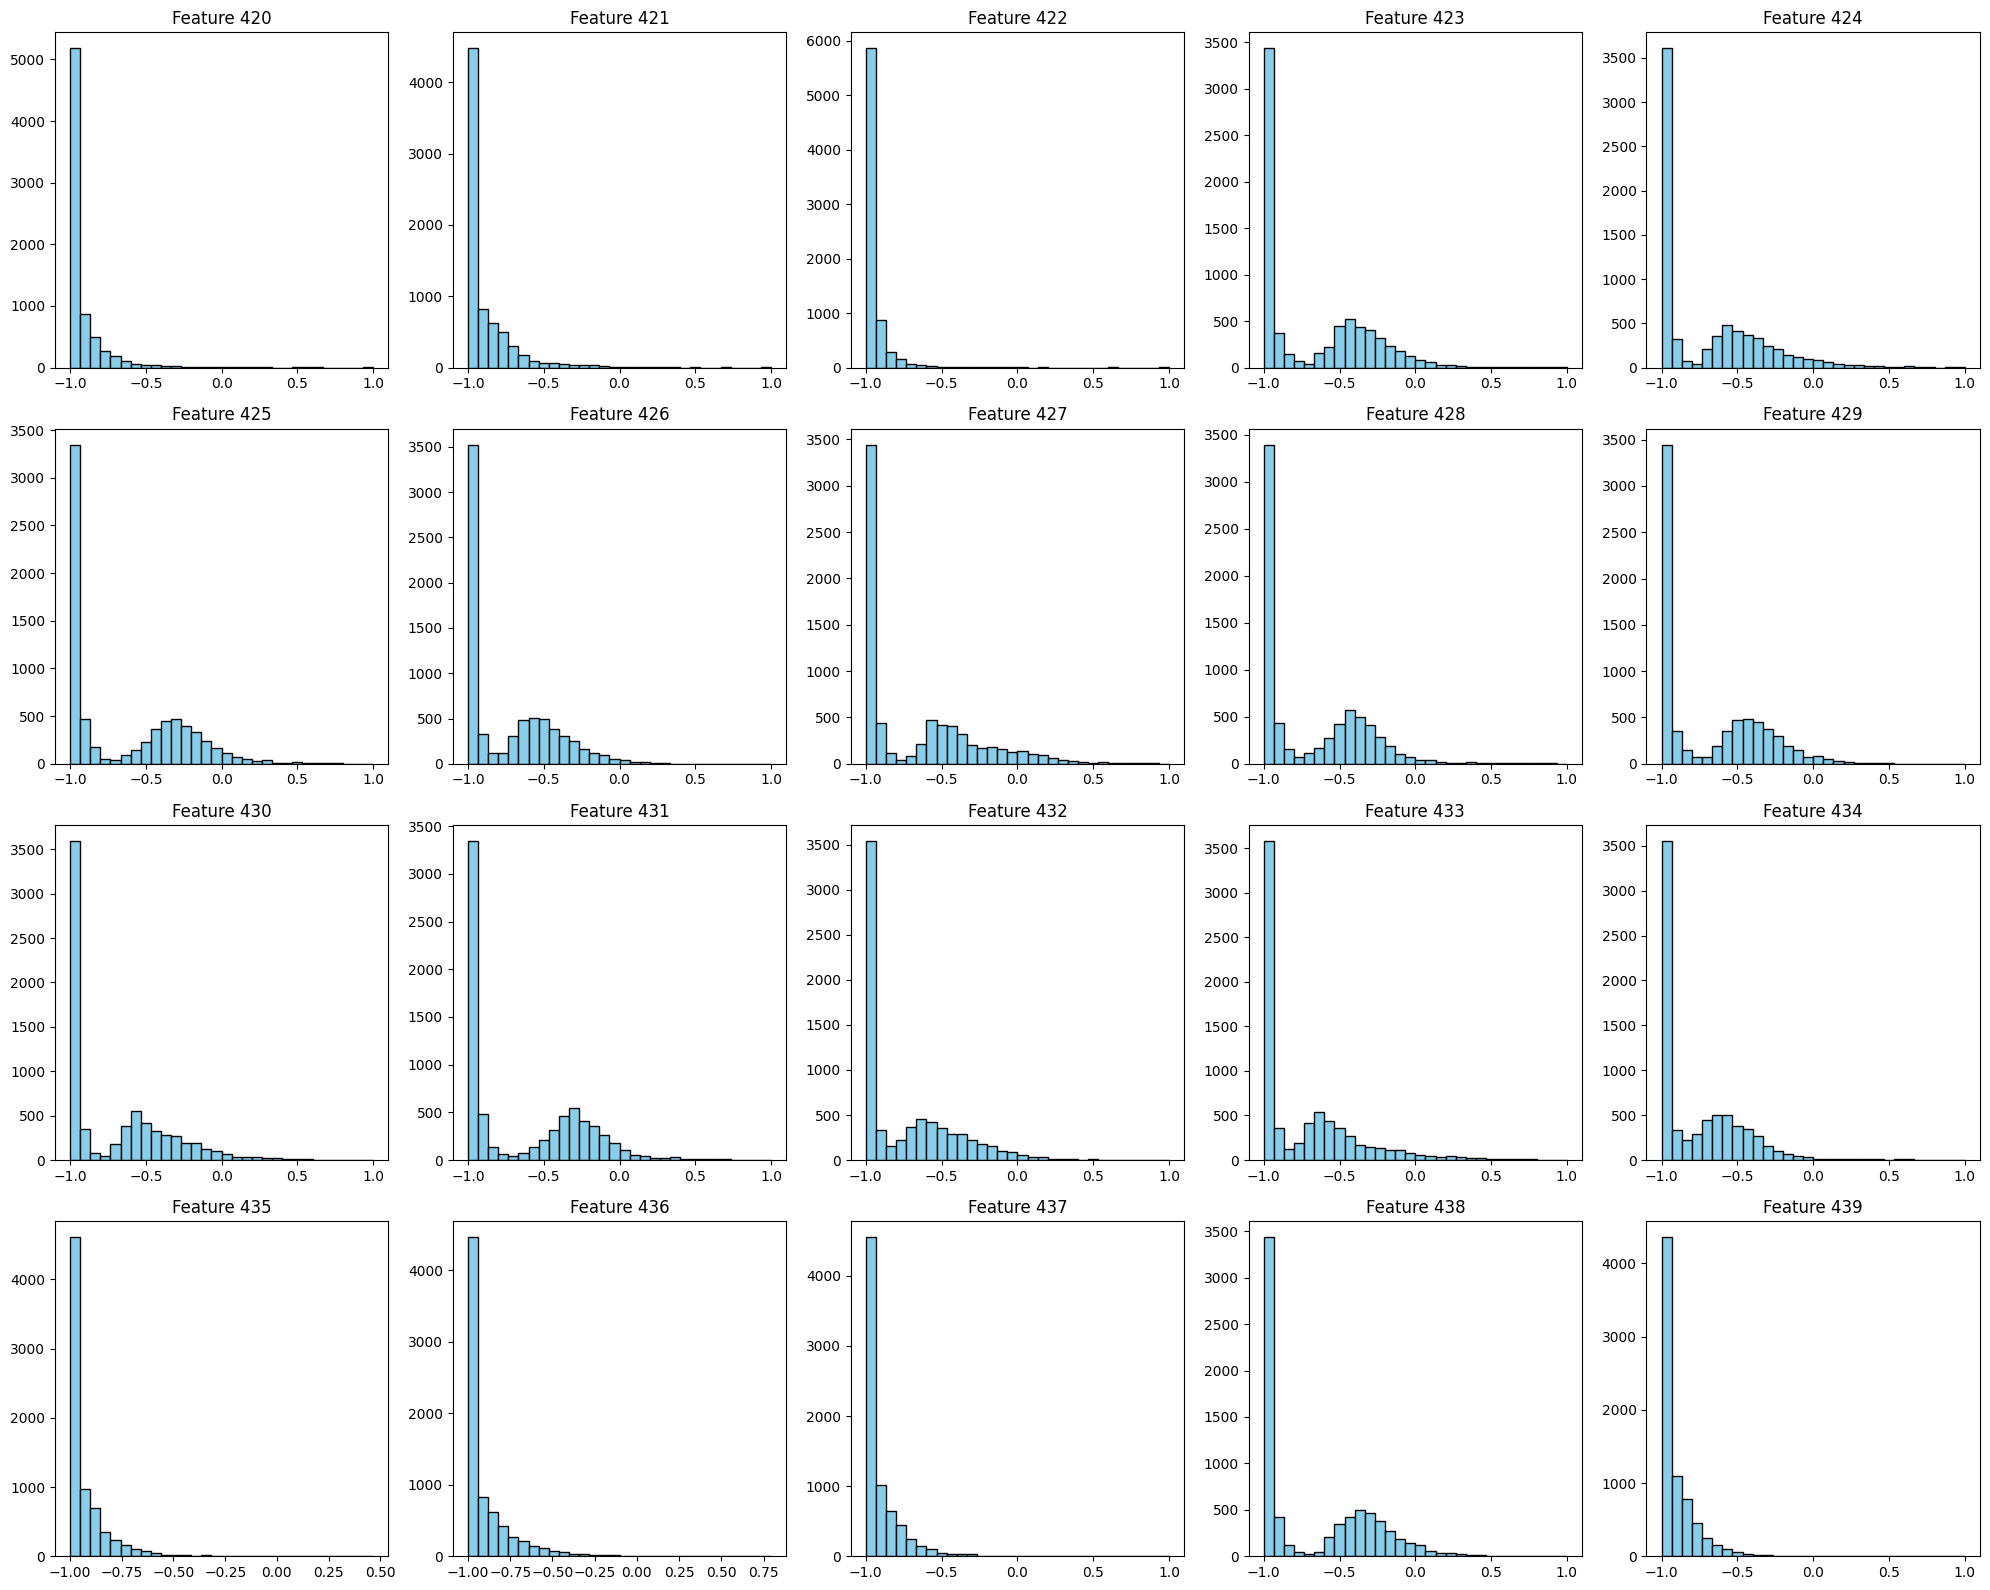

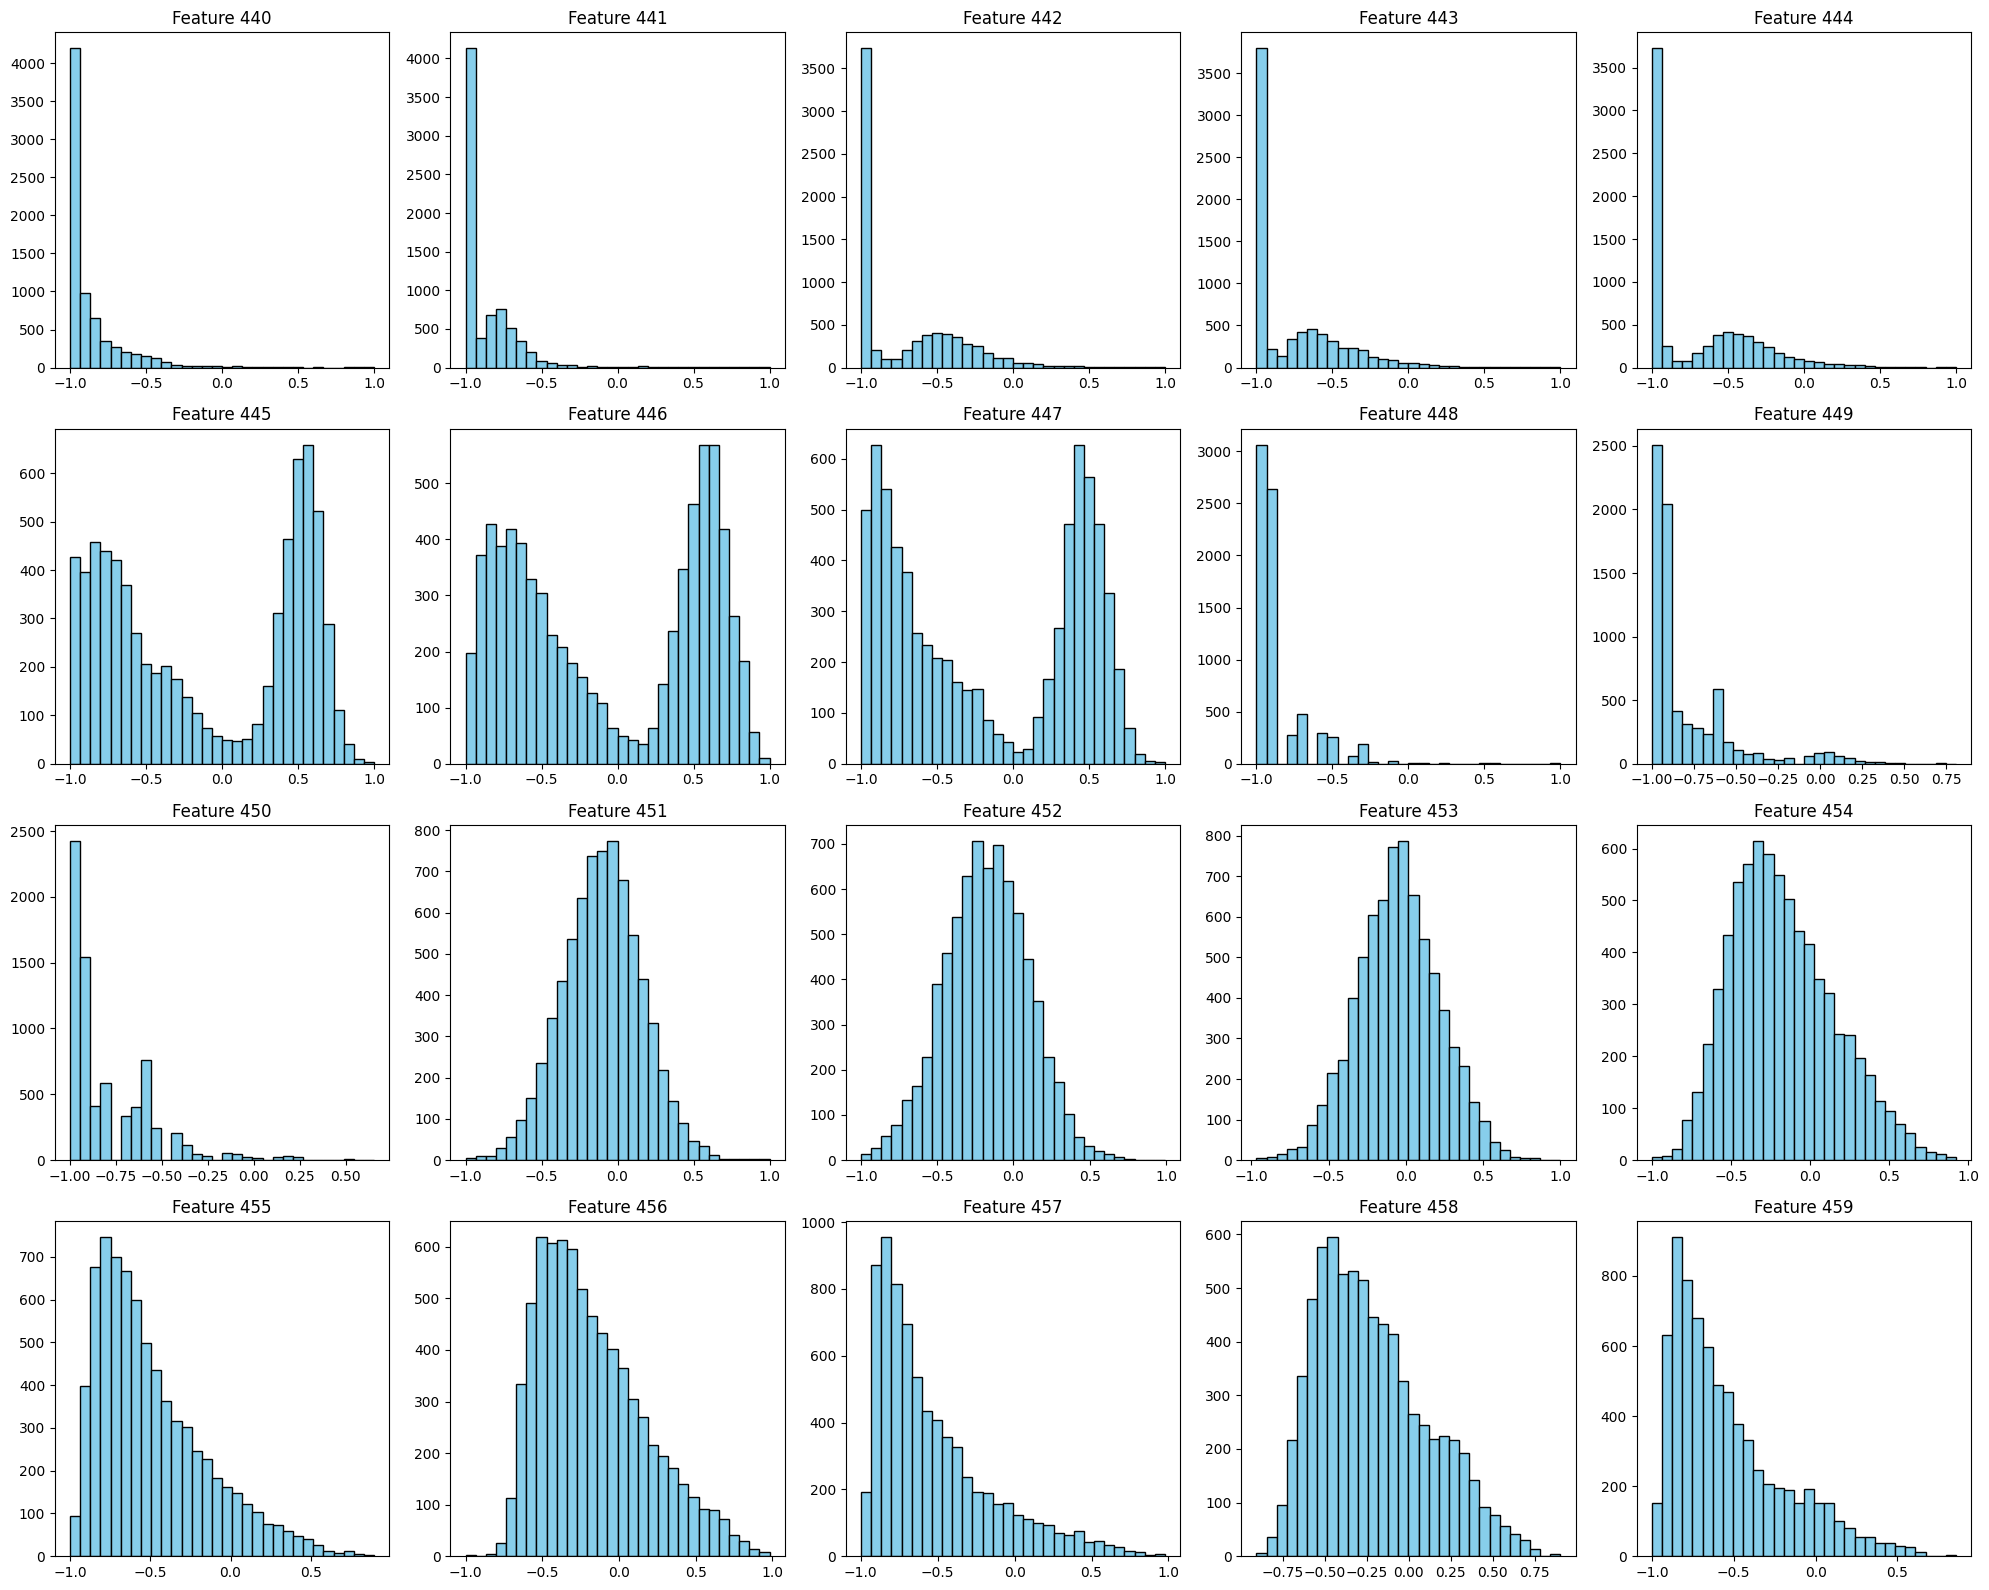

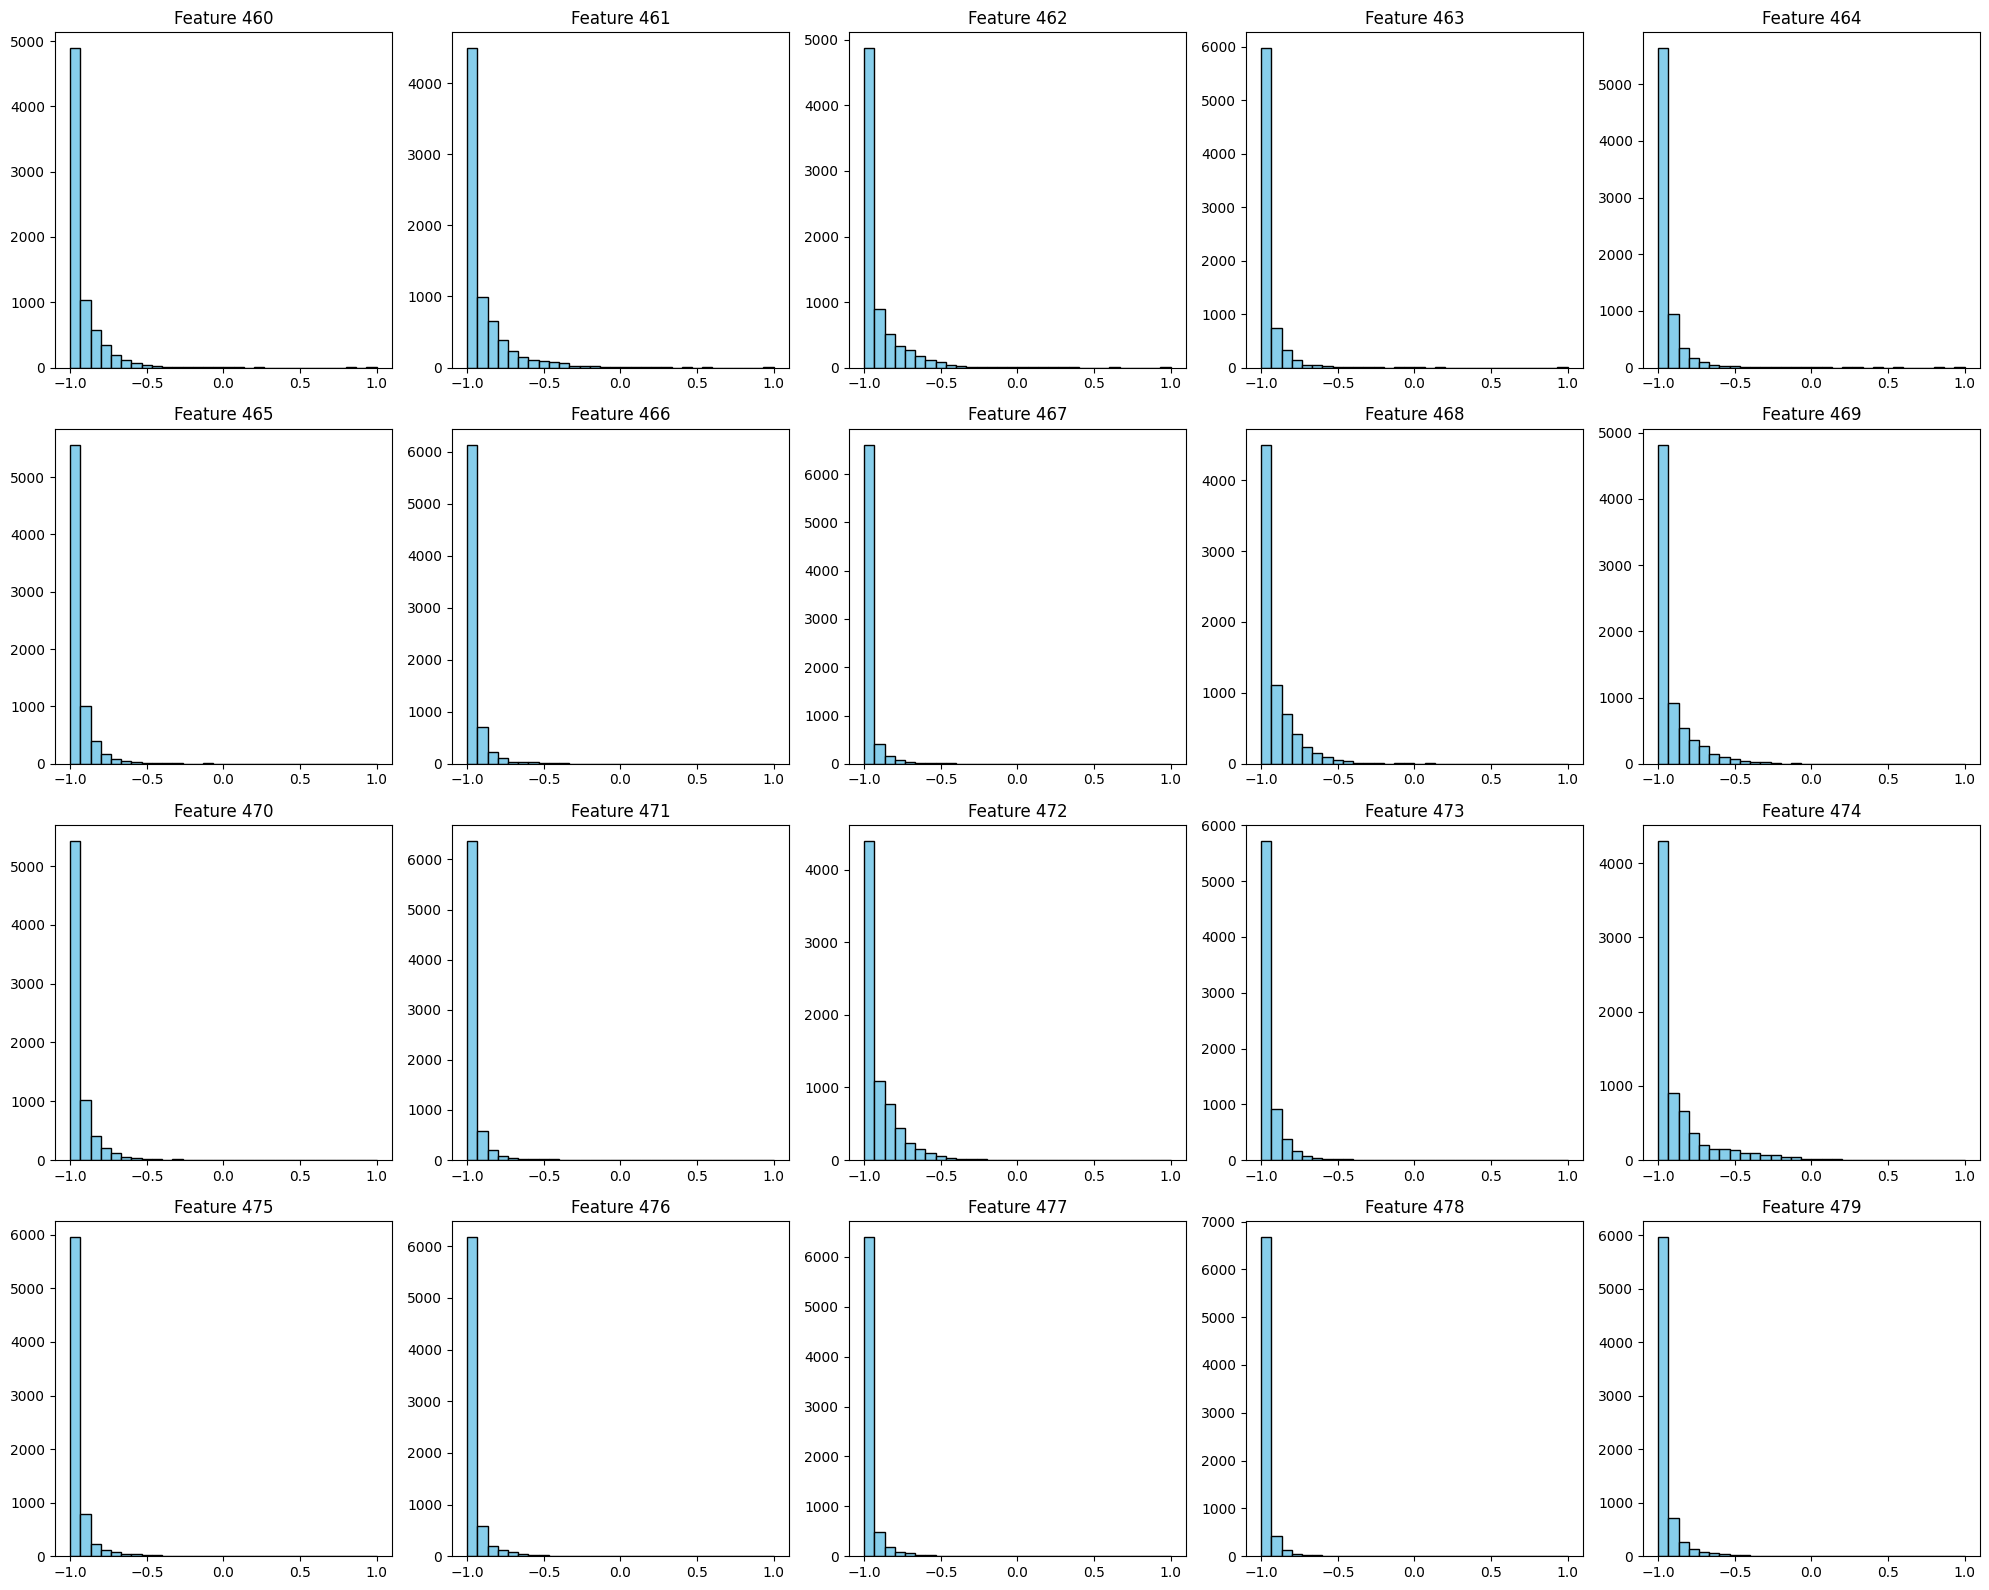

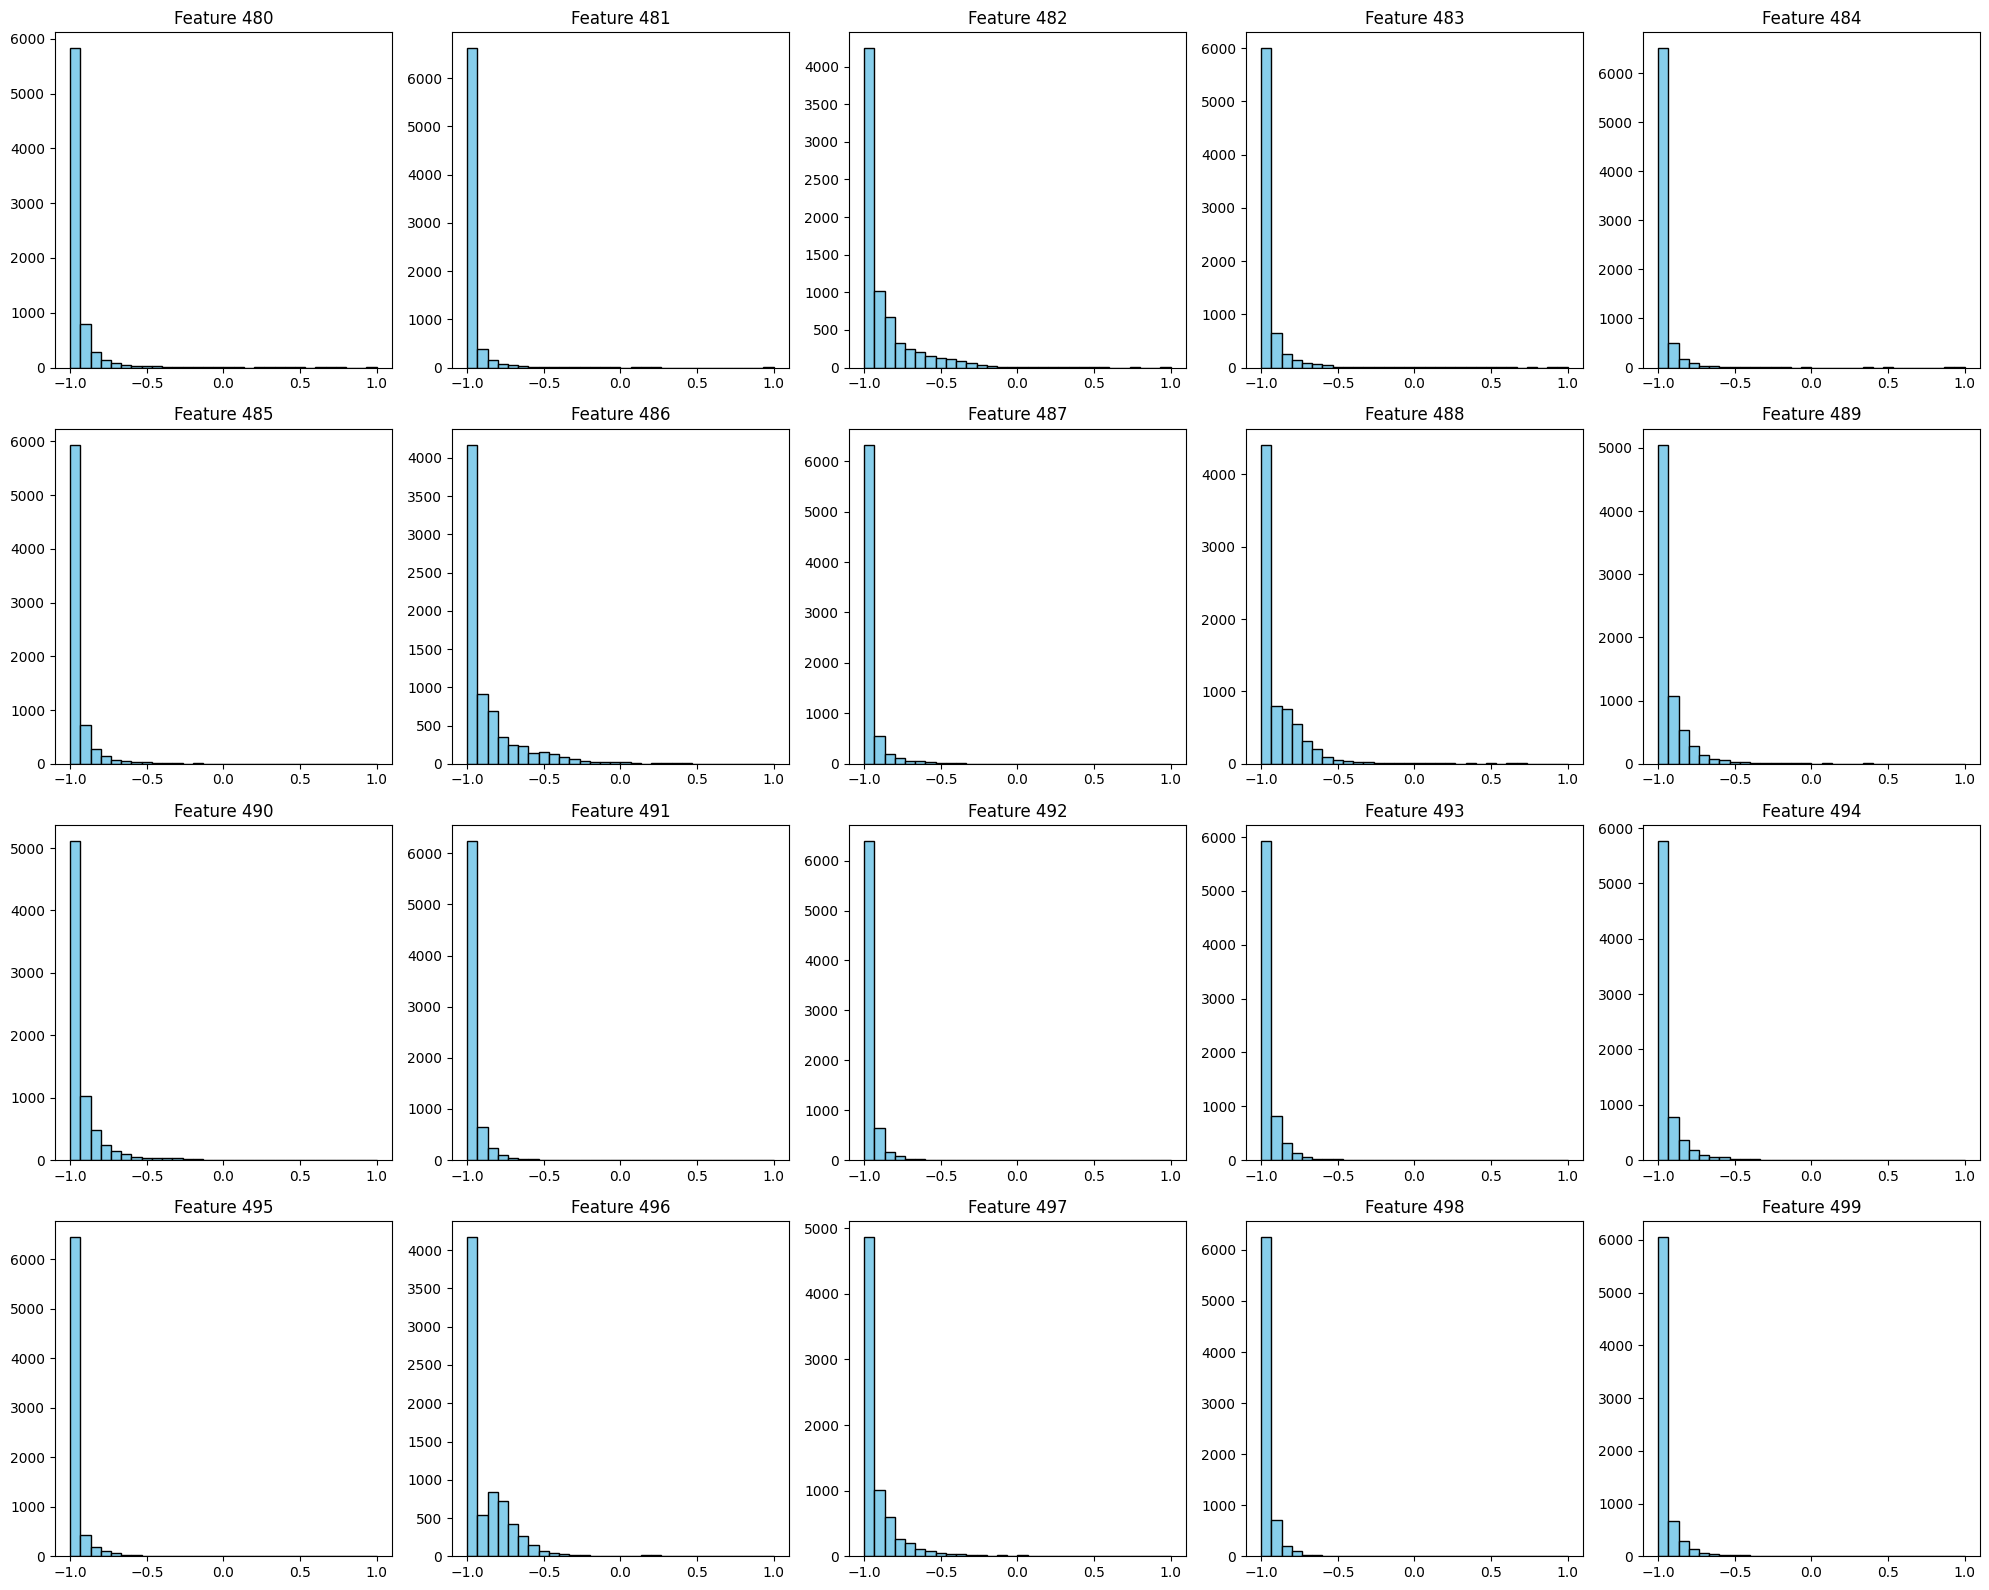

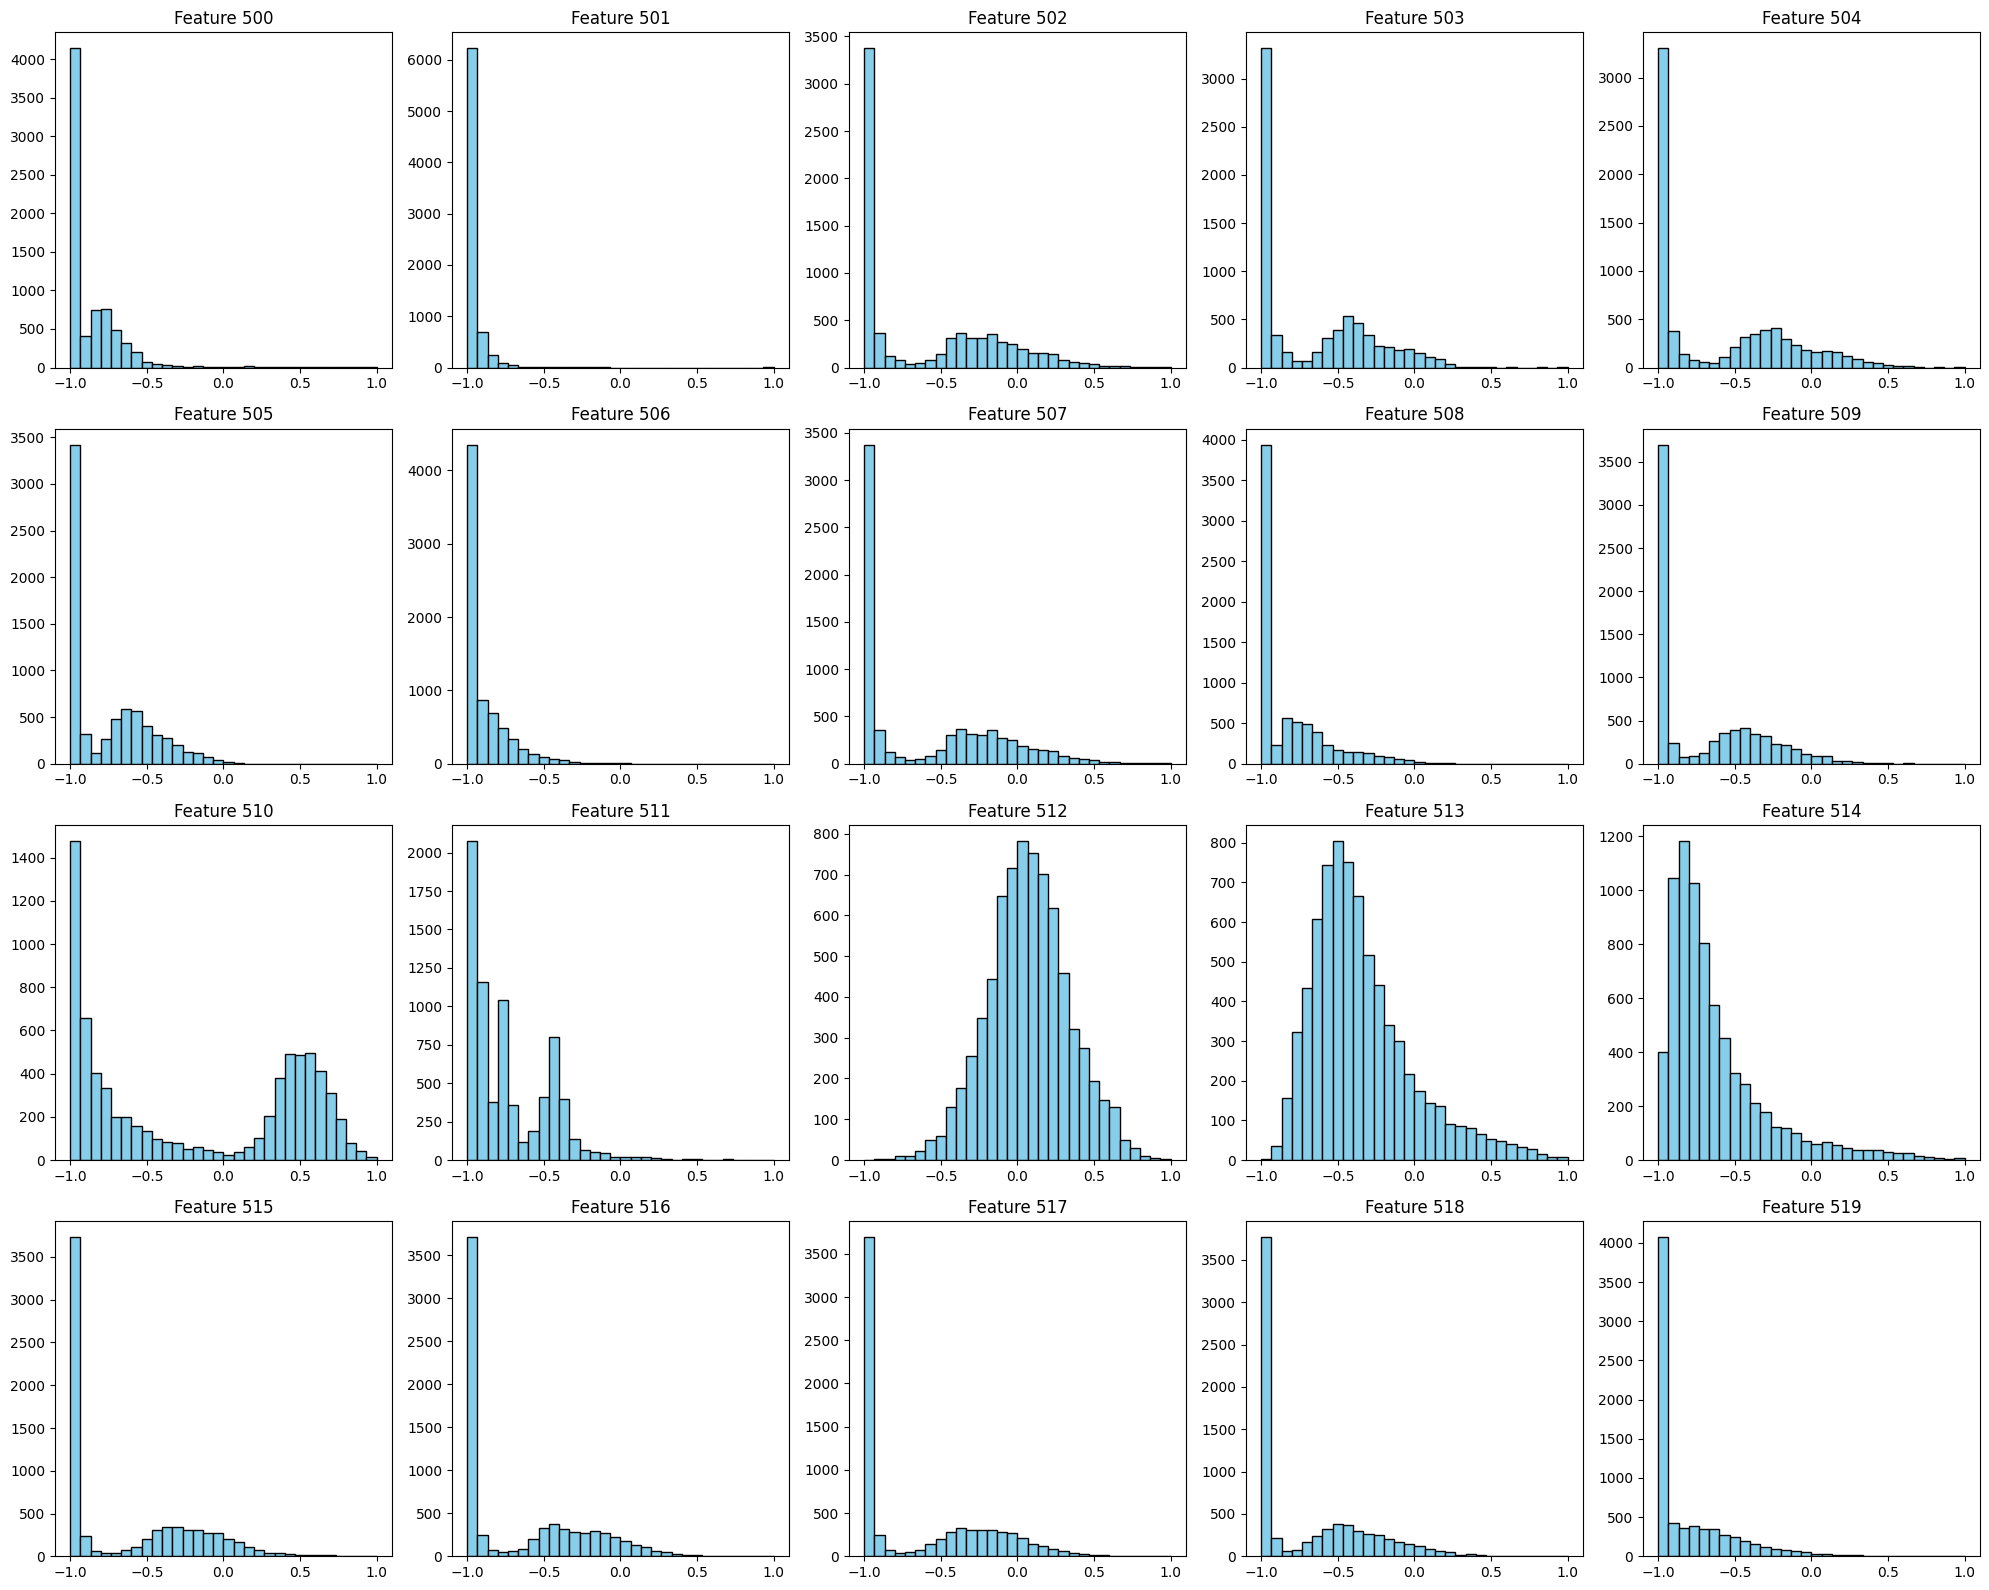

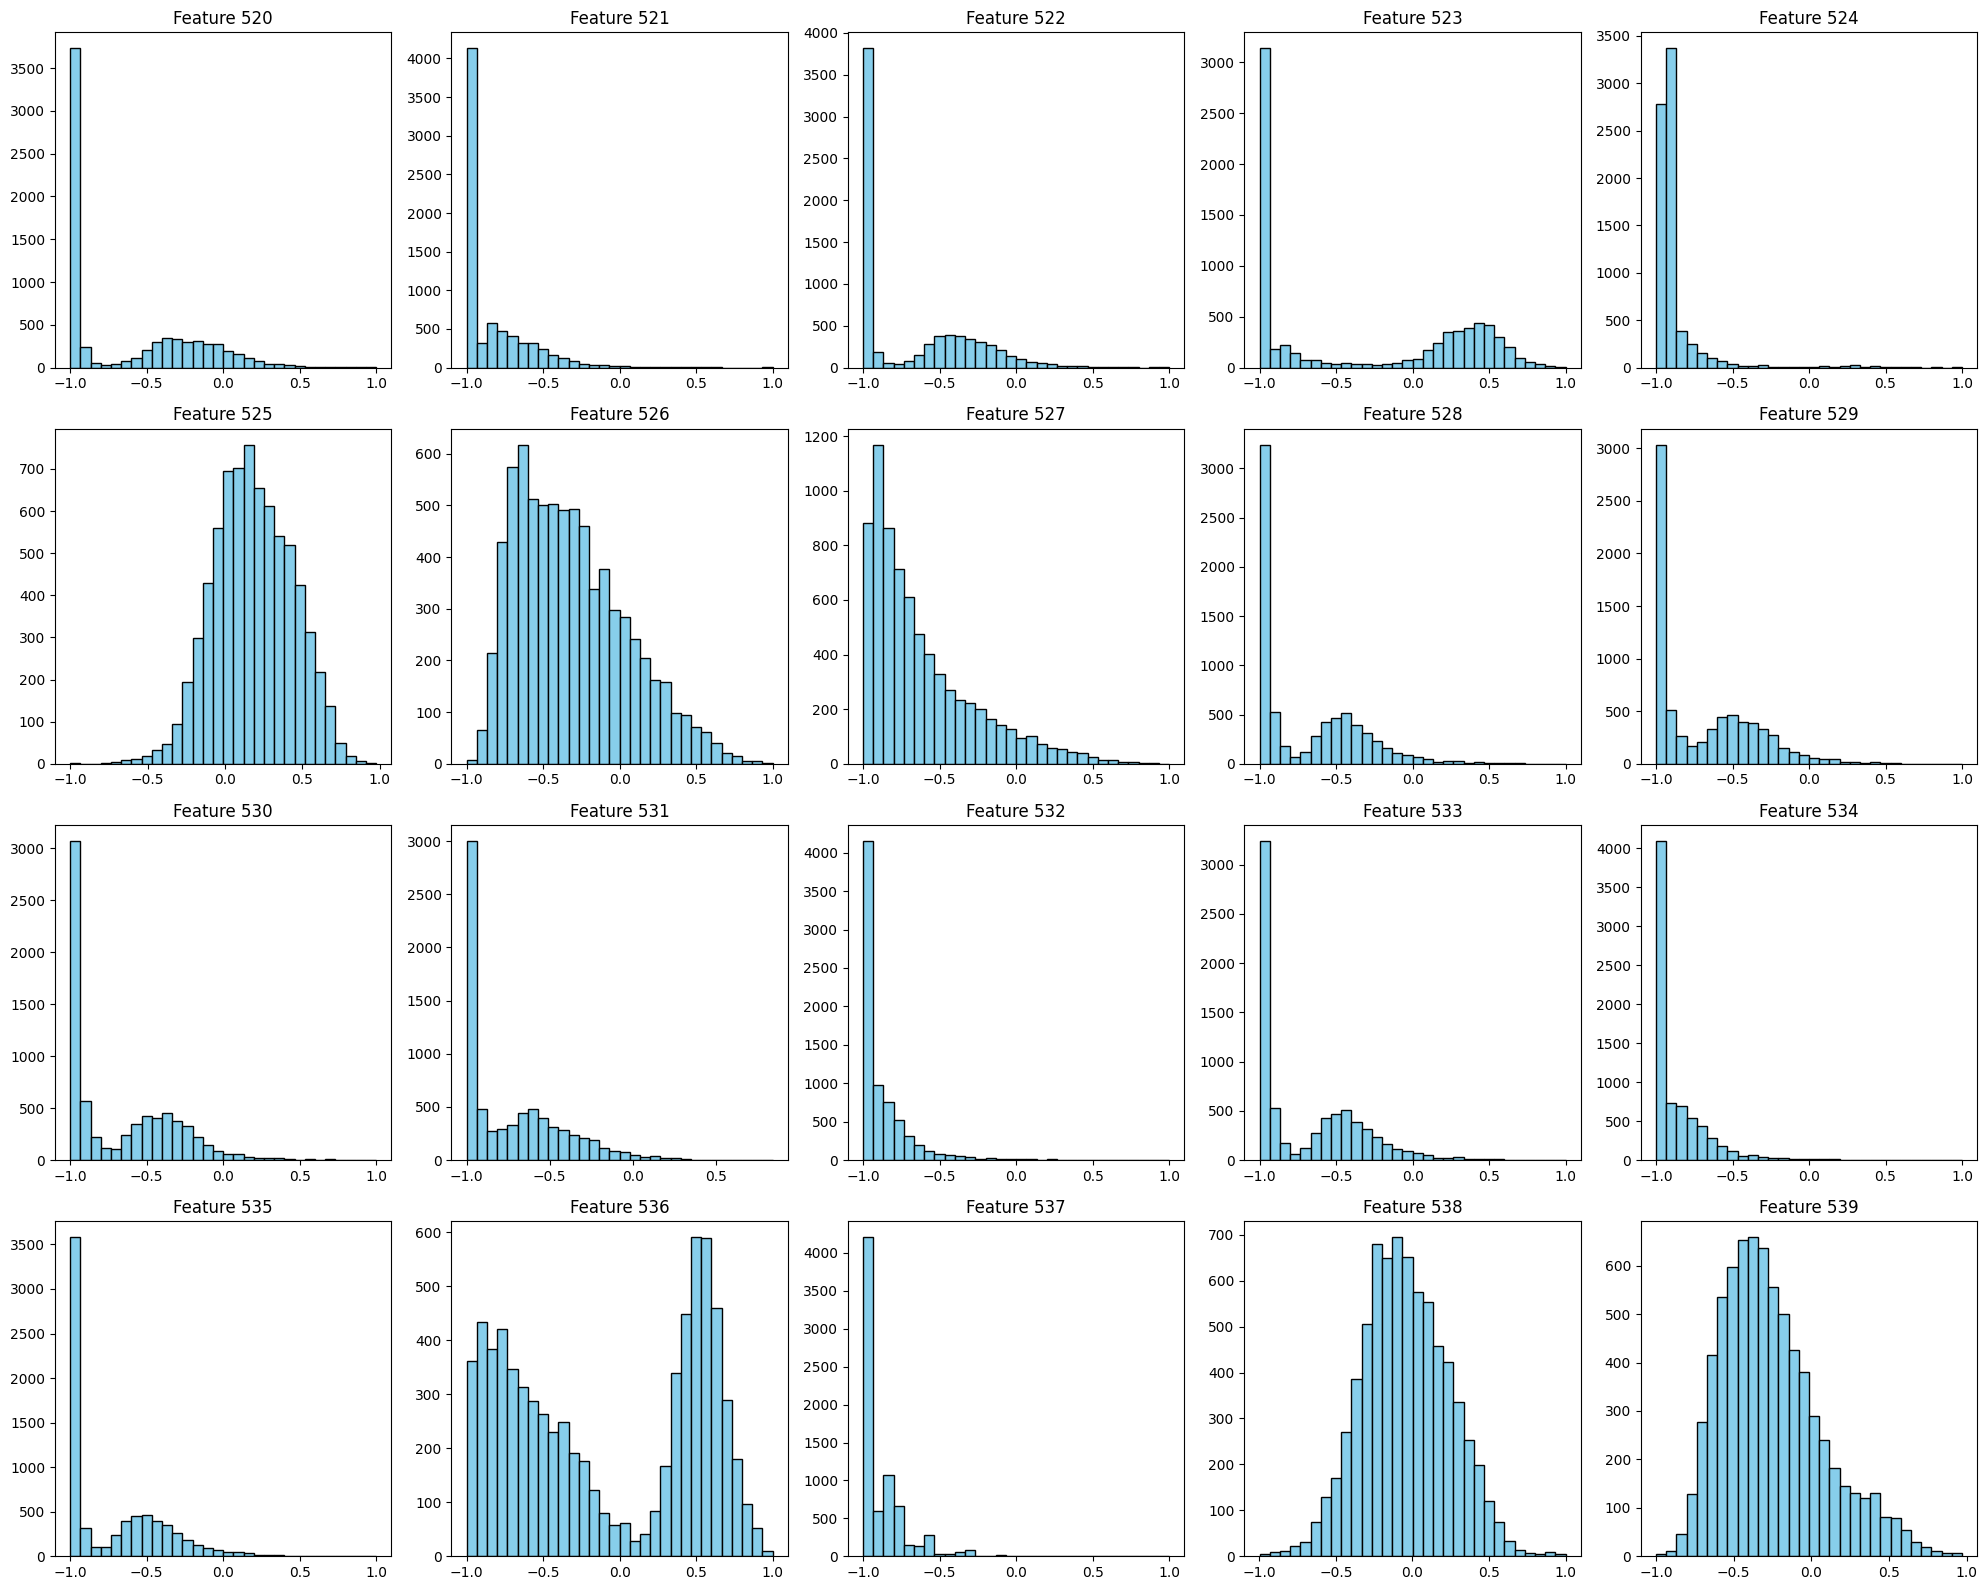

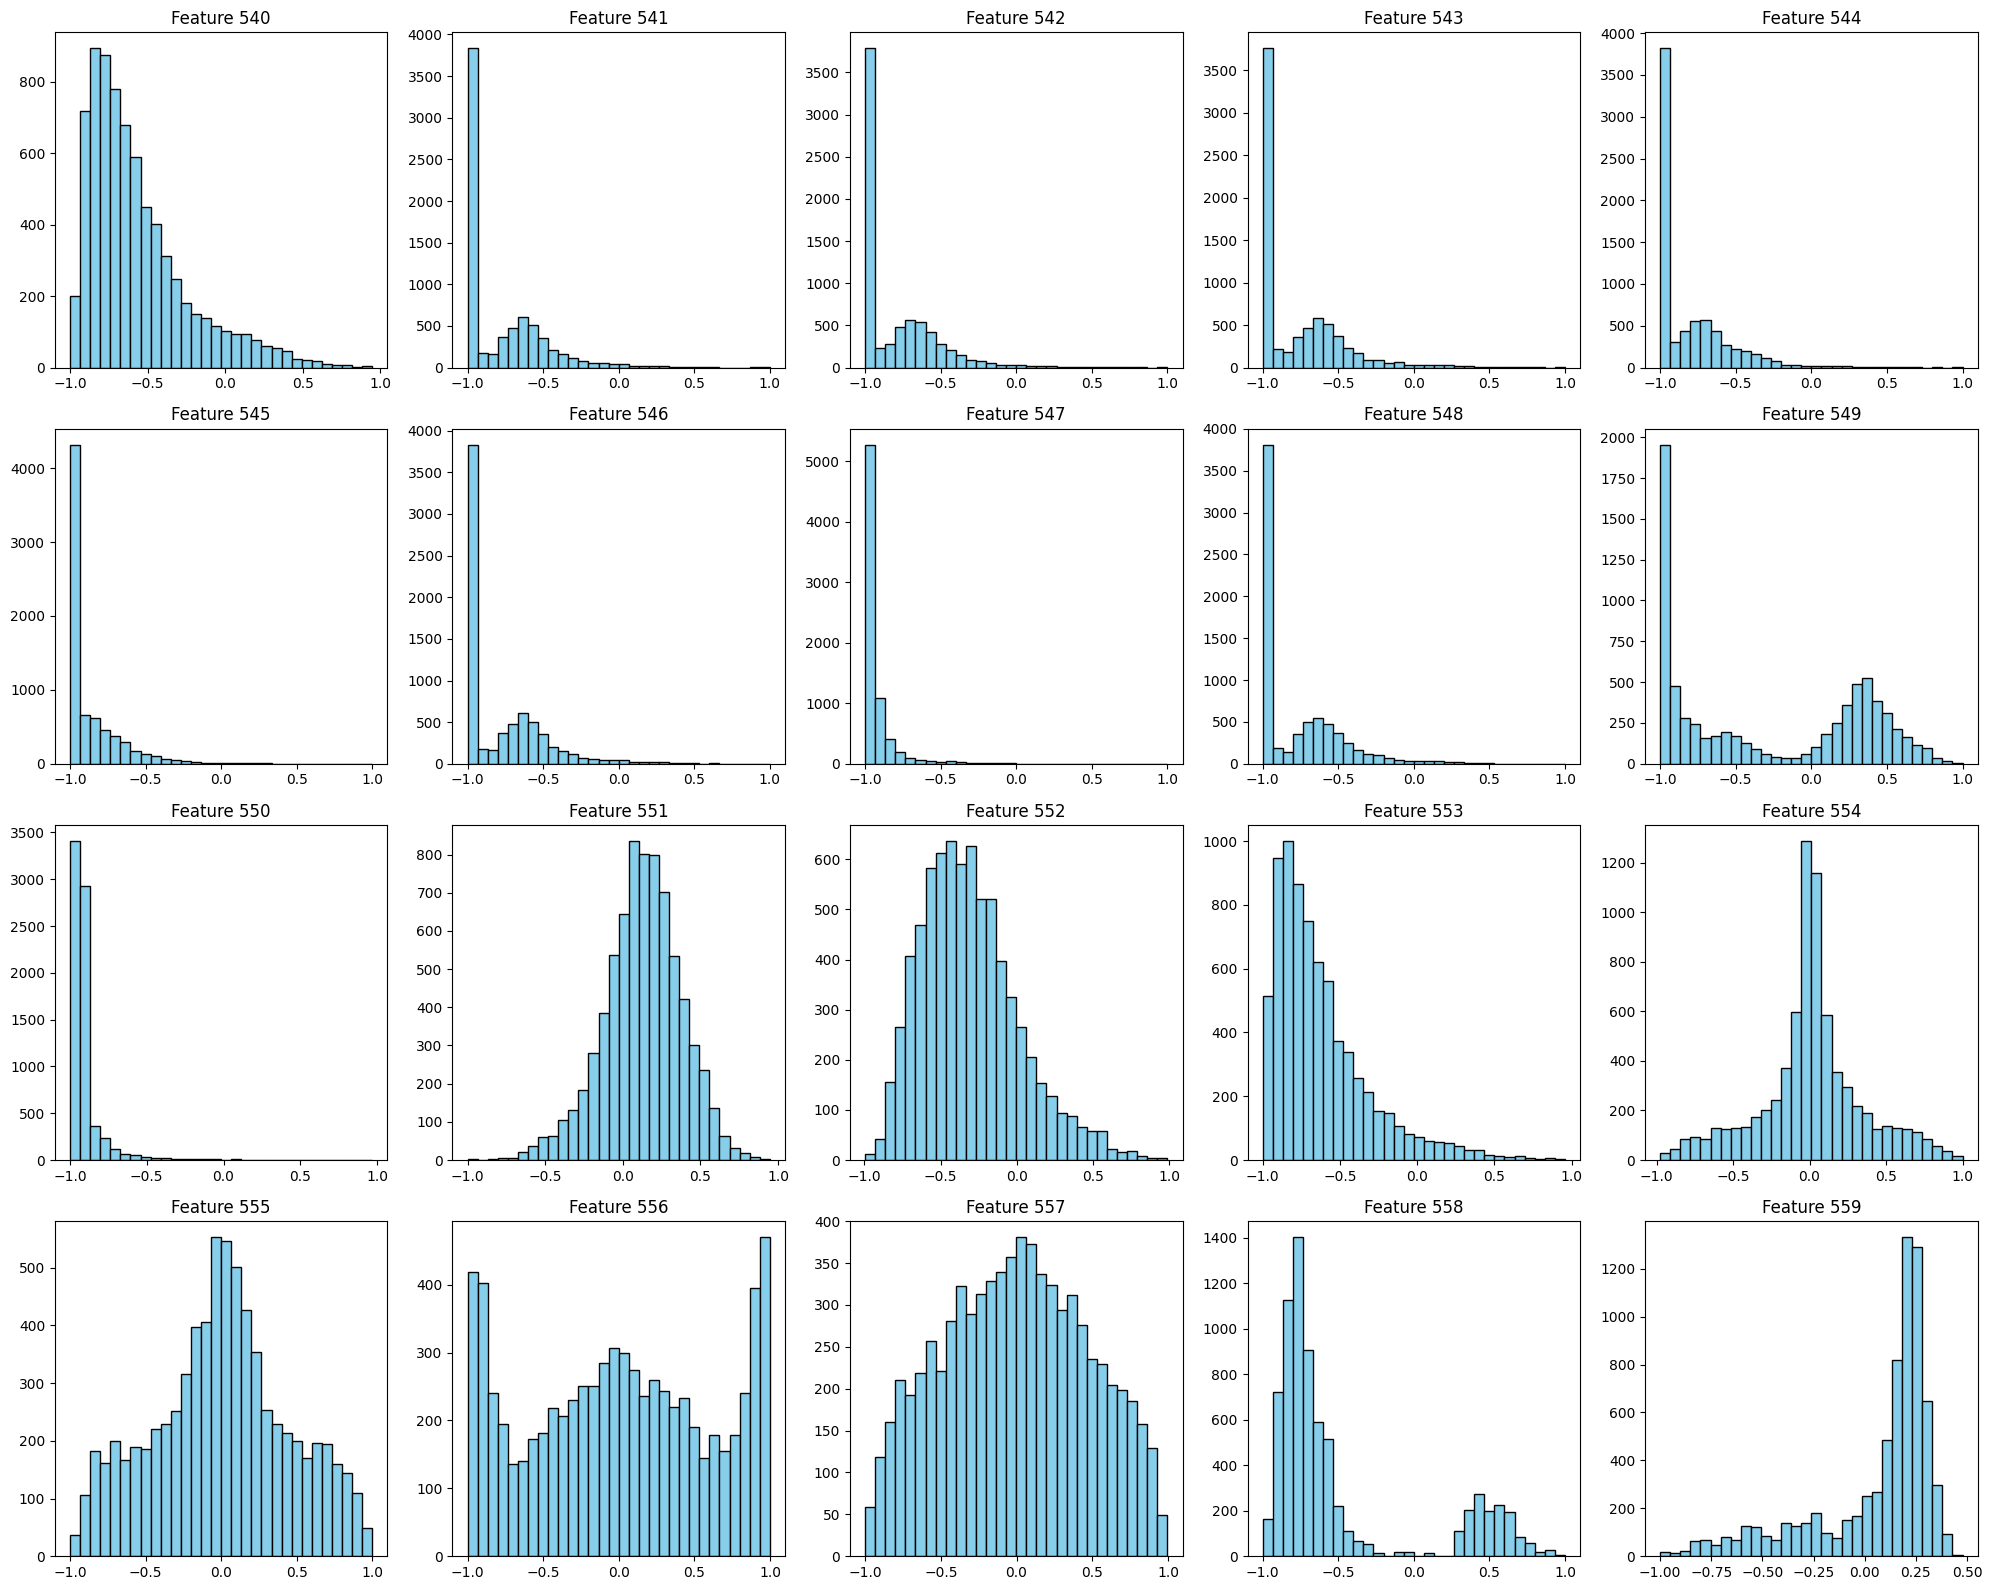

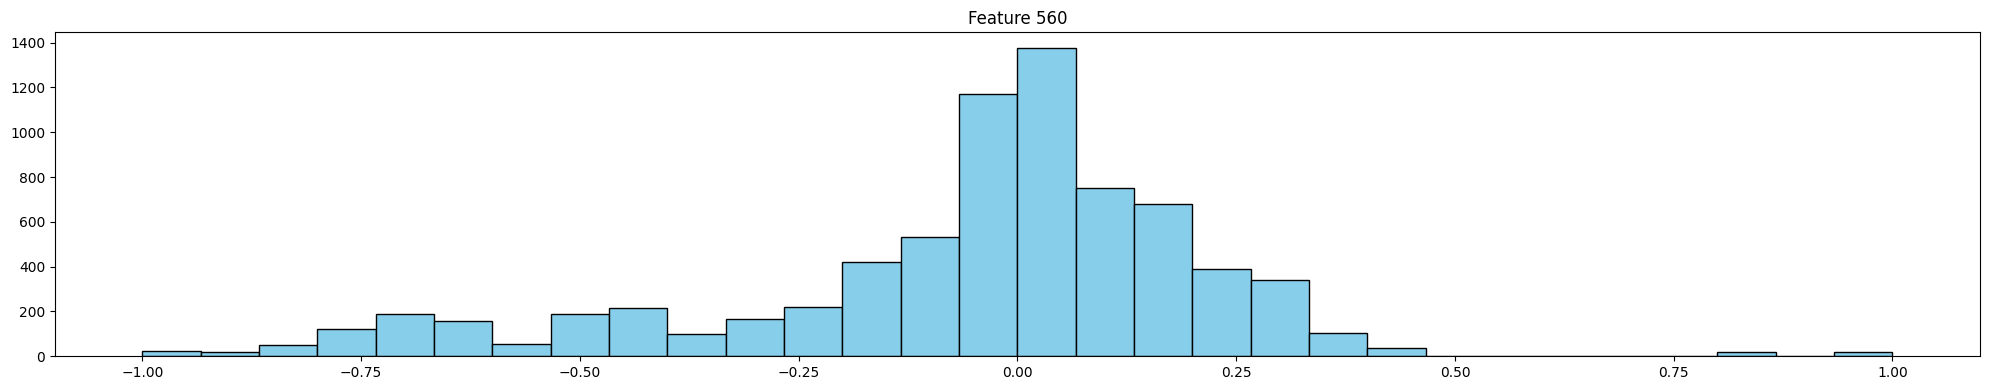

In [51]:
import matplotlib.pyplot as plt

batch_size = 20  
features = X_train.columns

for i in range(0, len(features), batch_size):
    batch = features[i:i+batch_size]
    n = len(batch)
    nrows = (n // 5) + (1 if n % 5 != 0 else 0)  # 5 columns per row
    ncols = min(n, 5)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4*nrows))
    
    # Make axes always a flat array
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for j, col in enumerate(batch):
        axes[j].hist(X_train[col], bins=30, color='skyblue', edgecolor='black')
        axes[j].set_title(f'Feature {col}')
    
    # Remove any unused subplots
    for k in range(j+1, len(axes)):
        fig.delaxes(axes[k])
    
    plt.tight_layout()
    plt.show()


In [52]:
outlier_counts = {}

for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = X_train[(X_train[col] < (Q1 - 1.5 * IQR)) | (X_train[col] > (Q3 + 1.5 * IQR))]
    
    outlier_counts[col] = len(outliers)

# Show features with any outliers
for col, count in outlier_counts.items():
    if count > 0:
        print(f"Feature {col} has {count} outliers")


Feature 0 has 1795 outliers
Feature 1 has 1122 outliers
Feature 2 has 1180 outliers
Feature 3 has 2 outliers
Feature 5 has 7 outliers
Feature 6 has 7 outliers
Feature 8 has 3 outliers
Feature 10 has 4 outliers
Feature 11 has 27 outliers
Feature 12 has 4 outliers
Feature 13 has 5 outliers
Feature 14 has 63 outliers
Feature 16 has 376 outliers
Feature 17 has 63 outliers
Feature 18 has 287 outliers
Feature 19 has 32 outliers
Feature 20 has 2 outliers
Feature 21 has 8 outliers
Feature 25 has 3 outliers
Feature 26 has 26 outliers
Feature 27 has 88 outliers
Feature 28 has 65 outliers
Feature 29 has 4 outliers
Feature 30 has 30 outliers
Feature 31 has 140 outliers
Feature 32 has 58 outliers
Feature 33 has 1 outliers
Feature 34 has 47 outliers
Feature 35 has 106 outliers
Feature 36 has 42 outliers
Feature 37 has 202 outliers
Feature 38 has 117 outliers
Feature 39 has 7 outliers
Feature 40 has 1474 outliers
Feature 41 has 686 outliers
Feature 42 has 607 outliers
Feature 43 has 532 outliers
Feat

In [53]:
scaler = RobustScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [54]:
# Keep column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

outlier_counts = {}

for col in X_train_scaled_df.columns:
    Q1 = X_train_scaled_df[col].quantile(0.25)
    Q3 = X_train_scaled_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = X_train_scaled_df[(X_train_scaled_df[col] < (Q1 - 1.5 * IQR)) | 
                                 (X_train_scaled_df[col] > (Q3 + 1.5 * IQR))]
    
    outlier_counts[col] = len(outliers)

# Show features with any outliers
for col, count in outlier_counts.items():
    if count > 0:
        print(f"Feature {col} has {count} outliers")


Feature 0 has 1795 outliers
Feature 1 has 1122 outliers
Feature 2 has 1180 outliers
Feature 3 has 2 outliers
Feature 5 has 7 outliers
Feature 6 has 7 outliers
Feature 8 has 3 outliers
Feature 10 has 4 outliers
Feature 11 has 27 outliers
Feature 12 has 4 outliers
Feature 13 has 5 outliers
Feature 14 has 63 outliers
Feature 16 has 376 outliers
Feature 17 has 63 outliers
Feature 18 has 287 outliers
Feature 19 has 32 outliers
Feature 20 has 2 outliers
Feature 21 has 8 outliers
Feature 25 has 3 outliers
Feature 26 has 26 outliers
Feature 27 has 88 outliers
Feature 28 has 65 outliers
Feature 29 has 4 outliers
Feature 30 has 30 outliers
Feature 31 has 140 outliers
Feature 32 has 58 outliers
Feature 33 has 1 outliers
Feature 34 has 47 outliers
Feature 35 has 106 outliers
Feature 36 has 42 outliers
Feature 37 has 202 outliers
Feature 38 has 117 outliers
Feature 39 has 7 outliers
Feature 40 has 1474 outliers
Feature 41 has 686 outliers
Feature 42 has 607 outliers
Feature 43 has 532 outliers
Feat

**Principal Component Analysis**

In [55]:
# Keep a copy of original data for reference
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Perform PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original number of features:", X_train_original.shape[1])
print("Reduced number of features:", X_train_pca.shape[1])
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())


Original number of features: 561
Reduced number of features: 67
Explained variance ratio of each component: [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.0096938  0.00858018 0.00762302 0.00672446
 0.0057942  0.00557881 0.00498926 0.00474938 0.004672   0.00431618
 0.00425715 0.00410395 0.00394002 0.00375309 0.00352427 0.00339359
 0.00332139 0.00319429 0.00301779 0.00291783 0.0028957  0.00281928
 0.00276704 0.00263395 0.00255307 0.00235866 0.00230652 0.00223648
 0.00222948 0.00210276 0.00208393 0.00204774 0.00192856 0.0018888
 0.0018118  0.00179473 0.00172328 0.00160202 0.00157039 0.00156627
 0.0015297  0.00150351 0.00145118 0.0014064  0.00136825 0.00126858
 0.00125006 0.00119742 0.0011812  0.00114995 0.00113082 0.0010967
 0.00107704 0.001049   0.00103894 0.00101474 0.00099152 0.00097025
 0.0009541 ]
Cumulative explained variance: [0.6255444  0.67467463 0.7158893  0.73463886 0.75158746 0.76430816
 0.77607501 0.78676474 0.79645854 0.80503872 0

**K-Means**

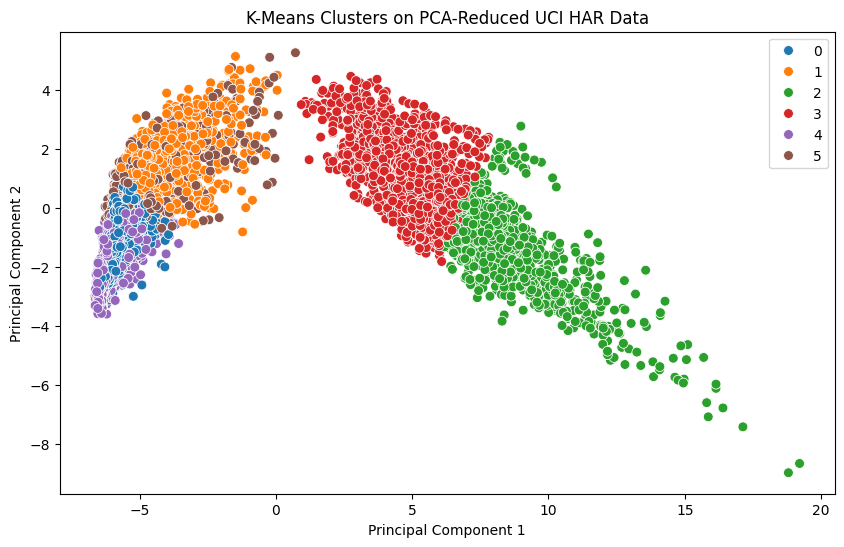

In [56]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_pca)
labels = kmeans.labels_

# Plot first 2 PCA components colored by cluster
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X_train_pca[:,0], 
    y=X_train_pca[:,1], 
    hue=labels, 
    palette="tab10", 
    legend="full",
    s=50
)
plt.title("K-Means Clusters on PCA-Reduced UCI HAR Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Comparing results with ground truth activity labels**

In [57]:
path = "UCI HAR Dataset/train/y_train.txt"
y_train = pd.read_csv(path, sep="\s+", header=None)

path = "UCI HAR Dataset/test/y_test.txt"
y_test = pd.read_csv(path, sep="\s+", header=None)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18951/409399202.py:2: SyntaxWarning: invalid escape sequence '\s'
  y_train = pd.read_csv(path, sep="\s+", header=None)
/tmp/ipykernel_18951/409399202.py:5: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv(path, sep="\s+", header=None)


Confusion Matrix:
 [[   0  853  373    0    0    0]
 [   0  914  159    0    0    0]
 [   0  260  726    0    0    0]
 [   0    1    0  812  415   58]
 [   0    0    0  775  599    0]
 [   0   10    0    0    2 1395]]
Clustering accuracy: 0.6047


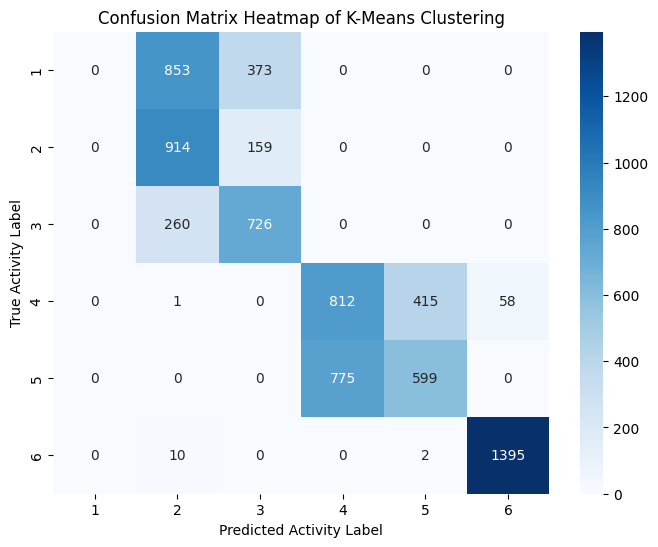

In [58]:
# Map each cluster to the most frequent true label
cluster_to_label = {}
for cluster in np.unique(labels):
    mask = (labels == cluster)
    most_common = mode(y_train[mask])[0][0]
    cluster_to_label[cluster] = most_common

# Convert cluster assignments to predicted labels
predicted_labels = np.array([cluster_to_label[c] for c in labels])

# Confusion matrix
cm = confusion_matrix(y_train, predicted_labels)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_train, predicted_labels)
print(f"Clustering accuracy: {accuracy:.4f}")

# Visualize confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Activity Label")
plt.ylabel("True Activity Label")
plt.title("Confusion Matrix Heatmap of K-Means Clustering")
plt.show()

**Performance analysis**

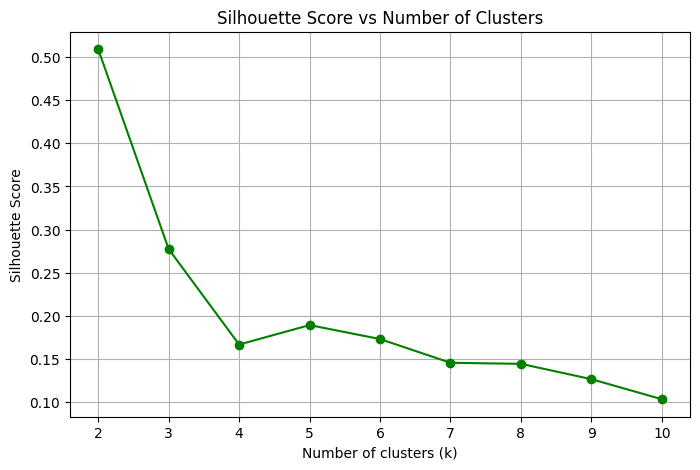

In [59]:
sil_scores = []

for k in range(2, 11):  # silhouette undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    sil_scores.append(silhouette_score(X_train_pca, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, 'o-', color='green')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

In [60]:
sil_score = silhouette_score(X_train_pca, labels)
ch_score = calinski_harabasz_score(X_train_pca, labels)
db_score = davies_bouldin_score(X_train_pca, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")


Silhouette Score: 0.1034
Calinski-Harabasz Index: 2375.5434
Davies-Bouldin Index: 2.2655


In [61]:
y_train_1d = y_train.values.ravel() 

# y_train_1d = y_train.ravel()

ari = adjusted_rand_score(y_train_1d, labels)
nmi = normalized_mutual_info_score(y_train_1d, labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


Adjusted Rand Index (ARI): 0.4419
Normalized Mutual Information (NMI): 0.6063


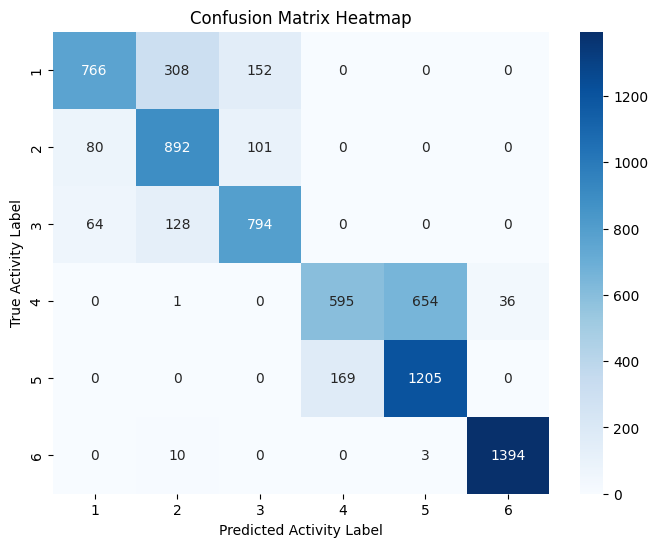

In [62]:
cluster_to_label = {}
for cluster in np.unique(labels):
    mask = (labels == cluster)
    most_common = mode(y_train[mask])[0][0]
    cluster_to_label[cluster] = most_common

predicted_labels = np.array([cluster_to_label[c] for c in labels])
cm = confusion_matrix(y_train, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Activity Label")
plt.ylabel("True Activity Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


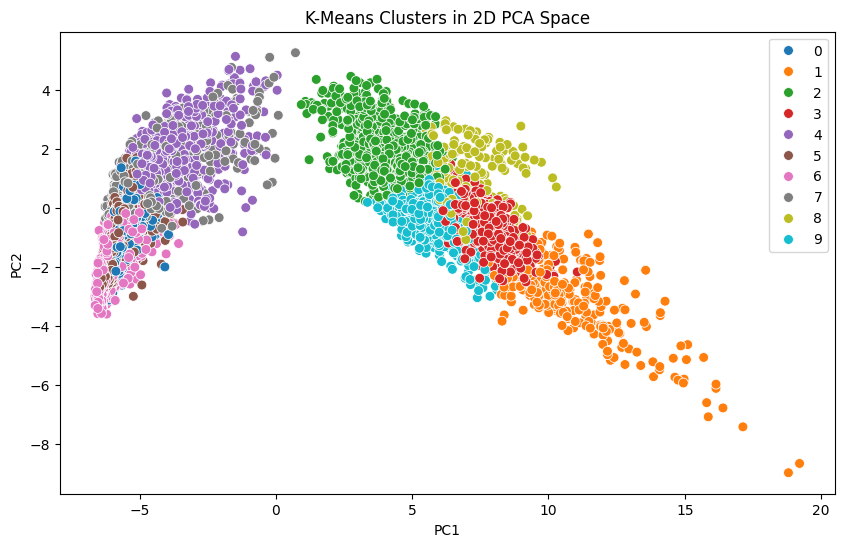

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=labels,
                palette="tab10", s=50, legend="full")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters in 2D PCA Space")
plt.show()


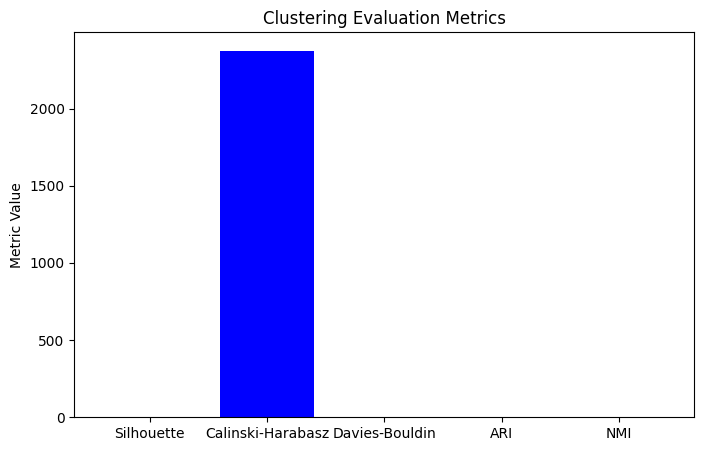

In [64]:
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin', 'ARI', 'NMI']
values = [sil_score, ch_score, db_score, ari, nmi]

plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=['green','blue','red','purple','orange'])
plt.title("Clustering Evaluation Metrics")
plt.ylabel("Metric Value")
plt.show()
